# Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

#### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

#### Reading application Data  the file

In [3]:
application_data=pd.read_csv("application_data.csv")

#### Checking the structure of Application Data

In [4]:
application_data.head() # Geting insight of fist five rows 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [7]:
application_data.shape

(307511, 122)

In [8]:
application_data.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [9]:
application_data.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [10]:
application_data.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [11]:
df=application_data.copy()

### 1. Quality Check- Missing Data
- #### Getting the Column name having more than 35 Percent missing Data
- #### Removing Column from Dataframe missing value more than 35 Percent 

#### Getting Missing Values Percentage and creating new column with missing values Percentage 

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})


In [13]:
missing_value_df[missing_value_df.percent_missing>35].sort_values(by='percent_missing',ascending=False).head(10)


column_name  percent_missing
COMMONAREA_AVG                      COMMONAREA_AVG        69.872297
COMMONAREA_MEDI                    COMMONAREA_MEDI        69.872297
COMMONAREA_MODE                    COMMONAREA_MODE        69.872297
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG    NONLIVINGAPARTMENTS_AVG        69.432963
FONDKAPREMONT_MODE              FONDKAPREMONT_MODE        68.386172
LIVINGAPARTMENTS_MEDI        LIVINGAPARTMENTS_MEDI        68.354953
LIVINGAPARTMENTS_AVG          LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MODE        LIVINGAPARTMENTS_MODE        68.354953

#### Drop all columns which has more than 35 Percent of missing values 

In [14]:
df.drop(columns=missing_value_df[missing_value_df.percent_missing>35]['column_name'], inplace=True)

In [15]:
df.shape # Checking Shape after dropping 

(307511, 73)

In [16]:
df.head(5) #Validating data after dropping column having null values more than 35 Percent 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Now checking columns with less number of missing values 
- #### Range is between 0 to 15 percent

In [18]:
missing_value_df[(missing_value_df.percent_missing>0 )& (missing_value_df.percent_missing<15)]

column_name  percent_missing
AMT_ANNUITY                                AMT_ANNUITY         0.003902
AMT_GOODS_PRICE                        AMT_GOODS_PRICE         0.090403
NAME_TYPE_SUITE                        NAME_TYPE_SUITE         0.420148
CNT_FAM_MEMBERS                        CNT_FAM_MEMBERS         0.000650
EXT_SOURCE_2                              EXT_SOURCE_2         0.214626
OBS_30_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE         0.332021
DAYS_LAST_PHONE_CHANGE          DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_HOUR        13.501631
AMT_REQ_CREDIT_BUREAU_DAY    AMT_REQ_CREDIT_BUREAU_DAY        13.501631
AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_WEEK        13.501631
AMT_REQ_CREDIT_BUREAU_MON    AMT_REQ_CREDIT_BUREAU_MON        13.501631
AMT_REQ_CREDIT_BUREAU_QRT    AMT_REQ_CREDIT_BUREAU_QRT        13.501631
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR        13.501631

#### We can impute 0 in below fields , it could be possible no application was receieved in Bank during that Period 
- AMT_REQ_CREDIT_BUREAU_HOUR	
- AMT_REQ_CREDIT_BUREAU_DAY	
- AMT_REQ_CREDIT_BUREAU_WEEK	
- AMT_REQ_CREDIT_BUREAU_MON	
- AMT_REQ_CREDIT_BUREAU_QRT	
- AMT_REQ_CREDIT_BUREAU_YEAR

#### for rest of fields at this stage. I am not sure so not adding/imputing any values to below columns 

- AMT_ANNUITY	
- AMT_GOODS_PRICE	
- NAME_TYPE_SUITE	
- CNT_FAM_MEMBERS	
- EXT_SOURCE_2	
- OBS_30_CNT_SOCIAL_CIRCLE	
- DEF_30_CNT_SOCIAL_CIRCLE	
- OBS_60_CNT_SOCIAL_CIRCLE	
- DEF_60_CNT_SOCIAL_CIRCLE	
- DAYS_LAST_PHONE_CHANGE	



In [19]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [20]:
cols=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

#### Imputing zero in selected columns 

In [21]:
df.fillna({cols[0]:0, cols[1]:0, cols[2]:0, cols[3]:0, cols[4]:0, cols[5]:0}, inplace=True) 

#### checking deffirence if above code worked for imputing zeros 

In [22]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)

0.0    0.994712
1.0    0.005073
2.0    0.000182
3.0    0.000029
4.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

### Peeping into column names with deffirent  data types 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [24]:
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [25]:
df.select_dtypes('Float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [26]:
df.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [27]:
df.select_dtypes('int64').nunique().sort_values(ascending=True)

LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_21                    2
REG_CITY_NOT_LIVE_CITY              2
TARGET                              2
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
REG_CITY_NOT

#### There are lots of columns starting with Name FLAG and other fields in data type int64, only two uniques values or in it .
- #### Let's make them 'Y' or 'N' -(1,0)
- #### convert their data type from int64 to object as values contain in it 'Y' or 'N'.

In [28]:

def convert_to_Y_N(df):
    
    for i in df.select_dtypes('int64'):
        if df[i].nunique()==2 :
            #columns_to_convert.append(i)
            df[i].replace((1,0),('Y','N'), inplace=True)
            df[i]=df[i].astype('object')
            
    



In [29]:
convert_to_Y_N(df) #Called function to to convert data type int64 to obect having 2 values

#### df.loc[:,columns_to_convert].replace((1,0),('Y','N'), inplace=True)
#### df[columns_to_convert]=df[columns_to_convert].astype('object')

In [30]:
df.info() # Validating of data type converted 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### now check for deffirent  data Types count now 

In [31]:
df.dtypes.value_counts().sort_values(ascending=False).T

object     45
float64    20
int64       8
dtype: int64

### 2. Check for imbalace of data 
- #### Check for imbalnace of data in Target variable 
- #### further devide into defaultes and non-defaulters 
- #### Dataframe for Defaulter is Defaulter 
- #### DataFrame for non Defaulter is Not_Defaulter 

In [32]:
Defaulter=df[df.TARGET=='Y']
Not_Defaulter=df[df.TARGET=='N']
Count_Not_Defaulter=len(Not_Defaulter)
Count_Defaulter=len(Defaulter)
Defaulter_Per=round(len(Defaulter)/len(df)*100,2)
Not_Defaulter_Per=round(len(Not_Defaulter)/len(df)*100,2)
Imbalace_Ratio=round(Not_Defaulter_Per/Defaulter_Per,2)



print("Number of People not paid on time {}"", Percentage of People who not paid on-time {}%".format(Count_Defaulter,Defaulter_Per))
print("Number of People paid on time {}, Percentage of People who  paid on-time {}% ".format(Count_Not_Defaulter, Not_Defaulter_Per))
print("Percentage Imbalace for Ratio {}".format(Imbalace_Ratio))

Number of People not paid on time 24825, Percentage of People who not paid on-time 8.07%
Number of People paid on time 282686, Percentage of People who  paid on-time 91.93% 
Percentage Imbalace for Ratio 11.39


#### Checking same via Countplot -Visual Presentation

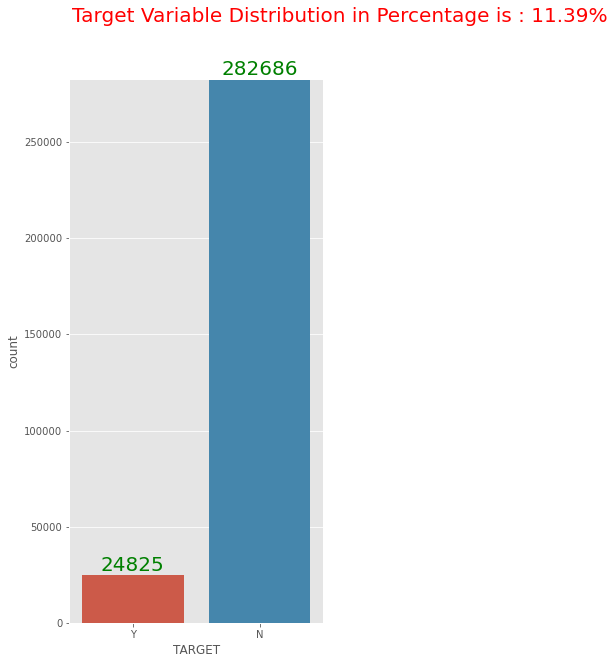

In [33]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
ax=sns.countplot(x=df.TARGET, data=df)
plt.suptitle("Target Variable Distribution in Percentage is : "+ str(Imbalace_Ratio) +"%" , fontsize=20,color='red')
#ylim max value to be set
y_max = df['TARGET'].value_counts().max() 
ax.set_ylim([0, round(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=20, color='green', ha='center', va='bottom')
plt.show()


### Inferences -It is Imbalaced dataset . There are more loan that were paid on time than not Paid on time .

### Univariate Analysis & Bivariate Analysis Numerical columns 
- #### Getting the list of columns with Datatype float64 and int64
- #### Identifying and Removing outliers 
- #### Analysis for Columns after removing outliers in case of Defaulters 

In [34]:
df.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [35]:
df.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

###  Checking for Outliers 

In [36]:
pd.set_option('float_format', '{:f}'.format) ### values was shwon in power of e so change the format


### All functions at one place for Numerical Column Analysis 

In [37]:

def box_plot(df,var): # Designed for defaulters 
    plt.figure(figsize=(15,5))    
    s=sns.boxplot(y=df[var], x=df['TARGET']);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")

def hist_plot2(df,var): #for both defaulters and Non-Defaulters 
    x_text={'Y':'Defaulters', 'N':'Non-Defaulters'}
    plt.figure(figsize=[10,10])
    for i,j in enumerate(df.TARGET.unique()): 
        plt.subplot(1,2,i+1)       
        
        sns.histplot(x=df[df['TARGET']==j][var])
        plt.xlabel(x_text[j],color='green', fontsize=10) 
        plt.xticks(rotation=90)
        plt.tight_layout()

def box_plot2(df,var):
    x_text={'Y':'Defaulters', 'N':'Non-Defaulters'}
    plt.figure(figsize=[10,10])
    for i,j in enumerate(df.TARGET.unique()): 
        plt.subplot(1,2,i+1)          
        sns.boxplot(y=df[df['TARGET']==j][var])
        plt.xlabel(x_text[j],color='green', fontsize=10) 
    plt.ylabel(var)

def hist_plot(df,Col):    ## Desgined for Defaulters only 
    plt.figure(figsize=[10,10])        
    sns.histplot(x=df[Col],kde=True)
    plt.xlabel(Col,color='green', fontsize=10) 
    plt.xticks(rotation=90)
    plt.ylabel("Count for defaulters")
    plt.tight_layout()

def count_plot2(df,var): #for both defaulters and Non-Defaulters 
    x_text={'Y':'Defaulters', 'N':'Non-Defaulters'}
    plt.figure(figsize=[10,10])
    for i,j in enumerate(df.TARGET.unique()): 
        plt.subplot(1,2,i+1)       
        
        sns.countplot(x=df[df['TARGET']==j][var])
        plt.xlabel(var,color='blue', fontsize=12) 
        plt.title( "Distribution for " +x_text[j] )
        plt.xticks(rotation=90)
        plt.tight_layout()
    

    

    

    
    
    



### Analysis for Column AMT_INCOME_TOTAL

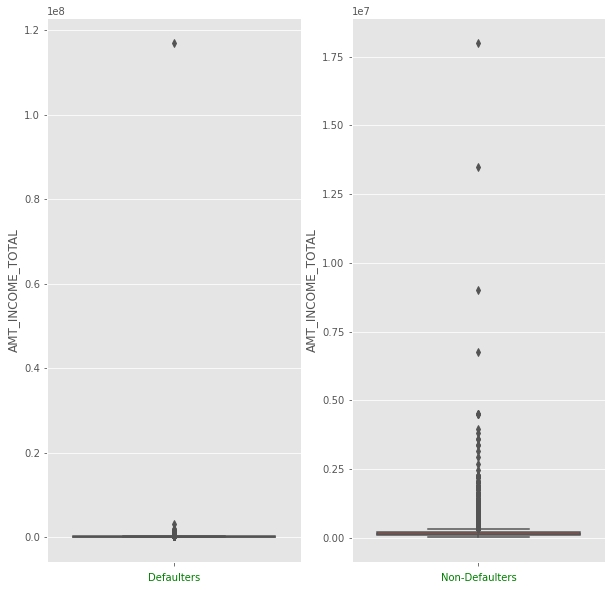

In [38]:
box_plot2(df, 'AMT_INCOME_TOTAL')


In [39]:
np.quantile(df['AMT_INCOME_TOTAL'],[.25,.75,.80,.95,.90,.95,.99,1])

array([1.125e+05, 2.025e+05, 2.250e+05, 3.375e+05, 2.700e+05, 3.375e+05,
       4.725e+05, 1.170e+08])

#### We can see some dotted line in above box plot and by the use of quantile functions can see outliers use function -remove_outliers to remove it 

[112500. 202500. 225000. 315000. 270000. 315000. 427500. 469800.]


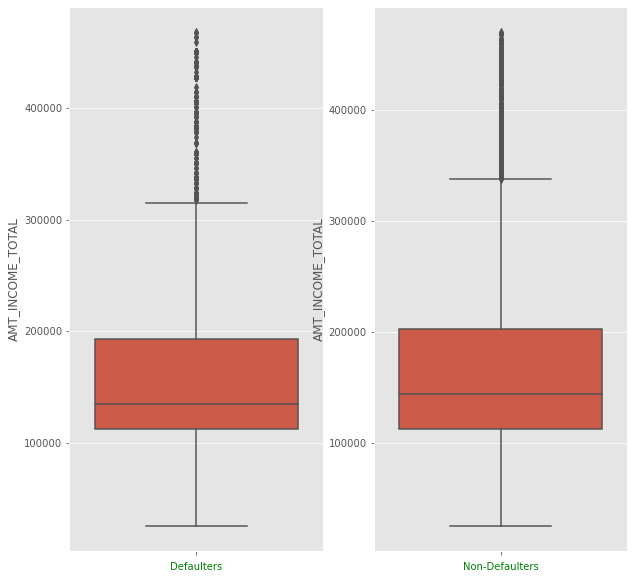

In [40]:
df=df[df.AMT_INCOME_TOTAL<np.nanpercentile(df.AMT_INCOME_TOTAL,99)]
Defaulter=df[df.TARGET=='Y'] # updating Dataframe for defaulter 
Non_Defaulter=df[df.TARGET=='N'] # updating dataframe for non-defaulter 
print(np.quantile(df['AMT_INCOME_TOTAL'],[.25,.75,.80,.95,.90,.95,.99,1]))
box_plot2(df, 'AMT_INCOME_TOTAL')

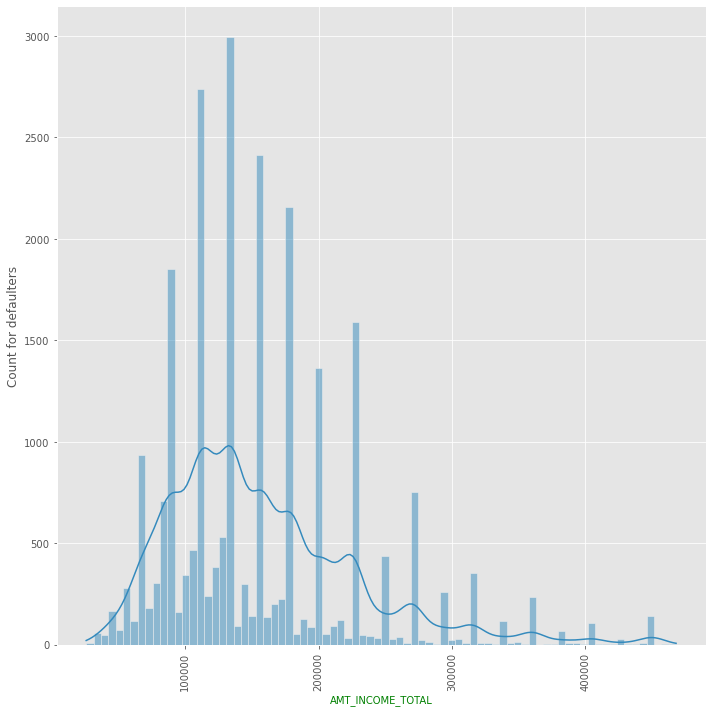

In [41]:
hist_plot(Defaulter,'AMT_INCOME_TOTAL')

#### From this we can tell that for defaulters- Range for AMT_TOTAL_Income is between 100000 to 20000 and some point are also present at higher range

###  Analysis for Column AMT_CREDIT 

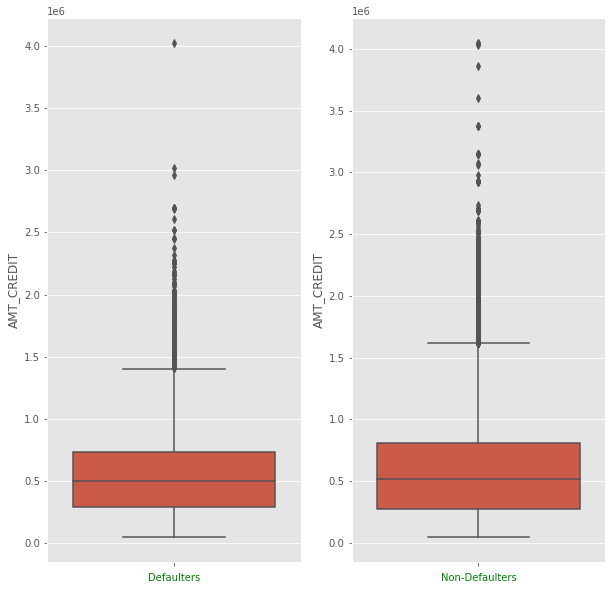

In [42]:
box_plot2(df,'AMT_CREDIT')

In [43]:
np.quantile(df['AMT_CREDIT'],[.25,.75,.80,.95,.90,.95,.99,1])


array([ 270000.,  808650.,  900000., 1350000., 1125000., 1350000.,
       1800000., 4050000.])

#### if you obeserve qunatile for column-AMT_CREDIT .99 percentile it is  1800000 and for 1 it is 4050000, which is way bigger . 
#### removing it and keeping data till 99 percentile .

[ 270000.   797557.5  889515.  1288350.  1119411.  1288350.  1575000.
 1798605. ]


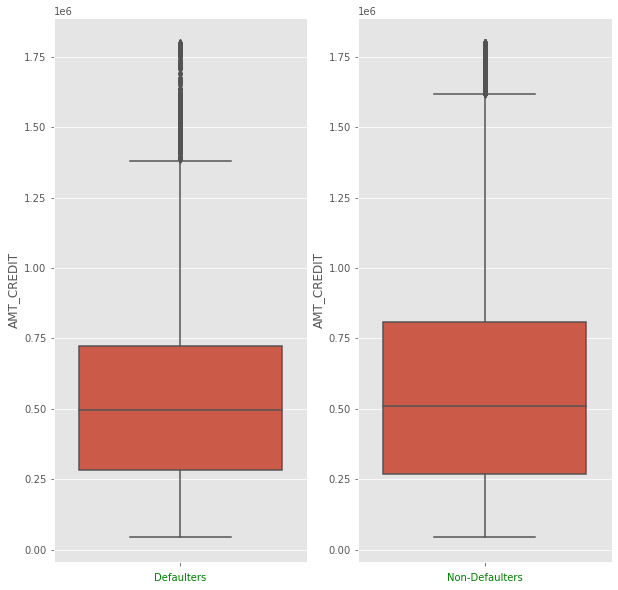

In [44]:
df=df[df.AMT_CREDIT<np.nanpercentile(df.AMT_CREDIT,99)]
Defaulter=df[df.TARGET=='Y']
Non_Defaulter=df[df.TARGET=='N']
print(np.quantile(df['AMT_CREDIT'],[.25,.75,.80,.95,.90,.95,.99,1]))
box_plot2(df, 'AMT_CREDIT')

[ 270000.   797557.5  889515.  1288350.  1119411.  1288350.  1575000.
 1798605. ]


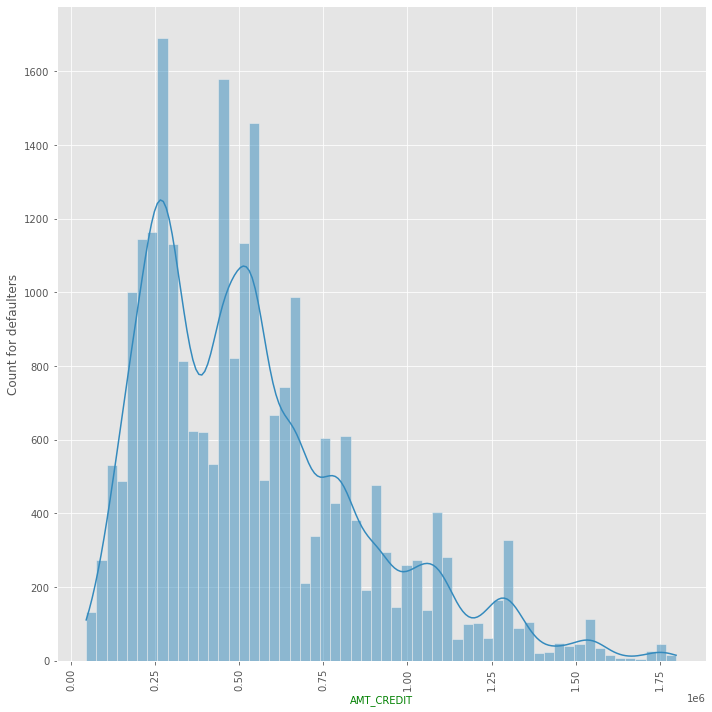

In [45]:
print(np.quantile(df['AMT_CREDIT'],[.25,.75,.80,.95,.90,.95,.99,1]))

hist_plot(Defaulter,'AMT_CREDIT')

#### From above we can see for defaulters AMT_CREDIT lies between 200000 to 750000

#### Analysis for column AMT_ANNUITY

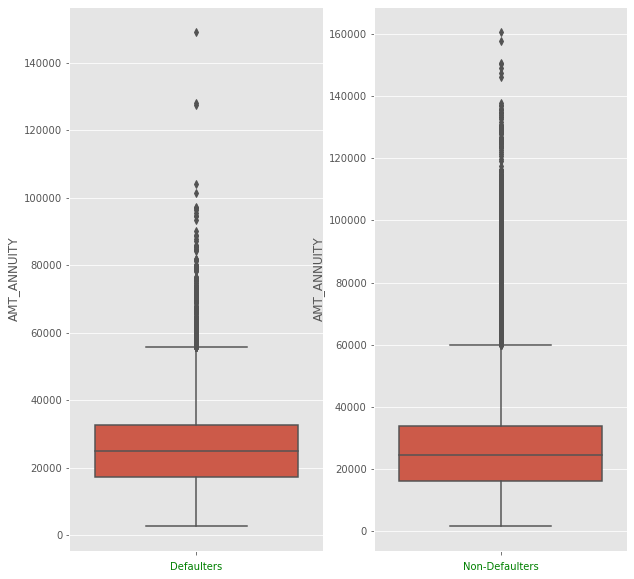

In [46]:
box_plot2(df,'AMT_ANNUITY')

In [47]:

df['AMT_ANNUITY'].describe()


count   300704.000000
mean     26412.249589
std      13431.044217
min       1615.500000
25%      16389.000000
50%      24588.000000
75%      33750.000000
max     160686.000000
Name: AMT_ANNUITY, dtype: float64

### Remove Outliers 

In [48]:
Col='AMT_ANNUITY'

Q1 = df[Col].quantile(0.25)
Q3 = df[Col].quantile(0.75)
IQR = Q3 - Q1
df= df[~((df[Col] < (Q1 - 1.5 * IQR)) |(df[Col] > (Q3 + 1.5 * IQR)))]

In [49]:
df['AMT_ANNUITY'].describe()


count   295198.000000
mean     25568.524936
std      11897.143035
min       1615.500000
25%      16213.500000
50%      24313.500000
75%      33025.500000
max      59787.000000
Name: AMT_ANNUITY, dtype: float64

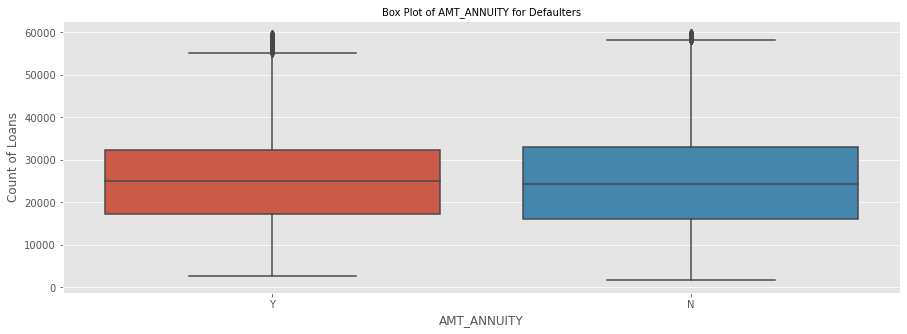

In [50]:
box_plot(df,'AMT_ANNUITY')

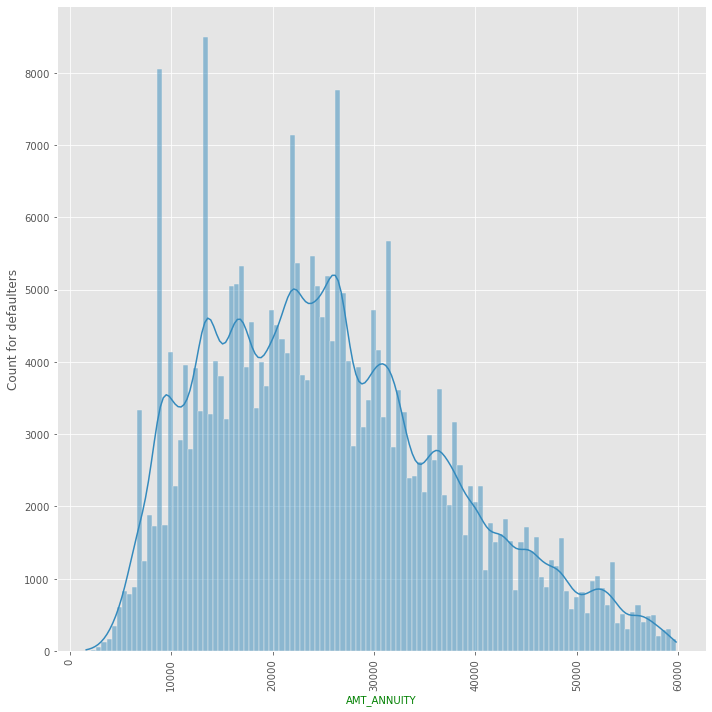

In [51]:

hist_plot(df,'AMT_ANNUITY')

#### Amount of ANNUITY is on left side mostly for Defaulters lies between 10000 to 40000 

###  Analysis for column AMT_GOODS_PRICE

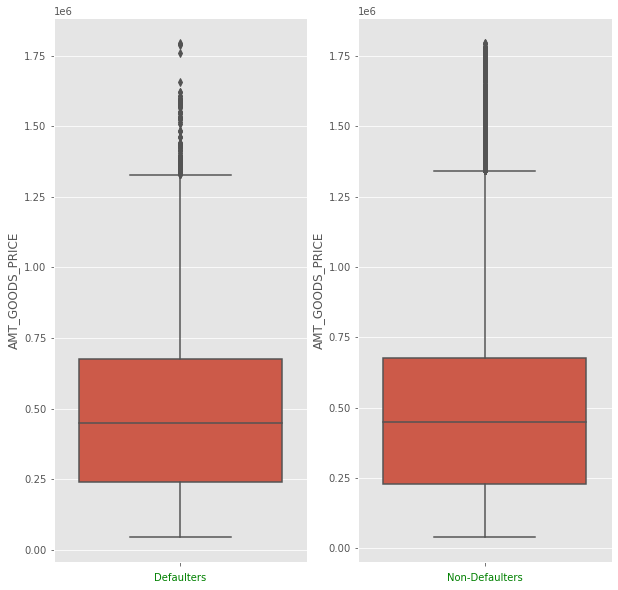

In [52]:
box_plot2(df,'AMT_GOODS_PRICE')

In [53]:
df['AMT_GOODS_PRICE'].describe()

count    294937.000000
mean     506494.667782
std      323392.526480
min       40500.000000
25%      229500.000000
50%      450000.000000
75%      675000.000000
max     1795500.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [54]:

Col='AMT_GOODS_PRICE'

Q1 = df[Col].quantile(0.25)
Q3 = df[Col].quantile(0.75)
IQR = Q3 - Q1
df= df[~((df[Col] < (Q1 - 1.5 * IQR)) |(df[Col] > (Q3 + 1.5 * IQR)))]

In [55]:
df['AMT_GOODS_PRICE'].describe()

count    286507.000000
mean     479759.861024
std      286984.216030
min       40500.000000
25%      229500.000000
50%      450000.000000
75%      675000.000000
max     1341000.000000
Name: AMT_GOODS_PRICE, dtype: float64

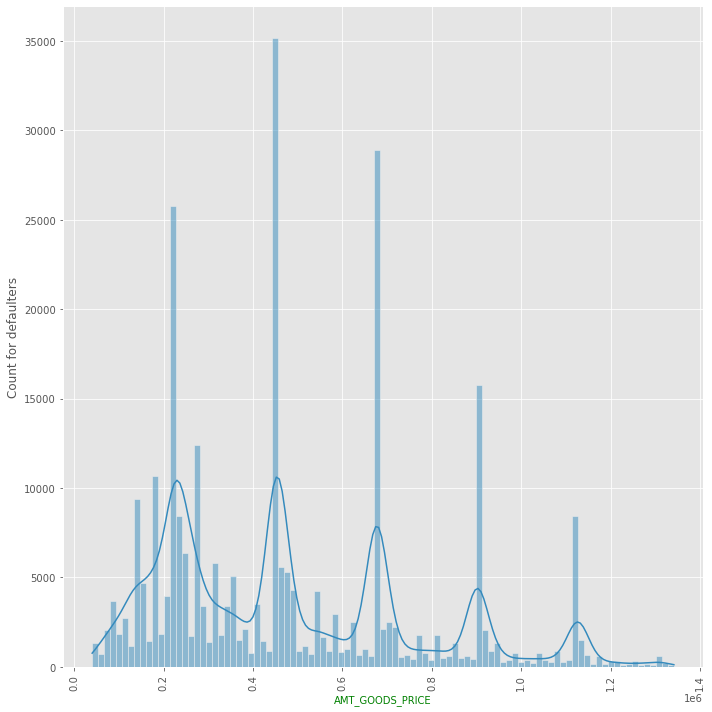

In [56]:
hist_plot(df,'AMT_GOODS_PRICE')

In [57]:
df.REGION_POPULATION_RELATIVE

0        0.018801
1        0.003541
2        0.010032
3        0.008019
4        0.028663
           ...   
307506   0.032561
307507   0.025164
307508   0.005002
307509   0.005313
307510   0.046220
Name: REGION_POPULATION_RELATIVE, Length: 286780, dtype: float64

### Analysis for Column DAYS_LAST_PHONE_CHANGE

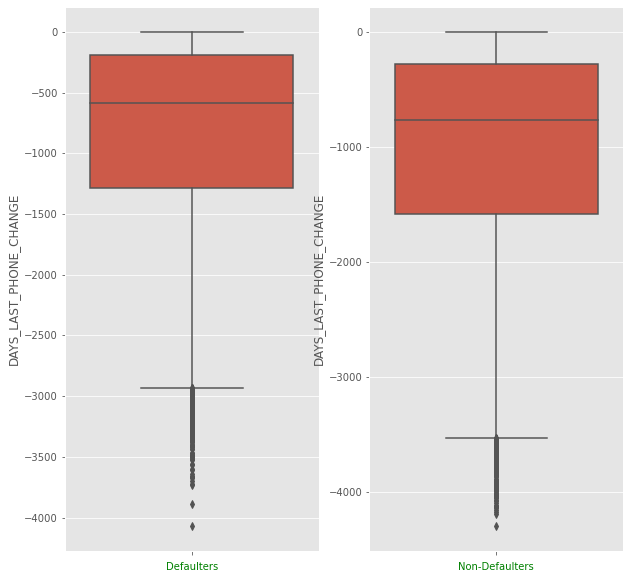

In [58]:
box_plot2(df,'DAYS_LAST_PHONE_CHANGE')

#### Not much difference between Defaulters ans Non-Defaulters for the field/Column -'DAYS_LAST_PHONE_CHANGE'

### Analysis for column DAYS_BIRTH

In [59]:
df.DAYS_BIRTH.describe()

count   286780.000000
mean    -16017.192489
std       4399.844691
min     -25201.000000
25%     -19700.000000
50%     -15712.000000
75%     -12337.000000
max      -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [60]:
Col='DAYS_BIRTH'
Q1 = df[Col].quantile(0.25)
Q3 = df[Col].quantile(0.75)
IQR = Q3 - Q1
df= df[~((df[Col] < (Q1 - 1.5 * IQR)) |(df[Col] > (Q3 + 1.5 * IQR)))]

In [61]:
df.DAYS_BIRTH.describe()

count   286780.000000
mean    -16017.192489
std       4399.844691
min     -25201.000000
25%     -19700.000000
50%     -15712.000000
75%     -12337.000000
max      -7489.000000
Name: DAYS_BIRTH, dtype: float64

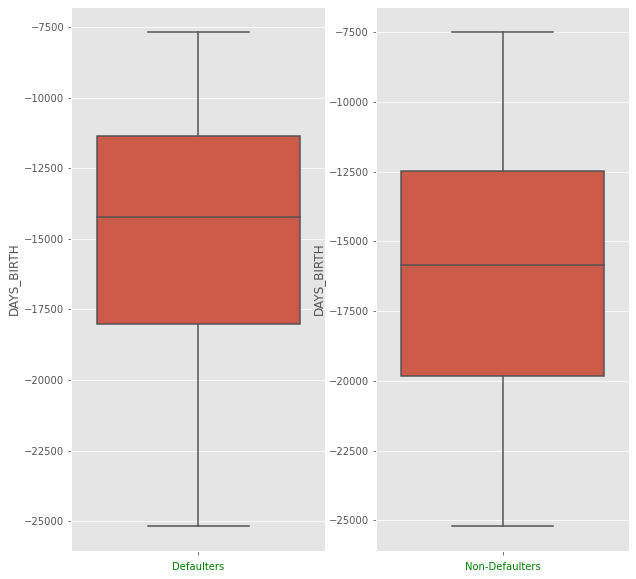

In [62]:
box_plot2(df,'DAYS_BIRTH')

#### Coverting Column 'DAYS_BIRTH' to New Column 'AGE'

In [63]:
df['AGE']=df['DAYS_BIRTH']/-365

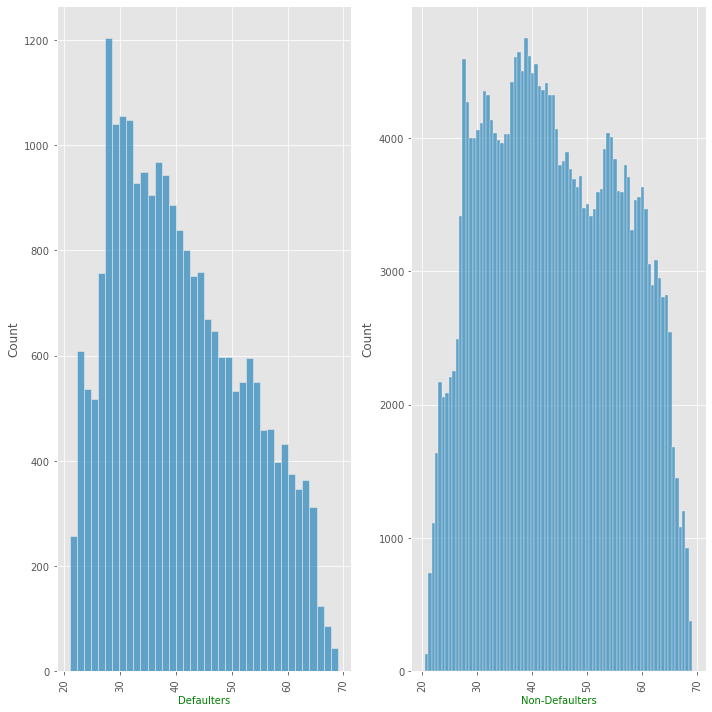

In [64]:
hist_plot2(df,'AGE')

#### In case of Both Defaulters and Non-Defaultrers age seems to be fairly distributed 
#### We noticed by Age, defaulter count is decreasing  , looks like with Age people default less .

### Analysis for DAYS_EMPLOYED

In [65]:
df.DAYS_EMPLOYED.describe()

count   286780.000000
mean     65137.171581
std     142335.532727
min     -17912.000000
25%      -2713.000000
50%      -1185.000000
75%       -274.000000
max     365243.000000
Name: DAYS_EMPLOYED, dtype: float64

#### max values is here 365243 -it is practically not possible , removing outliers  

In [66]:
df=df[df.DAYS_EMPLOYED<np.nanpercentile(df.DAYS_EMPLOYED,99)]
Defaulter=df[df.TARGET=='Y']
Non_Defaulter=df[df.TARGET=='N']
print(np.quantile(df['AMT_CREDIT'],[.25,.75,.80,.95,.90,.95,.99,1]))


[ 270000.   765000.   835380.  1170000.  1046142.  1170000.  1319269.5
 1712727. ]


In [67]:
df.DAYS_EMPLOYED.describe()

count   234126.000000
mean     -2355.427659
std       2324.397883
min     -17912.000000
25%      -3135.000000
50%      -1621.000000
75%       -755.000000
max          0.000000
Name: DAYS_EMPLOYED, dtype: float64

#### converting days employed to years employed 

In [68]:
df['YEARS_EMPLOYED']=df['DAYS_EMPLOYED']/-365

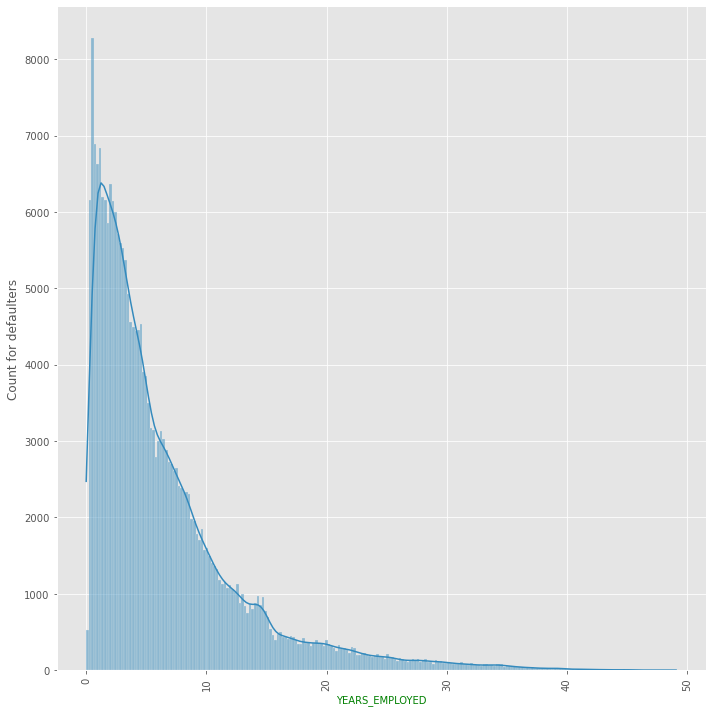

In [69]:
hist_plot(df,'YEARS_EMPLOYED')

<AxesSubplot:xlabel='YEARS_EMPLOYED', ylabel='Count'>

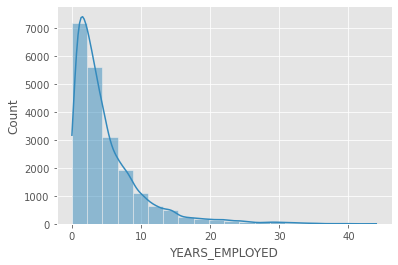

In [70]:
sns.histplot(df[df.TARGET=='Y'].YEARS_EMPLOYED,bins=20,kde=True)

#### Lots of people are having low work experience  who are defaulters almost 0 year of service 

### Analysis for CNT_FAM_MEMBERS

In [71]:
df.CNT_FAM_MEMBERS.describe()

count   234124.000000
mean         2.248022
std          0.946306
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

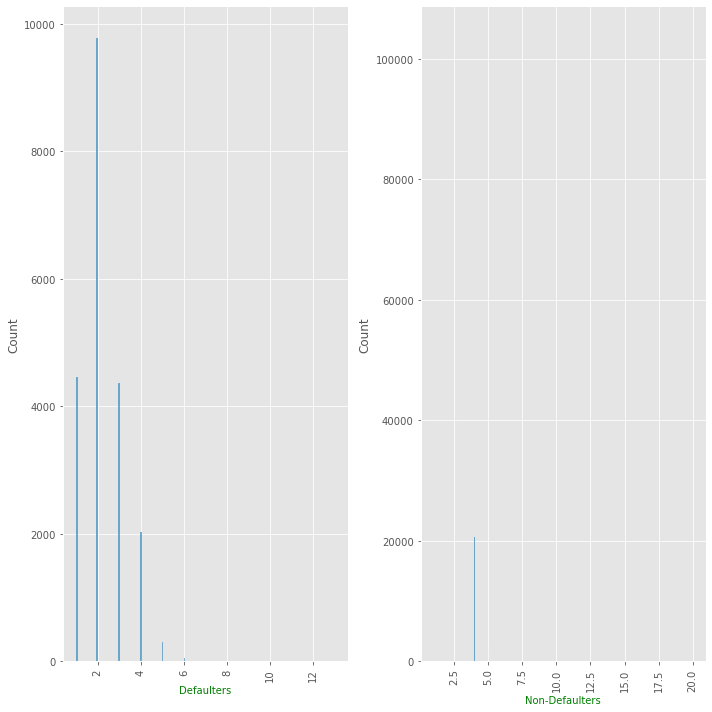

In [72]:
hist_plot2(df,'CNT_FAM_MEMBERS')

#### Analysis for CNT_CHILDREN

In [73]:
df.CNT_CHILDREN.describe

<bound method NDFrame.describe of 0         0
1         0
2         0
3         0
4         0
         ..
307504    0
307506    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 234126, dtype: int64>

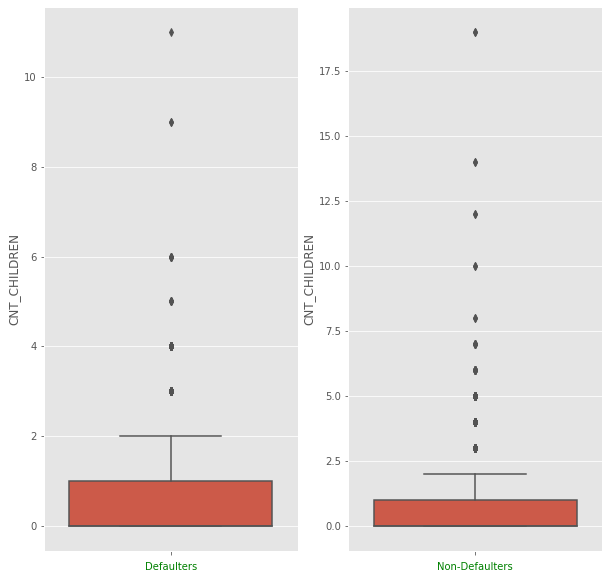

In [74]:
box_plot2(df, 'CNT_CHILDREN')

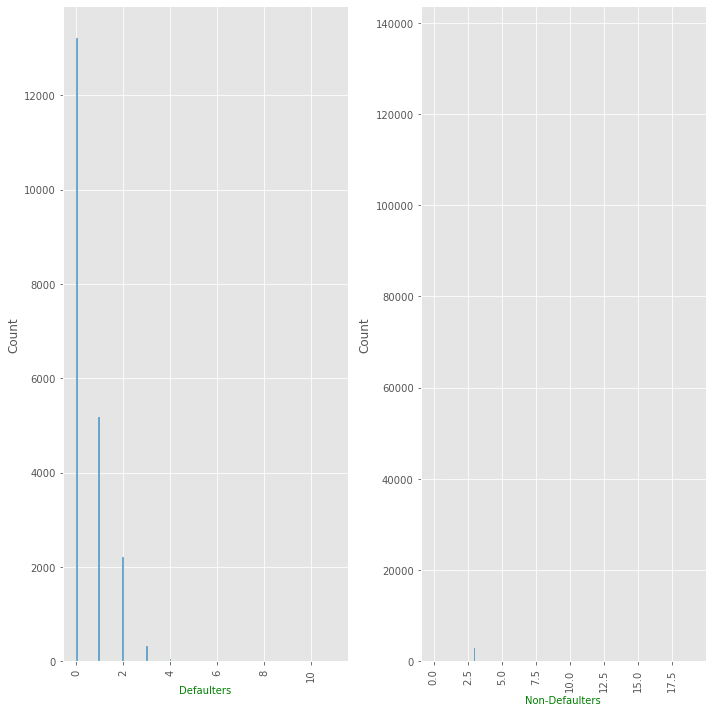

In [75]:
hist_plot2(df,'CNT_CHILDREN')

### Univariate Analysis & Bivariate Analysis Objects columns 
- #### Getting the list of columns with Datatype Object 


In [76]:
df.select_dtypes('object').columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20

In [77]:
len(df.select_dtypes('object').columns)

45

### Analysis for column -NAME_CONTRACT_TYPE

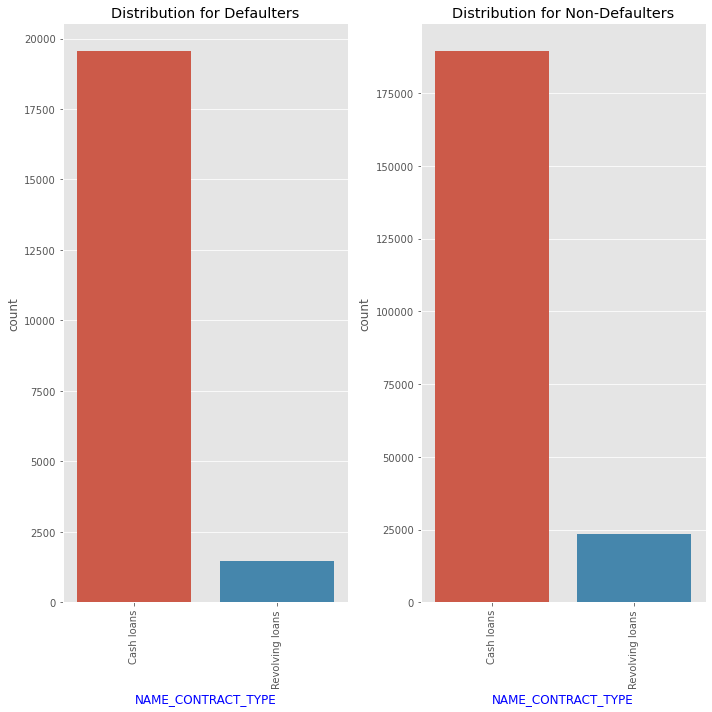

In [78]:
count_plot2(df,'NAME_CONTRACT_TYPE')

#### Cash loan is way higher than revolving loans for both defaulters and non -defaulters 

### Analysis for column CODE_GENDER 

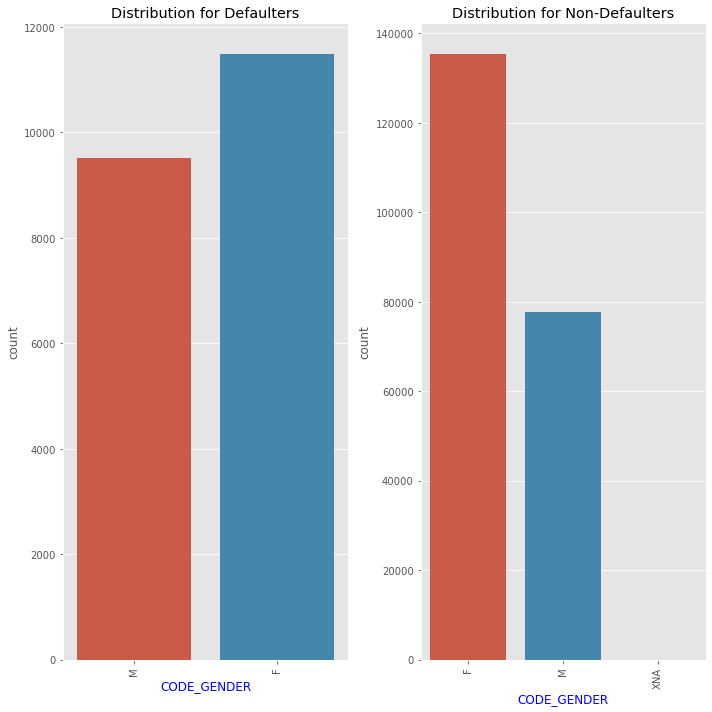

In [79]:
count_plot2(df,'CODE_GENDER')

#### For both defaulter and non-defaulter feamles are taking more loan comparison to Man .

#### Analysis for FLAG_OWN_CAR

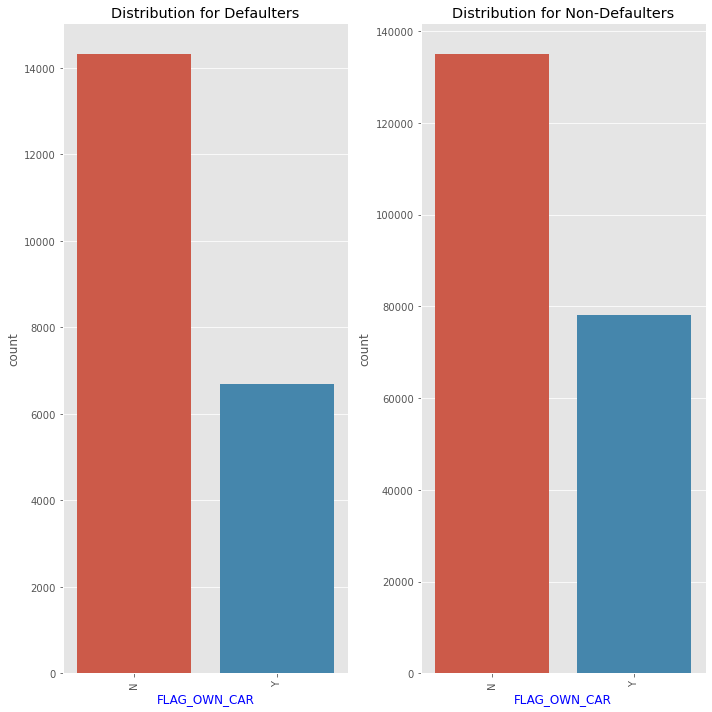

In [80]:
count_plot2(df,'FLAG_OWN_CAR')

#### For Defaulters people not having Car tend to default more , ratio is high than people own Car


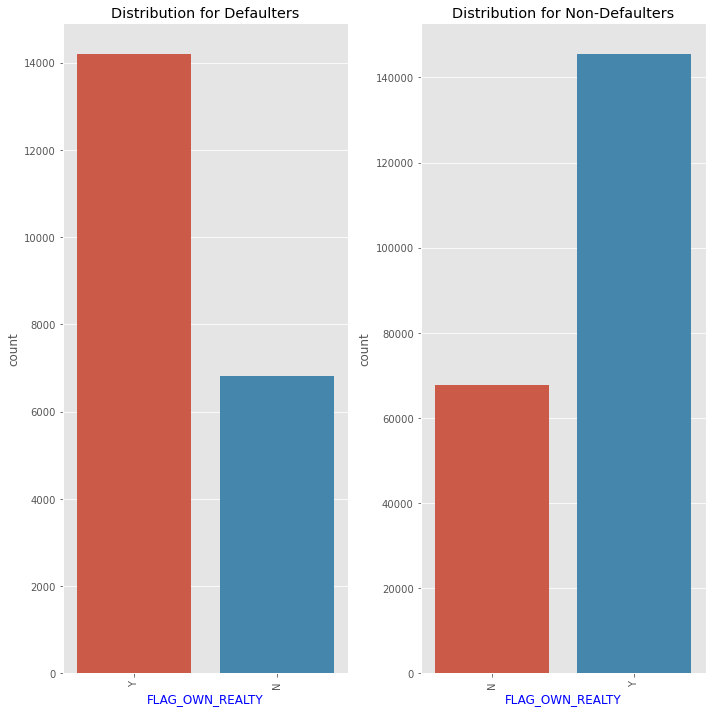

In [81]:
count_plot2(df,'FLAG_OWN_REALTY')

#### In both category people are own houses i.e.  are in good numbers 

### Analysis for NAME_INCOME_TYPE

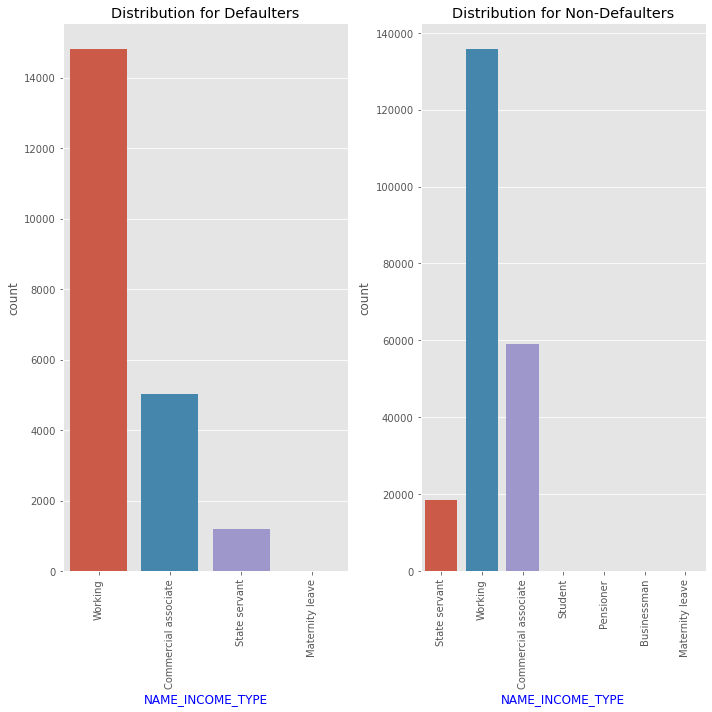

In [82]:
count_plot2(df,'NAME_INCOME_TYPE')

#### Comercial Associate  and State servant are in good numbers in case of non-defaulters 

### Analysis for NAME_EDUCATION_TYPE

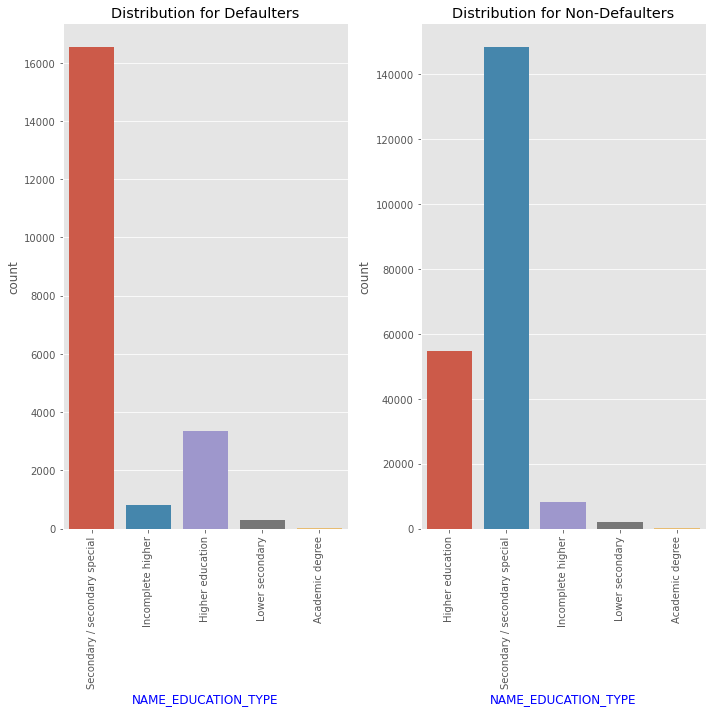

In [83]:
count_plot2(df,'NAME_EDUCATION_TYPE')

#### People with Academic degree takes loan rarely and default rarely too -Good to target them 
#### People with Secondary/secaodary speacial are getting more loan and defaulting more 
#### People with higher education having less defficulty paying them .


### Analysis for column NAME_FAMILY_STATUS

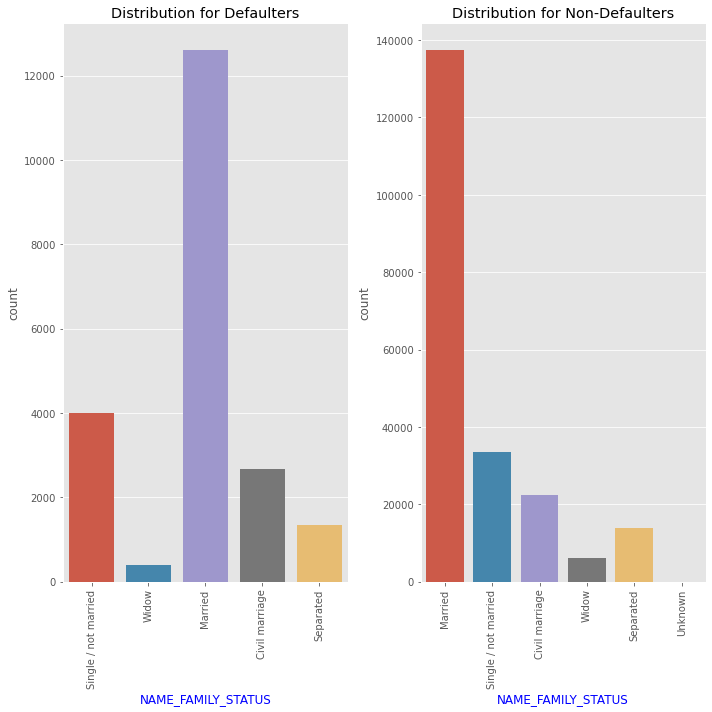

In [84]:
count_plot2(df,'NAME_FAMILY_STATUS')

#### Single/Not Married People  having difficulties in paying loans 

### Analysis for NAME_HOUSING_TYPE

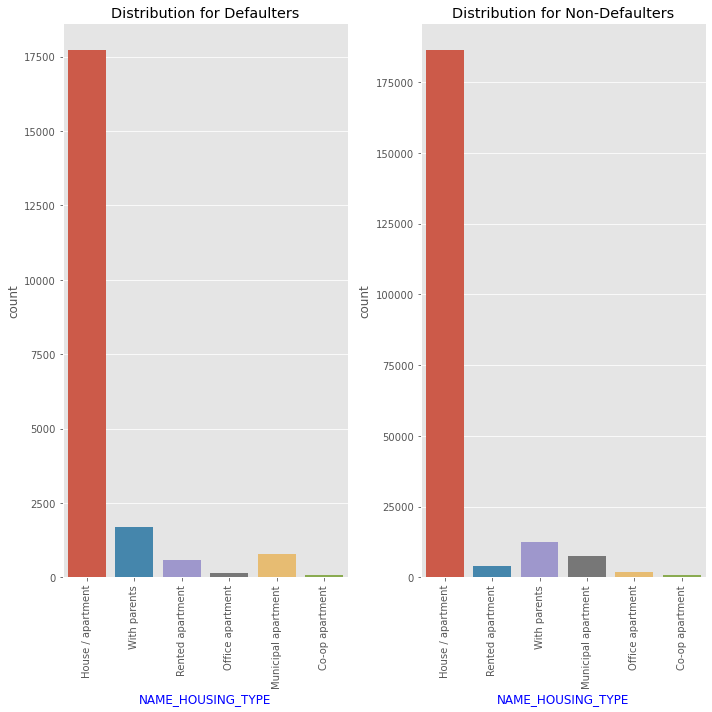

In [85]:
count_plot2(df,'NAME_HOUSING_TYPE')

#### Most people lives in House/Apartments for both Defaulters and non-Defaulters .
#### People living with Parents having difficulties in paying loans .

### Analysis for column -FLAG_MOBIL

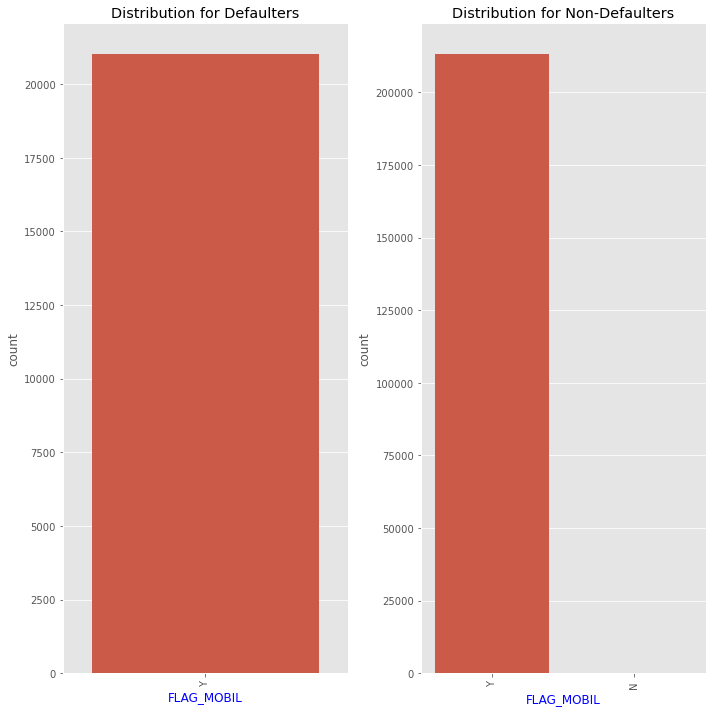

In [86]:
count_plot2(df,'FLAG_MOBIL')

### Analysis for column -FLAG_WORK_PHONE

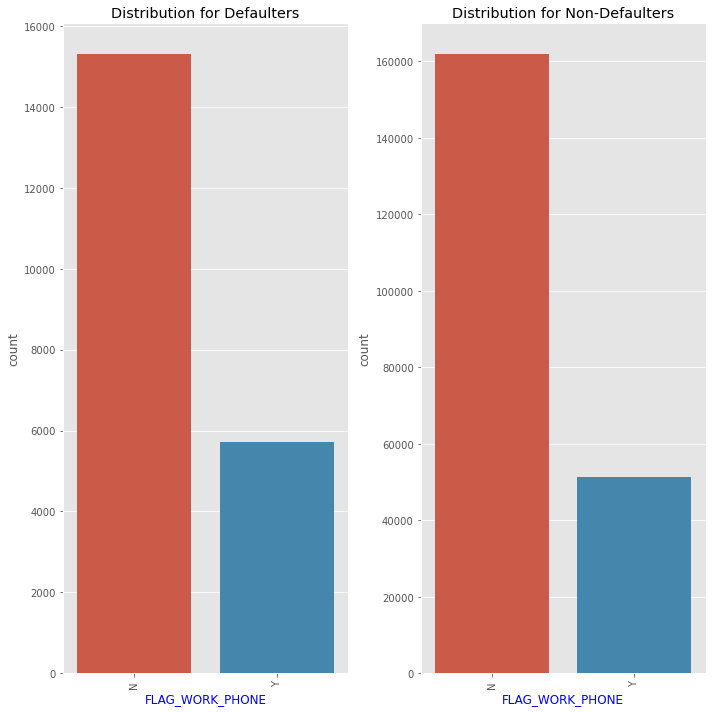

In [87]:
count_plot2(df,'FLAG_WORK_PHONE')

### Analysis for OCCUPATION_TYPE

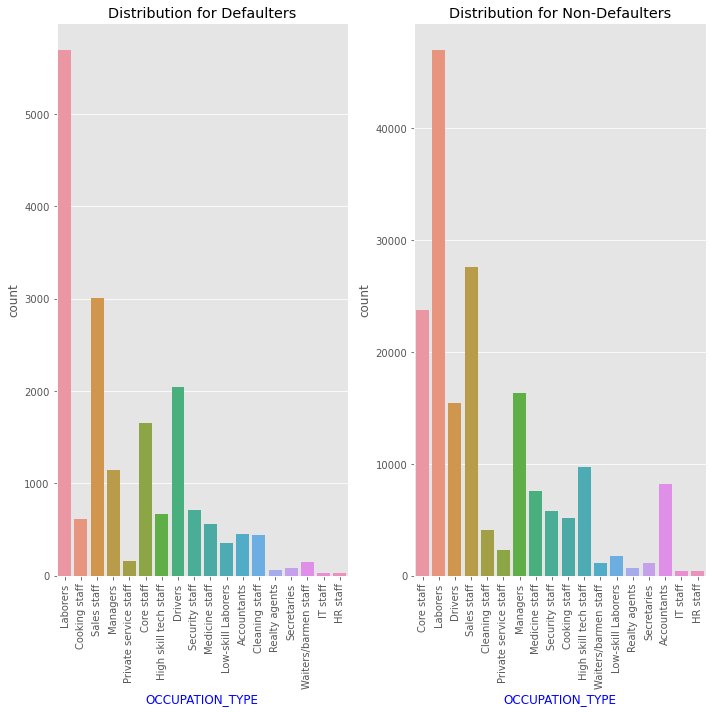

In [88]:
count_plot2(df, 'OCCUPATION_TYPE')

### Analysis for REG_CITY_NOT_WORK_CITY

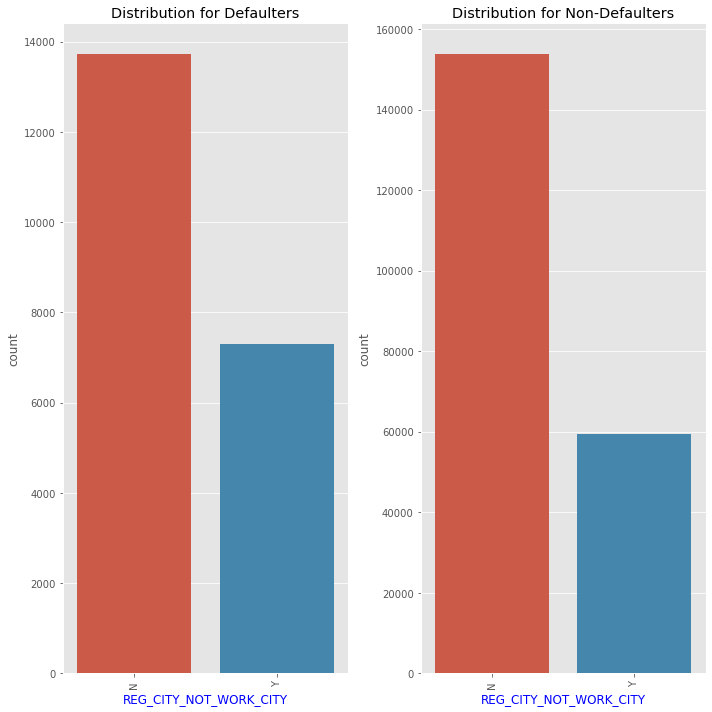

In [89]:
count_plot2(df,'REG_CITY_NOT_WORK_CITY')

####  People whose reg city is not same as work city facing difficultes while paying loans 

### Analysis for REG_CITY_NOT_LIVE_CITY

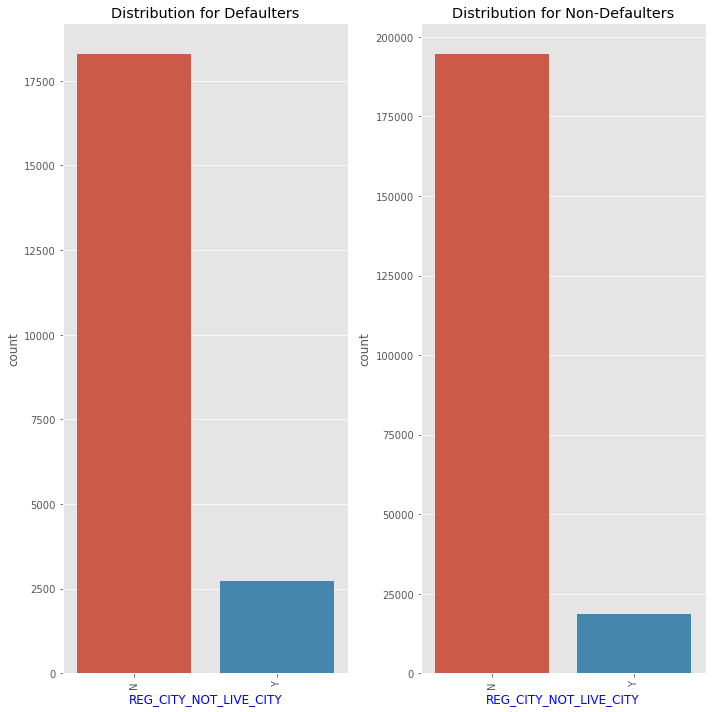

In [90]:
count_plot2(df,'REG_CITY_NOT_LIVE_CITY')

#### Sams as above people whose reg city is diffrent than living city facing difficulties while paying loan
#### In short, People whose Reg city is not same as live city or work city -are facing problems while paying loans 

### Analysis for column ORGANIZATION_TYPE

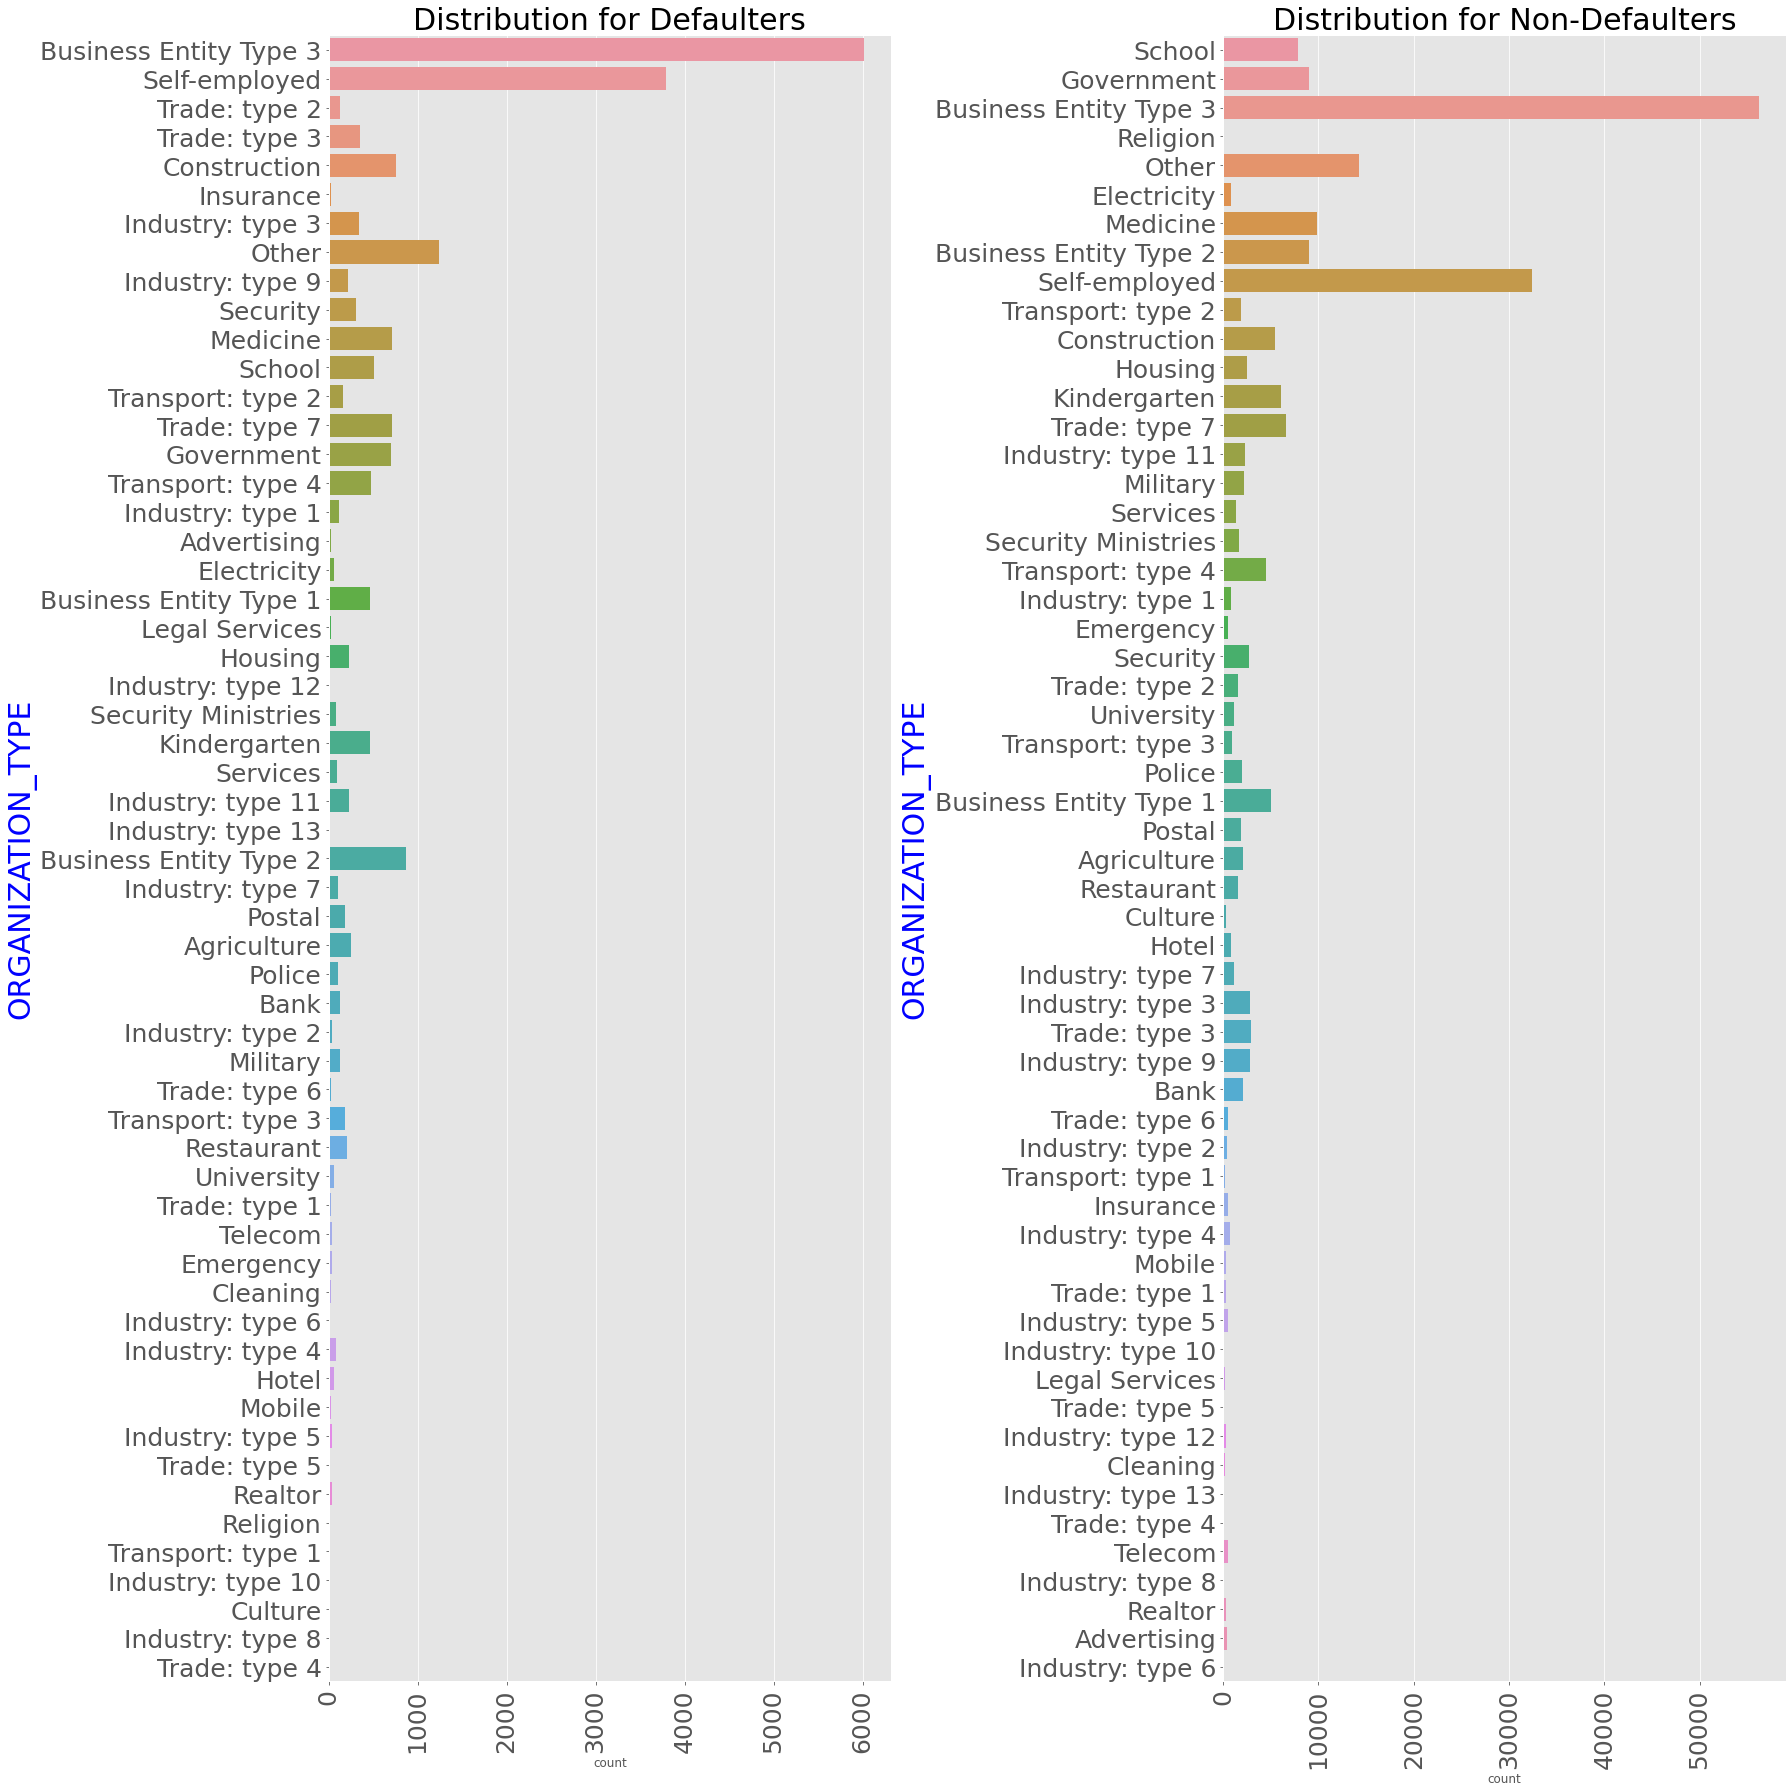

In [91]:
x_text={'Y':'Defaulters', 'N':'Non-Defaulters'}
plt.figure(figsize=[25,25])
for i,j in enumerate(df.TARGET.unique()): 
    plt.subplot(1,2,i+1)  
        
    sns.countplot(y=df[df['TARGET']==j]['ORGANIZATION_TYPE'])
    plt.ylabel("ORGANIZATION_TYPE",color='blue', fontsize=30) 
    plt.title( "Distribution for " +x_text[j] ,fontsize=30)
    plt.xticks(size=25,rotation=90)
    plt.yticks(size=25)

    plt.tight_layout()


### Binning of Continous Varaibles 

#### Analysis for column AMT_INCOME_TOTAL-Income of client 

In [92]:
df.AMT_INCOME_TOTAL.describe()

count   234126.000000
mean    163947.469954
std      74178.704244
min      25650.000000
25%     112500.000000
50%     153000.000000
75%     202500.000000
max     468823.500000
Name: AMT_INCOME_TOTAL, dtype: float64

In [93]:
df.AMT_INCOME_TOTAL

0        202500.000000
1        270000.000000
2         67500.000000
3        135000.000000
4        121500.000000
              ...     
307504   153000.000000
307506   157500.000000
307508   153000.000000
307509   171000.000000
307510   157500.000000
Name: AMT_INCOME_TOTAL, Length: 234126, dtype: float64

In [94]:
df['INCOME_BRACKET']=np.where(df.AMT_INCOME_TOTAL<=25650,'VERY_LOW',
np.where(df.AMT_INCOME_TOTAL<=100000,'LOW',
np.where(df.AMT_INCOME_TOTAL<=200000,'MODERATE',
np.where(df.AMT_INCOME_TOTAL<=300000,'HIGH' ,
np.where(df.AMT_INCOME_TOTAL>300000,'VERY_HIGH' ,'')))))

                 

In [95]:
df[df.TARGET=='Y'].INCOME_BRACKET.value_counts().sort_values(ascending=False)

MODERATE     11661
HIGH          4243
LOW           4165
VERY_HIGH      939
Name: INCOME_BRACKET, dtype: int64

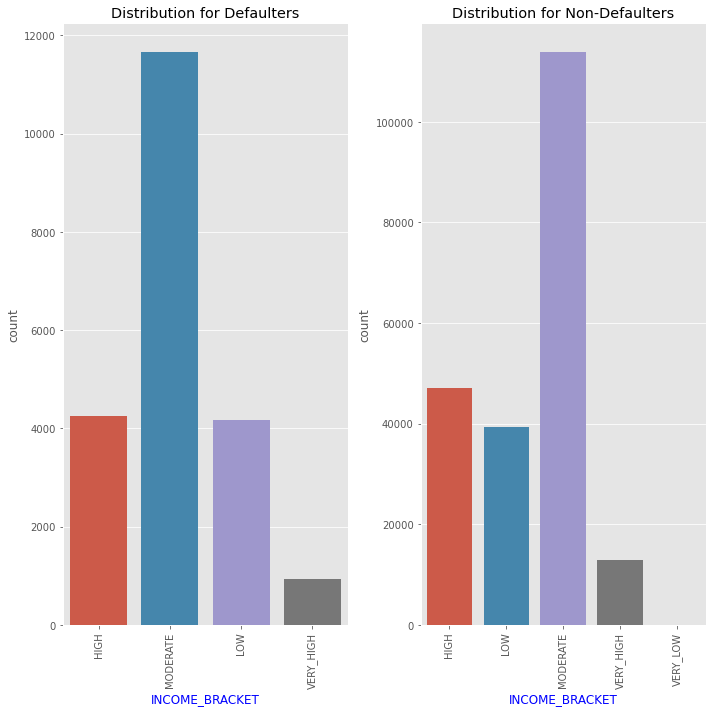

In [96]:
count_plot2(df,'INCOME_BRACKET')

#### 1. People/client with Very High income less likely to default Loan .
#### 2. People with high/moderate income exist both places defaulter and non-defaulter , this is range/bracket who is applying for loan .


### Analysis for AMT_CREDIT 

In [97]:
df.AMT_CREDIT.describe()

count    234126.000000
mean     547895.023391
std      323331.818808
min       45000.000000
25%      270000.000000
50%      495000.000000
75%      765000.000000
max     1712727.000000
Name: AMT_CREDIT, dtype: float64

In [98]:
df['CREDIT_BRACKET']=np.where(df.AMT_CREDIT<=45000,'VERY_LOW_CREDIT',
np.where(df.AMT_CREDIT<=272520,'LOW_CREDIT',
np.where(df.AMT_CREDIT<=800000,'MODERATE_CREDIT',
np.where(df.AMT_CREDIT<=1500000,'HIGH_CREDIT' ,
np.where(df.AMT_CREDIT>1500000,'VERY_HIGH_CREDIT' ,'')))))


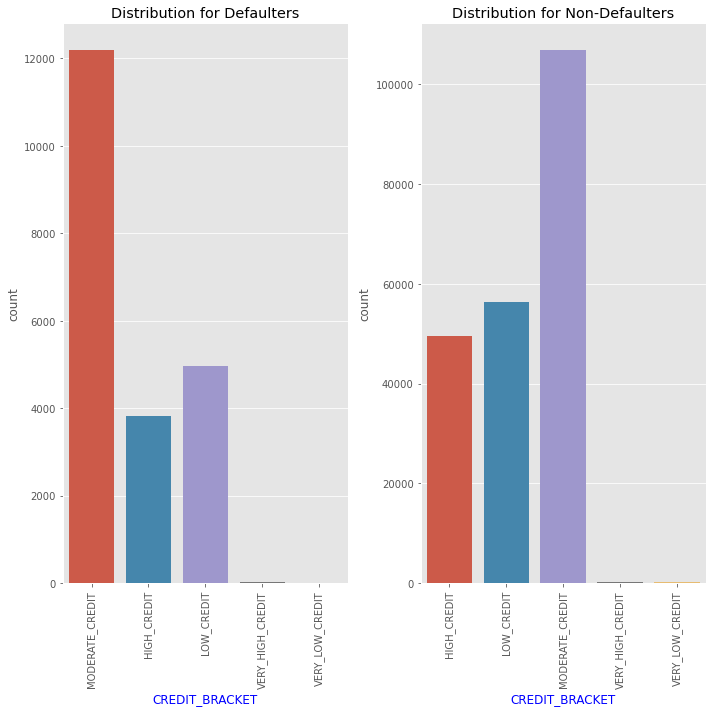

In [99]:
count_plot2(df,'CREDIT_BRACKET')

#### Bank is distributing moderate Amount (800000 to 1500000) maximum .
#### At both extreme very high and very low count is less . Looks like at extreme we are ok . Moderate/High is bracket where we need to pay attention because in this segment we are crediting loan more and defaulters count is high too .


#### Analysis for EXT_SOURCE_2 & EXT_SOURCE_3 -Binning them .




#### Analysis for Column EXT_SOURCE_2

In [100]:
df.EXT_SOURCE_2.describe()

count   233642.000000
mean         0.510651
std          0.190740
min          0.000000
25%          0.389471
50%          0.561180
75%          0.659686
max          0.855000
Name: EXT_SOURCE_2, dtype: float64

In [101]:
df['RATING2']=np.where(df.EXT_SOURCE_2<=.10,'VERY_LOW_RATING2',
np.where(df.EXT_SOURCE_2<=.35,'LOW_RATING2',
np.where(df.EXT_SOURCE_2<=.60,'MODERATE_RATING2',
np.where(df.EXT_SOURCE_2<=.85,'HIGH_RATING2' ,
np.where(df.EXT_SOURCE_2>.85,'VERY_HIGH_RATING2' ,'')))))

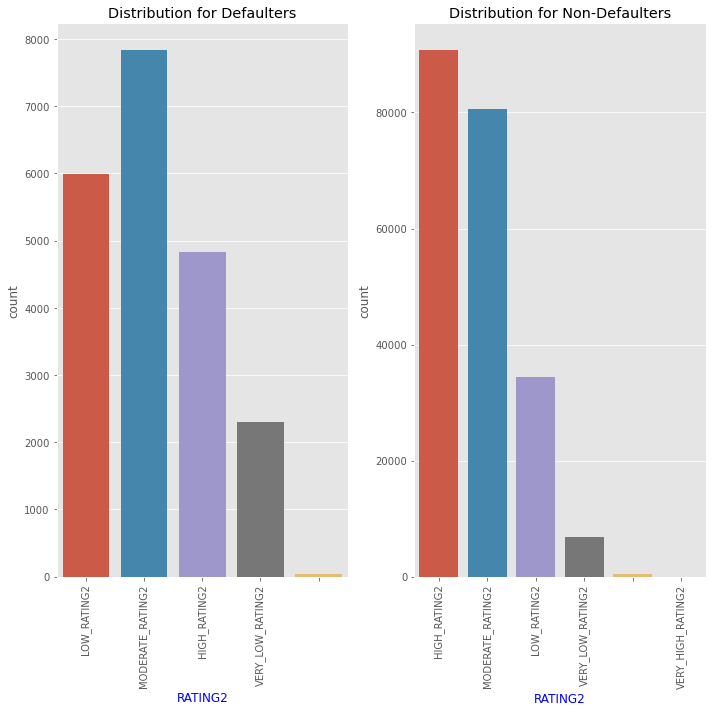

In [102]:
count_plot2(df,'RATING2')

In [103]:
df.EXT_SOURCE_3.describe()

count   187521.000000
mean         0.497745
std          0.196578
min          0.000527
25%          0.353988
50%          0.519097
75%          0.656158
max          0.893976
Name: EXT_SOURCE_3, dtype: float64

In [104]:
df['RATING3']=np.where(df.EXT_SOURCE_3<=.10,'VERY_LOW_RATING3',
np.where(df.EXT_SOURCE_3<=.35,'LOW_RATING3',
np.where(df.EXT_SOURCE_3<=.60,'MODERATE_RATING3',
np.where(df.EXT_SOURCE_3<=.85,'HIGH_RATING3' ,
np.where(df.EXT_SOURCE_3>.85,'VERY_HIGH_RATING3' ,'')))))

#### There were null values present at source-df.EXT_SOURCE_3 due to that some range were not classied , classifed them as Missing 







In [105]:
df.loc[df.RATING3=='',['RATING3']]='MISSING' 

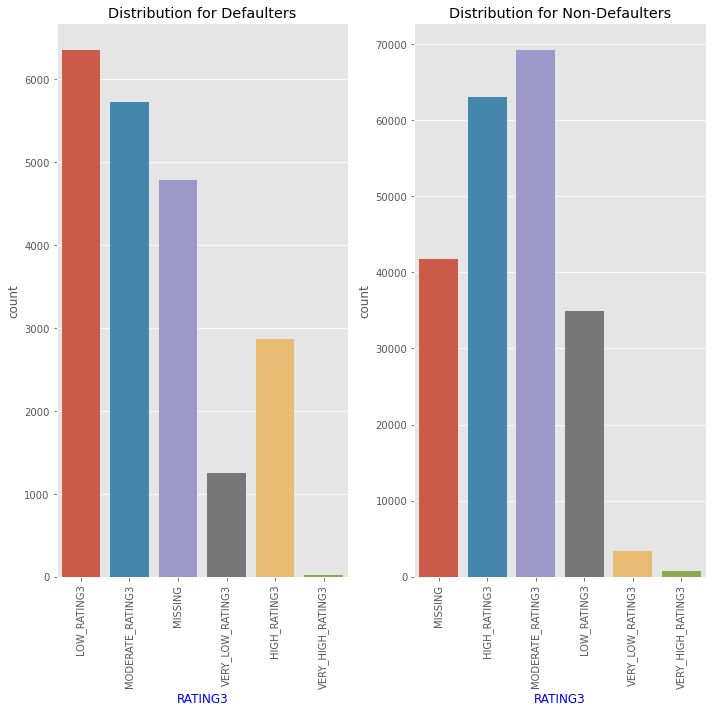

In [106]:
count_plot2(df,'RATING3')

#### A large number of people who defaulted the loan has very low rating or moderate rating .
#### People with good rating tends to default the loan less likely .


### Binning for AGE

In [107]:
df.AGE.describe()

count   234126.000000
mean        40.293657
std         10.053339
min         20.517808
25%         32.036301
50%         39.726027
75%         47.969863
max         69.041096
Name: AGE, dtype: float64

In [108]:
df['AGE_GROUP']=np.where(df.AGE<=10,'CHILD',
np.where(df.AGE<=.20,'ADULT',
np.where(df.AGE<=35,'YOUNG',
np.where(df.AGE<=50,'MID-AGE' ,
np.where(df.AGE<=60,'OLD-AGE' ,
np.where(df.AGE>60,'VERY-OLD-AGE' ,''))))))

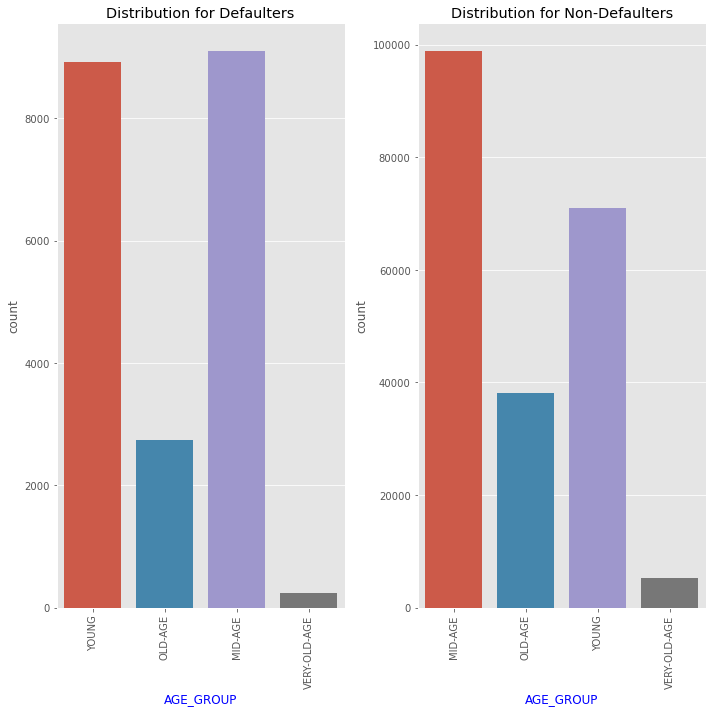

In [109]:
count_plot2(df,'AGE_GROUP')

#### MID-AGE people are applying for loan more often .
#### Young Age people are facing little difficulty paying the loan 
#### Very OLD AGE people are not applying much for loan but mostly paying on-time, good customer .

### Analysis for work experence -Column YEARS_EMPLOYED

In [110]:
df.YEARS_EMPLOYED.describe()

count   234126.000000
mean         6.453226
std          6.368213
min         -0.000000
25%          2.068493
50%          4.441096
75%          8.589041
max         49.073973
Name: YEARS_EMPLOYED, dtype: float64

In [111]:
df['EXP_GROUP']=np.where(df.YEARS_EMPLOYED<=3,'FRESHER',
np.where(df.YEARS_EMPLOYED<=8,'LOW_EXP',
np.where(df.YEARS_EMPLOYED<=15,'MID_EXP',
np.where(df.YEARS_EMPLOYED<=35,'HIGH-EXP' ,
np.where(df.YEARS_EMPLOYED>35,'VERY-HIGH-EXP' ,
'')))))

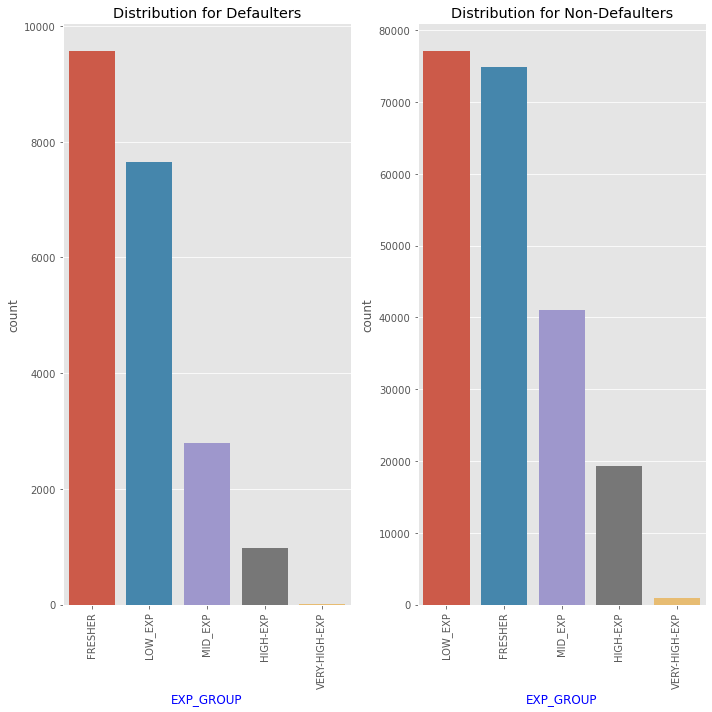

In [112]:
count_plot2(df,'EXP_GROUP')

#### Fresher and Low exp people are major people who are applying for loan and maximum defaulters are also coming from this category .
#### Mid experience/High exp people are paying less difficulty to repay the loan 

#### Very High exp people are good customers -Good Customers .


## Correlation 

#### Get all numeric and float column in one list 

In [113]:
list_for_cor=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION',
             'CNT_FAM_MEMBERS','EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AGE', 'YEARS_EMPLOYED', 'REGION_RATING_CLIENT',
             'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START' ]       
             



    

 


In [114]:
list_for_cor

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'AGE',
 'YEARS_EMPLOYED',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'CNT_CHILDREN',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START']

In [115]:
Defaulter=df[df.TARGET=='Y'][list_for_cor]
Non_Defaulter=df[df.TARGET=='N'][list_for_cor]

### Correlation for Defaulters 
 #### 1. Data frame for Defaulters 
 #### 2. Get Top 10 correaltion for Defaulteres 
 #### 3. Get Top 10 -negative  correlation for Defaulters 
 #### 4. Heat Map for Defaulters 

In [116]:
Corr_For_Defaulter=Defaulter.corr()

In [117]:
round(Corr_For_Defaulter,3)

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                     1.000000    0.310000     0.382000   
AMT_CREDIT                           0.310000    1.000000     0.734000   
AMT_ANNUITY                          0.382000    0.734000     1.000000   
AMT_GOODS_PRICE                      0.314000    0.978000     0.734000   
REGION_POPULATION_RELATIVE           0.105000    0.059000     0.054000   
DAYS_REGISTRATION                    0.005000   -0.039000     0.017000   
CNT_FAM_MEMBERS                     -0.021000    0.053000     0.061000   
EXT_SOURCE_2                         0.132000    0.102000     0.095000   
EXT_SOURCE_3                        -0.050000    0.090000     0.048000   
DAYS_LAST_PHONE_CHANGE              -0.083000   -0.117000    -0.080000   
AGE                                  0.095000    0.188000     0.079000   
YEARS_EMPLOYED                       0.028000    0.111000     0.045000   
REGION_RATING_CLIENT                -0.162000   -0.047000    -0.056000   
REGION_RATING_CLIENT_W_CITY         -0.178000   -0.057000    -0.071000   
CNT_CHILDREN                        -0.027000    0.003000     0.022000   
DAYS_ID_PUBLISH                     -0.041000   -0.060000    -0.040000   
HOUR_APPR_PROCESS_START              0.069000    0.021000     0.014000   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
AMT_INCOME_TOTAL                    0.314000                    0.105000   
AMT_CREDIT                          0.978000                    0.059000   
AMT_ANNUITY                         0.734000                    0.054000   
AMT_GOODS_PRICE                     1.000000                    0.068000   
REGION_POPULATION_RELATIVE          0.068000                    1.000000   
DAYS_REGISTRATION                  -0.038000                   -0.054000   
CNT_FAM_MEMBERS                     0.051000                   -0.033000   
EXT_SOURCE_2                        0.114000                    0.162000   
EXT_SOURCE_3                        0.091000                   -0.014000   
DAYS_LAST_PHONE_CHANGE             -0.127000                   -0.054000   
AGE                                 0.185000                    0.048000   
YEARS_EMPLOYED                      0.118000                    0.018000   
REGION_RATING_CLIENT               -0.056000                   -0.432000   
REGION_RATING_CLIENT_W_CITY        -0.066000                   -0.436000   
CNT_CHILDREN                       -0.002000                   -0.032000   
DAYS_ID_PUBLISH                    -0.063000                   -0.009000   
HOUR_APPR_PROCESS_START             0.036000                    0.139000   

                             DAYS_REGISTRATION  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
AMT_INCOME_TOTAL                      0.005000        -0.021000      0.132000   
AMT_CREDIT                           -0.039000         0.053000      0.102000   
AMT_ANNUITY                           0.017000         0.061000      0.095000   
AMT_GOODS_PRICE                      -0.038000         0.051000      0.114000   
REGION_POPULATION_RELATIVE           -0.054000        -0.033000      0.162000   
DAYS_REGISTRATION                     1.000000         0.124000     -0.077000   
CNT_FAM_MEMBERS                       0.124000         1.000000      0.004000   
EXT_SOURCE_2                         -0.077000         0.004000      1.000000   
EXT_SOURCE_3                         -0.061000         0.001000      0.075000   
DAYS_LAST_PHONE_CHANGE                0.085000        -0.013000     -0.211000   
AGE                                  -0.242000        -0.109000      0.138000   
YEARS_EMPLOYED                       -0.139000         0.001000      0.093000   
REGION_RATING_CLIENT                  0.113000         0.047000     -0.245000   
REGION_RATING_CLIENT_W_CITY           0.109000         0.051000     -0.245000   
CNT_CHILDREN                          0.126000         0.893000     -0.009000   
DAYS_ID_PUBLISH                

In [118]:
Corr_For_Defaulter.unstack().sort_values(ascending=False)

HOUR_APPR_PROCESS_START      HOUR_APPR_PROCESS_START        1.000000
DAYS_ID_PUBLISH              DAYS_ID_PUBLISH                1.000000
AMT_CREDIT                   AMT_CREDIT                     1.000000
AMT_ANNUITY                  AMT_ANNUITY                    1.000000
AMT_GOODS_PRICE              AMT_GOODS_PRICE                1.000000
                                                              ...   
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT          -0.289965
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.431929
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.431929
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.436165
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.436165
Length: 289, dtype: float64

#### there are duplicate columns in above so dropping them and getting top 10 relations and bottom 10 relations as well 

### Top 10 most positve correations for Defaulters 

In [119]:
Corr_For_Defaulter.unstack().sort_values(ascending=False).drop_duplicates().head(10)



HOUR_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       1.000000
AMT_GOODS_PRICE          AMT_CREDIT                    0.978074
REGION_RATING_CLIENT     REGION_RATING_CLIENT_W_CITY   0.958724
CNT_FAM_MEMBERS          CNT_CHILDREN                  0.893337
AMT_CREDIT               AMT_ANNUITY                   0.734292
AMT_ANNUITY              AMT_GOODS_PRICE               0.733684
                         AMT_INCOME_TOTAL              0.382066
AMT_GOODS_PRICE          AMT_INCOME_TOTAL              0.313932
AMT_CREDIT               AMT_INCOME_TOTAL              0.310059
YEARS_EMPLOYED           AGE                           0.307084
dtype: float64

### Top 10 most -ve correations for Defaulters 

In [120]:
Corr_For_Defaulter.unstack().sort_values(ascending=False).drop_duplicates().tail(10)

AGE                          CNT_CHILDREN                  -0.175170
AMT_INCOME_TOTAL             REGION_RATING_CLIENT_W_CITY   -0.177599
DAYS_LAST_PHONE_CHANGE       EXT_SOURCE_2                  -0.210719
AGE                          DAYS_REGISTRATION             -0.241940
REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                  -0.245006
REGION_RATING_CLIENT         EXT_SOURCE_2                  -0.245354
REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START       -0.272265
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START       -0.289965
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.431929
                             REGION_RATING_CLIENT_W_CITY   -0.436165
dtype: float64

### HeatMap for Defaulters 

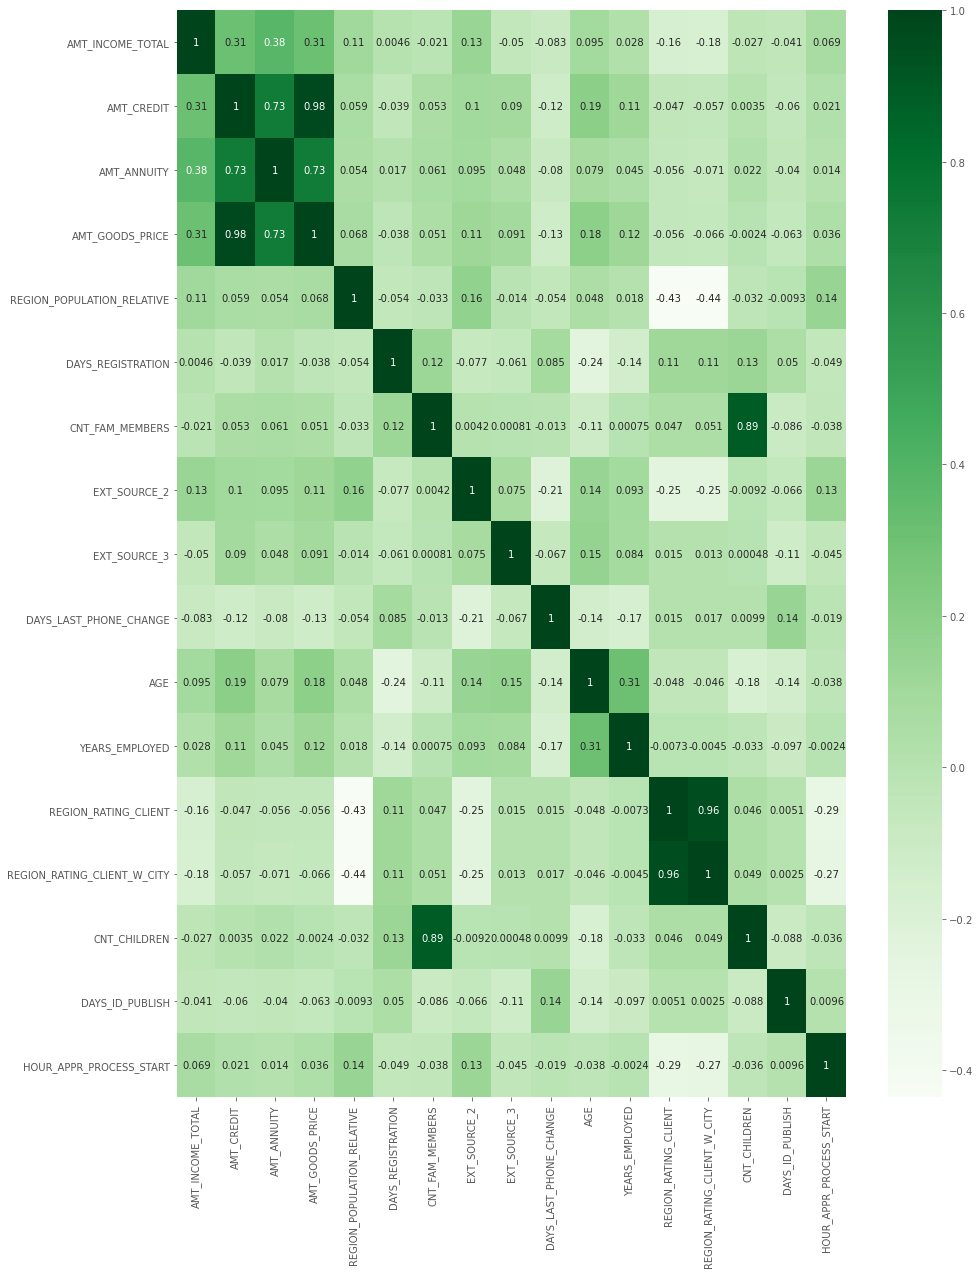

In [121]:
plt.figure(figsize=(15,20))
sns.heatmap(Corr_For_Defaulter,cmap="Greens", annot=True)
plt.show()

### Repeating same stpes for Non-Defaulters as well 
  #### Correlation for Non-Defaulters 
   ##### 1. Data frame for Non-Defaulters 
   ##### 2. Get Top 10 correaltion for Non-Defaulteres 
   ##### 3. Get Top 10 -negative  correlation for Non-Defaulters 
   ##### 4. Heat Map for Non-Defaulters 

In [122]:
Corr_For_Non_Defaulter=Non_Defaulter.corr()

In [123]:
round(Corr_For_Non_Defaulter,3)

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                     1.000000    0.317000     0.399000   
AMT_CREDIT                           0.317000    1.000000     0.748000   
AMT_ANNUITY                          0.399000    0.748000     1.000000   
AMT_GOODS_PRICE                      0.322000    0.981000     0.748000   
REGION_POPULATION_RELATIVE           0.173000    0.059000     0.079000   
DAYS_REGISTRATION                    0.037000   -0.025000     0.007000   
CNT_FAM_MEMBERS                     -0.013000    0.036000     0.043000   
EXT_SOURCE_2                         0.151000    0.102000     0.094000   
EXT_SOURCE_3                        -0.078000    0.037000     0.022000   
DAYS_LAST_PHONE_CHANGE              -0.052000   -0.080000    -0.067000   
AGE                                  0.045000    0.154000     0.081000   
YEARS_EMPLOYED                       0.031000    0.082000     0.040000   
REGION_RATING_CLIENT                -0.204000   -0.061000    -0.093000   
REGION_RATING_CLIENT_W_CITY         -0.223000   -0.067000    -0.105000   
CNT_CHILDREN                        -0.017000   -0.016000    -0.003000   
DAYS_ID_PUBLISH                     -0.030000   -0.029000    -0.019000   
HOUR_APPR_PROCESS_START              0.059000    0.025000     0.017000   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
AMT_INCOME_TOTAL                    0.322000                    0.173000   
AMT_CREDIT                          0.981000                    0.059000   
AMT_ANNUITY                         0.748000                    0.079000   
AMT_GOODS_PRICE                     1.000000                    0.063000   
REGION_POPULATION_RELATIVE          0.063000                    1.000000   
DAYS_REGISTRATION                  -0.022000                   -0.058000   
CNT_FAM_MEMBERS                     0.034000                   -0.030000   
EXT_SOURCE_2                        0.110000                    0.194000   
EXT_SOURCE_3                        0.039000                   -0.013000   
DAYS_LAST_PHONE_CHANGE             -0.084000                   -0.045000   
AGE                                 0.150000                    0.038000   
YEARS_EMPLOYED                      0.084000                   -0.009000   
REGION_RATING_CLIENT               -0.062000                   -0.520000   
REGION_RATING_CLIENT_W_CITY        -0.067000                   -0.519000   
CNT_CHILDREN                       -0.020000                   -0.030000   
DAYS_ID_PUBLISH                    -0.031000                   -0.003000   
HOUR_APPR_PROCESS_START             0.036000                    0.163000   

                             DAYS_REGISTRATION  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
AMT_INCOME_TOTAL                      0.037000        -0.013000      0.151000   
AMT_CREDIT                           -0.025000         0.036000      0.102000   
AMT_ANNUITY                           0.007000         0.043000      0.094000   
AMT_GOODS_PRICE                      -0.022000         0.034000      0.110000   
REGION_POPULATION_RELATIVE           -0.058000        -0.030000      0.194000   
DAYS_REGISTRATION                     1.000000         0.158000     -0.072000   
CNT_FAM_MEMBERS                       0.158000         1.000000     -0.011000   
EXT_SOURCE_2                         -0.072000        -0.011000      1.000000   
EXT_SOURCE_3                         -0.089000         0.001000      0.095000   
DAYS_LAST_PHONE_CHANGE                0.071000        -0.025000     -0.197000   
AGE                                  -0.302000        -0.176000      0.140000   
YEARS_EMPLOYED                       -0.174000        -0.032000      0.080000   
REGION_RATING_CLIENT                  0.096000         0.043000     -0.284000   
REGION_RATING_CLIENT_W_CITY           0.089000         0.044000     -0.279000   
CNT_CHILDREN                          0.165000         0.892000     -0.025000   
DAYS_ID_PUBLISH                

### Top 10 most positve correations for Non-Defaulters 

In [124]:
Corr_For_Non_Defaulter.unstack().sort_values(ascending=False).drop_duplicates().head(10)

HOUR_APPR_PROCESS_START      HOUR_APPR_PROCESS_START   1.000000
AMT_GOODS_PRICE              AMT_CREDIT                0.981295
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT      0.950040
CNT_CHILDREN                 CNT_FAM_MEMBERS           0.892382
AMT_CREDIT                   AMT_ANNUITY               0.748188
AMT_GOODS_PRICE              AMT_ANNUITY               0.747675
AMT_ANNUITY                  AMT_INCOME_TOTAL          0.398758
YEARS_EMPLOYED               AGE                       0.353266
AMT_GOODS_PRICE              AMT_INCOME_TOTAL          0.322008
AMT_INCOME_TOTAL             AMT_CREDIT                0.317269
dtype: float64

### Top 10 most Negative correations for Non-Defaulters 

In [125]:
Corr_For_Non_Defaulter.unstack().sort_values(ascending=False).drop_duplicates().tail(10)

AMT_INCOME_TOTAL             REGION_RATING_CLIENT          -0.204120
REGION_RATING_CLIENT_W_CITY  AMT_INCOME_TOTAL              -0.223490
AGE                          CNT_CHILDREN                  -0.239504
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY   -0.253230
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START       -0.274244
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY   -0.279049
                             REGION_RATING_CLIENT          -0.284411
AGE                          DAYS_REGISTRATION             -0.301832
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.518915
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.520460
dtype: float64

## Heat Map for Non-Defaulters 

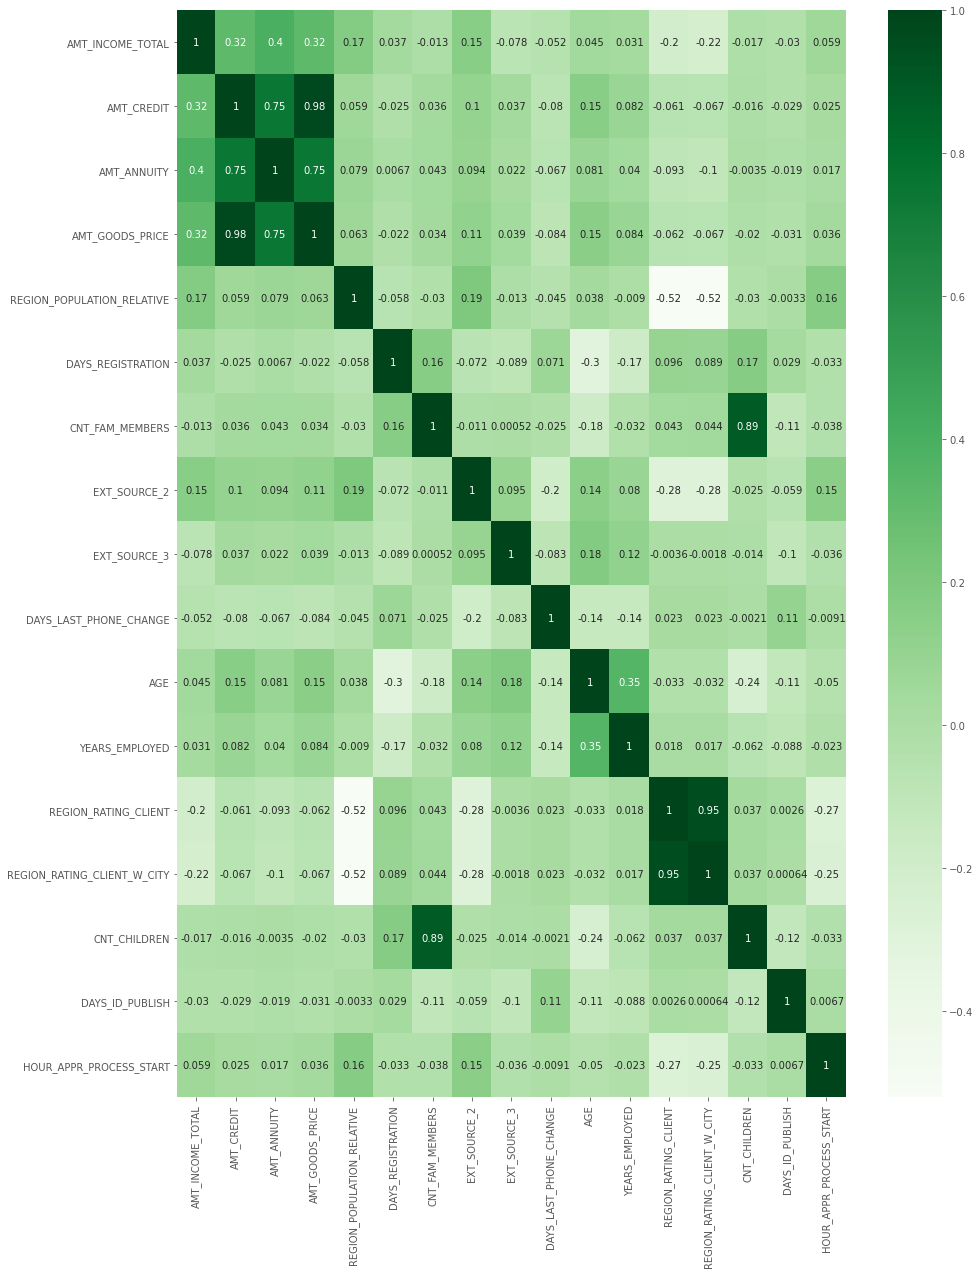

In [126]:
plt.figure(figsize=(15,20))
sns.heatmap(Corr_For_Non_Defaulter,cmap="Greens", annot=True)
plt.show()

## Analyzing history data/Previous Applications Data Set 

In [127]:
prev_application_data=pd.read_csv("previous_application.csv")

### Checking the structure of Previous Application Data 

In [128]:
prev_application_data.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans  1730.430000     17145.000000   
1     2802425      108129         Cash loans 25188.615000    607500.000000   
2     2523466      122040         Cash loans 15060.735000    112500.000000   
3     2819243      176158         Cash loans 47041.335000    450000.000000   
4     1784265      202054         Cash loans 31924.395000    337500.000000   

     AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.000000          0.000000     17145.000000                   SATURDAY   
1 679671.000000               nan    607500.000000                   THURSDAY   
2 136444.500000               nan    112500.000000                    TUESDAY   
3 470790.000000               nan    450000.000000                     MONDAY   
4 404055.000000               nan    337500.000000                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity    12.000000   
1                       11  ...                  XNA    36.000000   
2                       11  ...                  XNA    12.000000   
3                        7  ...                  XNA    12.000000   
4                        9  ...                  XNA    24.000000   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest       365243.000000   
1        low_action          Cash X-Sell: low       365243.000000   
2              high         Cash X-Sell: high       365243.000000   
3            middle       Cash X-Sell: middle       365243.000000   
4              high         Cash Street: high                 nan   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0     -42.000000                300.000000     -42.000000       -37.000000   
1    -134.000000                916.000000  365243.000000    365243.000000   
2    -271.000000                 59.000000  365243.000000    365243.000000   
3    -482.000000               -152.000000    -182.000000      -177.000000   
4            nan                       nan            nan              nan   

  NFLAG_INSURED_ON_APPROVAL  
0                  0.000000  
1                  1.000000  
2                  1.000000  
3                  1.000000  
4                       nan  

[5 rows x 37 columns]

In [129]:
prev_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### From above info command , We can see there are 37 columns , in which float64 is 15 and integer type is of 6 and object type count is 16.

In [130]:
prev_application_data.shape

(1670214, 37)

### Quality Check for Records in Previous Application Data Files 

#### check for missing values Percentage 

In [131]:
Percent_Missing_Pre = prev_application_data.isnull().sum() * 100 / len(prev_application_data)


#### creating new df-missing_value_pre which contains missing values percentage along with column name 

In [132]:
missing_value_pre = pd.DataFrame({'column_name': prev_application_data.columns,
                                 'percent_missing': Percent_Missing_Pre})


In [133]:
missing_value_pre[missing_value_pre.percent_missing>35].sort_values(by='percent_missing', ascending=False)


column_name  percent_missing
RATE_INTEREST_PRIMARY          RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED    RATE_INTEREST_PRIVILEGED        99.643698
AMT_DOWN_PAYMENT                    AMT_DOWN_PAYMENT        53.636480
RATE_DOWN_PAYMENT                  RATE_DOWN_PAYMENT        53.636480
NAME_TYPE_SUITE                      NAME_TYPE_SUITE        49.119754
DAYS_FIRST_DRAWING                DAYS_FIRST_DRAWING        40.298129
DAYS_FIRST_DUE                        DAYS_FIRST_DUE        40.298129
DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE_1ST_VERSION        40.298129
DAYS_LAST_DUE                          DAYS_LAST_DUE        40.298129
DAYS_TERMINATION                    DAYS_TERMINATION        40.298129
NFLAG_INSURED_ON_APPROVAL  NFLAG_INSURED_ON_APPROVAL        40.298129

### Dropping all columns from data frame -prev_application_data which has more than 54 percent of missing values in it  .
   #### 1. Want to include column AMT_down_payment because I believe it shown client backing to pay one time .
   ####  2. Also null values means no down payment was made which could be valid case if application is "Cancelled".



In [134]:
prev_application_data.drop(columns=missing_value_pre[missing_value_pre.percent_missing>54]['column_name'],inplace=True)

In [135]:
prev_application_data.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               895844
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              895844
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT 

In [136]:
prev_application_data.shape

(1670214, 35)

In [137]:
prev_application_data.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans  1730.430000     17145.000000   
1     2802425      108129         Cash loans 25188.615000    607500.000000   
2     2523466      122040         Cash loans 15060.735000    112500.000000   
3     2819243      176158         Cash loans 47041.335000    450000.000000   
4     1784265      202054         Cash loans 31924.395000    337500.000000   

     AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.000000          0.000000     17145.000000                   SATURDAY   
1 679671.000000               nan    607500.000000                   THURSDAY   
2 136444.500000               nan    112500.000000                    TUESDAY   
3 470790.000000               nan    450000.000000                     MONDAY   
4 404055.000000               nan    337500.000000                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity    12.000000   
1                       11  ...                  XNA    36.000000   
2                       11  ...                  XNA    12.000000   
3                        7  ...                  XNA    12.000000   
4                        9  ...                  XNA    24.000000   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest      365243.000000   
1        low_action          Cash X-Sell: low      365243.000000   
2              high         Cash X-Sell: high      365243.000000   
3            middle       Cash X-Sell: middle      365243.000000   
4              high         Cash Street: high                nan   

   DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0      -42.000000                300.000000    -42.000000       -37.000000   
1     -134.000000                916.000000 365243.000000    365243.000000   
2     -271.000000                 59.000000 365243.000000    365243.000000   
3     -482.000000               -152.000000   -182.000000      -177.000000   
4             nan                       nan           nan              nan   

  NFLAG_INSURED_ON_APPROVAL  
0                  0.000000  
1                  1.000000  
2                  1.000000  
3                  1.000000  
4                       nan  

[5 rows x 35 columns]

In [138]:
prev_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### now checking for missing values range between 0 to 15 percent 

In [139]:
missing_value_pre[(missing_value_pre.percent_missing>0) & (missing_value_pre.percent_missing<15)]

column_name  percent_missing
AMT_CREDIT                    AMT_CREDIT         0.000060
PRODUCT_COMBINATION  PRODUCT_COMBINATION         0.020716

#### very less number/Percentage no need to impute anything 

In [140]:
prev_application_data.isnull().sum()/len(prev_application_data)

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
AMT_ANNUITY                   0.222867
AMT_APPLICATION               0.000000
AMT_CREDIT                    0.000001
AMT_DOWN_PAYMENT              0.536365
AMT_GOODS_PRICE               0.230818
WEEKDAY_APPR_PROCESS_START    0.000000
HOUR_APPR_PROCESS_START       0.000000
FLAG_LAST_APPL_PER_CONTRACT   0.000000
NFLAG_LAST_APPL_IN_DAY        0.000000
RATE_DOWN_PAYMENT             0.536365
NAME_CASH_LOAN_PURPOSE        0.000000
NAME_CONTRACT_STATUS          0.000000
DAYS_DECISION                 0.000000
NAME_PAYMENT_TYPE             0.000000
CODE_REJECT_REASON            0.000000
NAME_TYPE_SUITE               0.491198
NAME_CLIENT_TYPE              0.000000
NAME_GOODS_CATEGORY           0.000000
NAME_PORTFOLIO                0.000000
NAME_PRODUCT_TYPE             0.000000
CHANNEL_TYPE                  0.000000
SELLERPLACE_AREA              0.000000
NAME_SELLER_INDUSTRY     

#### Looking for values counts in each column as we saw in application data there are many columns having 2 values and converted to 'Y' and 'N' from 1 to 0

In [141]:
prev_application_data.select_dtypes('int64').nunique().sort_values(ascending=True)

NFLAG_LAST_APPL_IN_DAY           2
HOUR_APPR_PROCESS_START         24
SELLERPLACE_AREA              2097
DAYS_DECISION                 2922
SK_ID_CURR                  338857
SK_ID_PREV                 1670214
dtype: int64

In [142]:
prev_application_data.select_dtypes('float64').nunique().sort_values(ascending=True)

NFLAG_INSURED_ON_APPROVAL         2
CNT_PAYMENT                      49
DAYS_TERMINATION               2830
DAYS_FIRST_DRAWING             2838
DAYS_LAST_DUE                  2873
DAYS_FIRST_DUE                 2892
DAYS_LAST_DUE_1ST_VERSION      4605
AMT_DOWN_PAYMENT              29278
AMT_CREDIT                    86803
AMT_APPLICATION               93885
AMT_GOODS_PRICE               93885
RATE_DOWN_PAYMENT            207033
AMT_ANNUITY                  357959
dtype: int64

#### Here there is only one column "NFLAG_LAST_APPL_IN_DAY" having two unique values and type int , replacing 1 with 'Y' and 0 with 'N'

In [143]:
convert_to_Y_N(prev_application_data)

### See below column NFLAG_LAST_APPL_IN_DAY changed to object data type and values are change to 'Y' and 'N'

In [144]:
prev_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  object 
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [145]:
prev_application_data.NFLAG_LAST_APPL_IN_DAY.value_counts()

Y    1664314
N       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [146]:
prev_application_data['NFLAG_INSURED_ON_APPROVAL']=prev_application_data.NFLAG_INSURED_ON_APPROVAL.replace((1,0), ('Y','N'))

In [147]:
prev_application_data.NFLAG_INSURED_ON_APPROVAL.value_counts()

N    665527
Y    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [148]:
prev_application_data.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Analysis for column NAME_CONTRACT_STATUS

### By Percentage 

In [149]:
df_application=pd.DataFrame(prev_application_data.NAME_CONTRACT_STATUS.value_counts(normalize=True).sort_values(ascending=False)*100)
df_application=df_application.unstack().round(2)

In [150]:
df_application

NAME_CONTRACT_STATUS  Approved       62.070000
                      Canceled       18.940000
                      Refused        17.400000
                      Unused offer    1.580000
dtype: float64

###  Count of Applications via countplot 

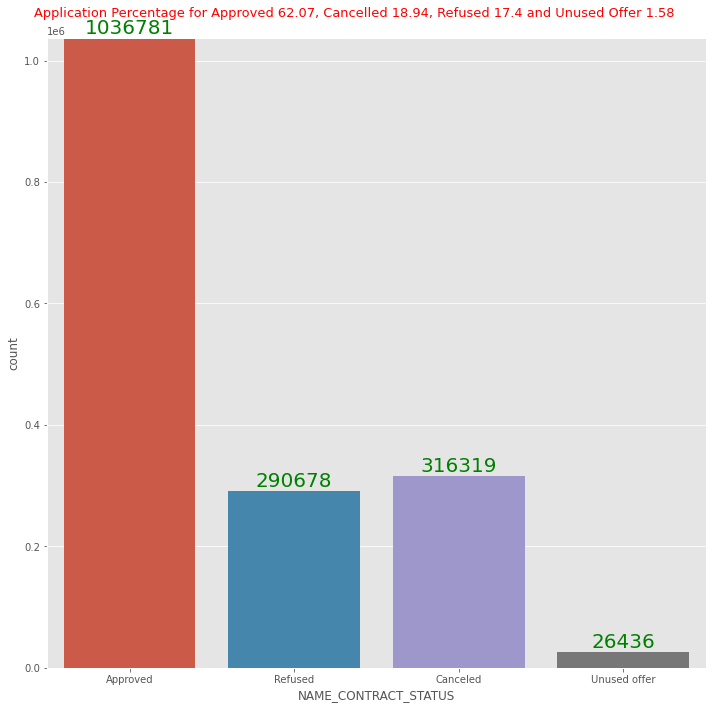

In [151]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])
ax=sns.countplot(x=prev_application_data.NAME_CONTRACT_STATUS, data=prev_application_data)
y_max = prev_application_data['NAME_CONTRACT_STATUS'].value_counts().max()
ax.set_ylim([0, round(y_max)])
plt.suptitle("Application Percentage for Approved {}, Cancelled {}, Refused {} and Unused Offer {} ".format(df_application['NAME_CONTRACT_STATUS']['Approved'], df_application['NAME_CONTRACT_STATUS']['Canceled'],df_application['NAME_CONTRACT_STATUS']['Refused'], df_application['NAME_CONTRACT_STATUS']['Unused offer']), fontsize=13,color='red')
plt.tight_layout()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=20, color='green', ha='center', va='bottom')
plt.show()


### 62 Pecent applications were approved , 18 percent cancelled and around 17 percent were rejected . Most of previous applications are getting approved .

### Analysis for column WEEKDAY_APPR_PROCESS_START

<AxesSubplot:xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='count'>

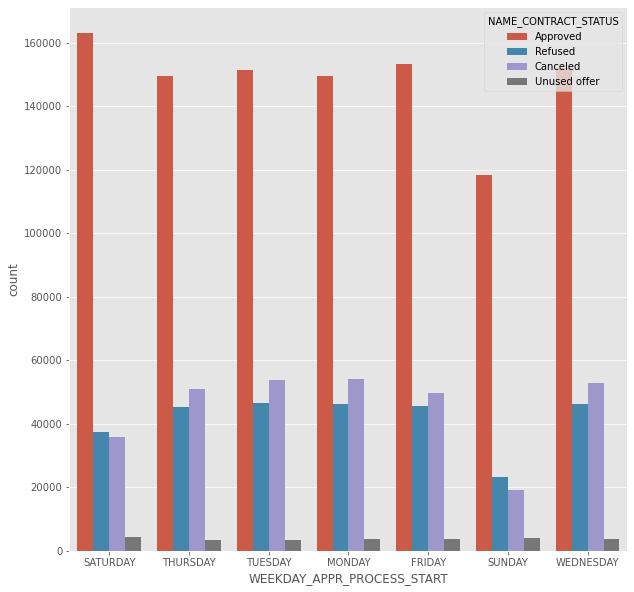

In [152]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])

sns.countplot(x=prev_application_data.WEEKDAY_APPR_PROCESS_START, hue='NAME_CONTRACT_STATUS',data=prev_application_data)

In [153]:
prev_application_data.NAME_CASH_LOAN_PURPOSE.value_counts().sort_values(ascending=False)

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

<AxesSubplot:xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

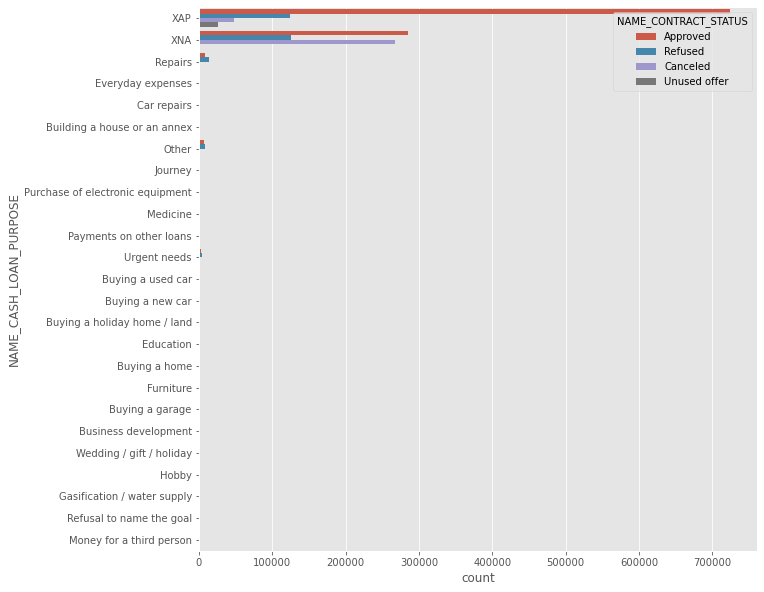

In [154]:
plt.figure(figsize=[10,10])

sns.countplot(y='NAME_CASH_LOAN_PURPOSE' , data=prev_application_data, hue='NAME_CONTRACT_STATUS')

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

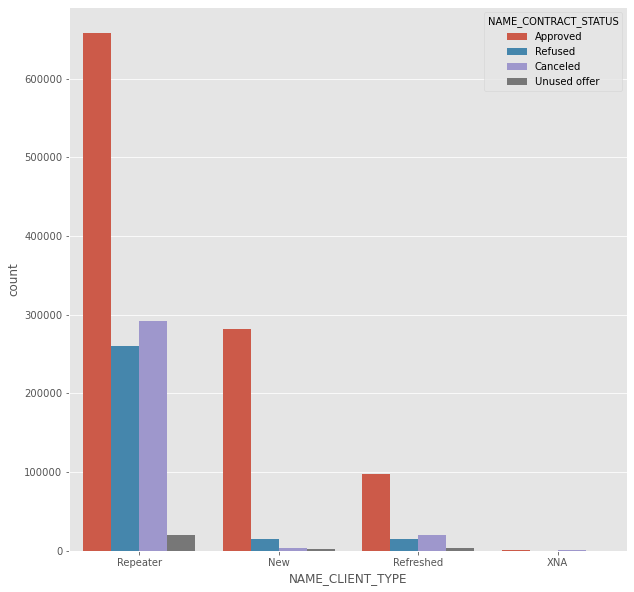

In [155]:
plt.figure(figsize=[10,10])

sns.countplot(x='NAME_CLIENT_TYPE' , data=prev_application_data, hue='NAME_CONTRACT_STATUS')

### Analysis for column NAME_GOODS_CATEGORY

In [156]:
by_goods=pd.DataFrame(prev_application_data.groupby(by=['NAME_CONTRACT_STATUS','NAME_GOODS_CATEGORY'])['AMT_CREDIT'].agg(['count', 'mean']).sort_values(by=['count','mean'],ascending=False))

In [157]:
by_goods.reset_index(inplace=True)

In [158]:
by_goods[by_goods.NAME_CONTRACT_STATUS=='Refused'].head(5)

NAME_CONTRACT_STATUS   NAME_GOODS_CATEGORY   count          mean
2               Refused                   XNA  223788 447464.268105
11              Refused                Mobile   20473  53199.087490
13              Refused             Computers   13534 117870.776520
14              Refused  Consumer Electronics    9100 111998.036819
15              Refused           Audio/Video    9080 129350.105812

In [159]:
by_goods[by_goods.NAME_CONTRACT_STATUS=='Approved'].head(5)

NAME_CONTRACT_STATUS   NAME_GOODS_CATEGORY   count          mean
0             Approved                   XNA  410409 375542.711455
3             Approved                Mobile  186174  44184.933640
4             Approved  Consumer Electronics  111525  88494.762669
5             Approved           Audio/Video   89394 101411.330460
6             Approved             Computers   88050 104607.511476

#### Top 5 goods category for which loan were refused are XNA,Mobile ,Computers , Consumer Electronics. Audio/Video
#### Top 5 goods category for which loan were approved are XNA,Mobile ,Computers , Consumer Electronics. Audio/Video

### No Major deffirce found on the basis of NAME_GOODS_CATEGORY , top5 product for which load were refused/acceptrd are same .

<AxesSubplot:xlabel='NAME_PORTFOLIO', ylabel='count'>

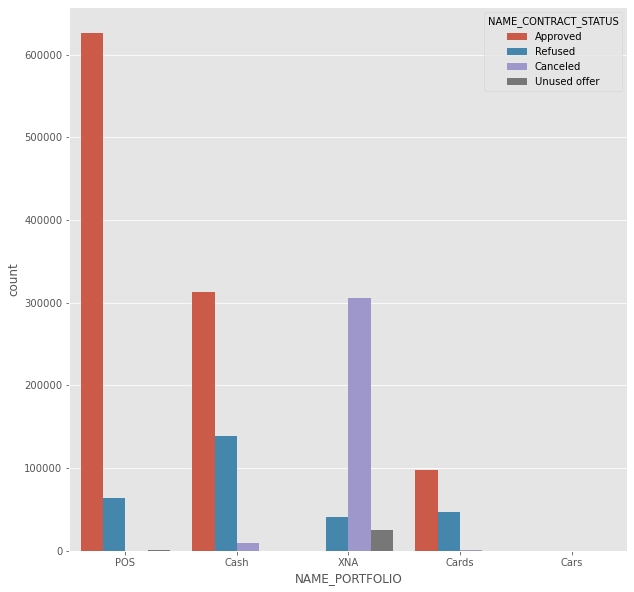

In [160]:
plt.figure(figsize=[10,10])

sns.countplot(x='NAME_PORTFOLIO', data=prev_application_data, hue='NAME_CONTRACT_STATUS')

#### Most approved Portfolo is POS followed by Cash 
#### Most refused Portfolio is Cash 



### Analysis for PRODUCT_COMBINATION

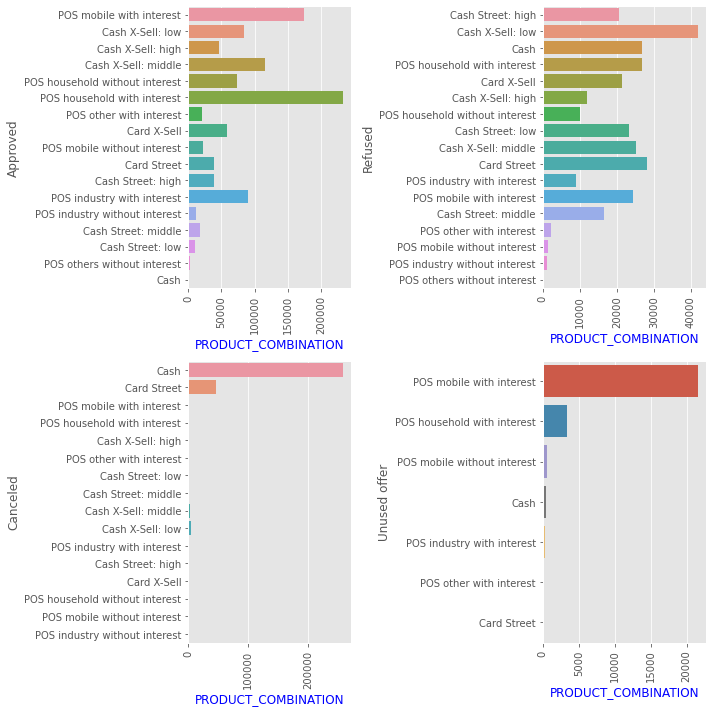

In [161]:
plt.figure(figsize=[10,10])
for i,j in enumerate(prev_application_data.NAME_CONTRACT_STATUS.unique()): 
    plt.subplot(2,2,i+1)       
        
    sns.countplot(y=prev_application_data[prev_application_data['NAME_CONTRACT_STATUS']==j]['PRODUCT_COMBINATION'])
    plt.xlabel('PRODUCT_COMBINATION',color='blue', fontsize=12) 
    plt.ylabel( j  )
    plt.xticks(rotation=90)
    plt.tight_layout()
    


#### for Product Combination most approved combination is POS household with Interest followed by POS mobile with interest 
#### Most number for refused loans were Cash x-Sell: Low followed by Card Street , Cash..
#### Most cancelled Product Combination is Cash follwed by Card Street .

### Analysis for CHANNEL_TYPE


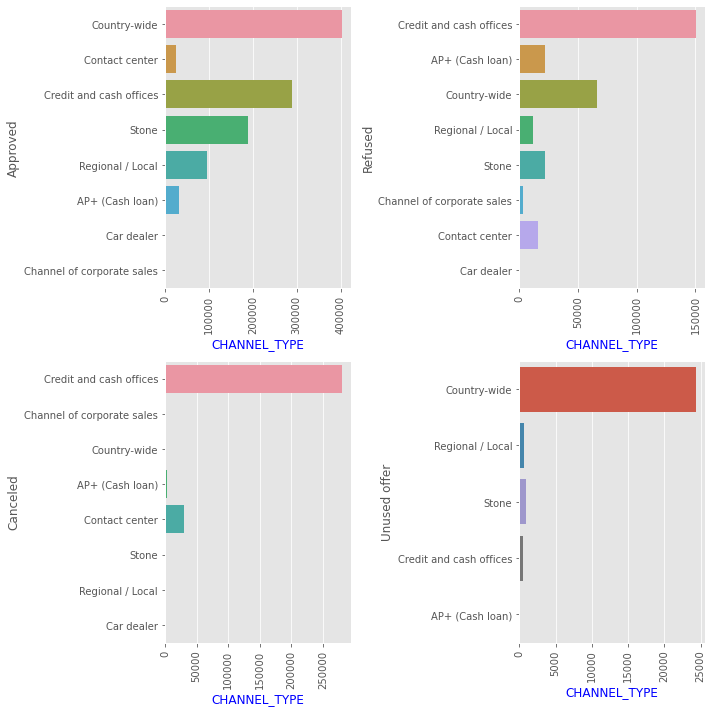

In [162]:
plt.figure(figsize=[10,10])
for i,j in enumerate(prev_application_data.NAME_CONTRACT_STATUS.unique()): 
    plt.subplot(2,2,i+1)       
        
    sns.countplot(y=prev_application_data[prev_application_data['NAME_CONTRACT_STATUS']==j]['CHANNEL_TYPE'])
    plt.xlabel('CHANNEL_TYPE',color='blue', fontsize=12) 
    plt.ylabel( j  )
    plt.xticks(rotation=90)
    plt.tight_layout()



### Most Approved Loans were from Country-wide followed by Credit and Cash offices 
### Most refused Loans were from Credit and cash Offices follwed by Country wide .
### Source/Channel Type -cash Offices and Country wide are in top most at both approval/rejection , makes most top -2 source overall all apprications are coming .


## Analysis of Numerical/Float Columns 

### Select float and Numerical columns and then remove outliers 

In [163]:
prev_application_data.select_dtypes("float64").columns

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype='object')

In [164]:
prev_application_data.select_dtypes("int64").columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'HOUR_APPR_PROCESS_START', 'DAYS_DECISION',
       'SELLERPLACE_AREA'],
      dtype='object')

### Checking Outliers 

### Analysis for Column AMT_ANNUITY

In [165]:
prev_application_data.AMT_ANNUITY.describe()

count   1297979.000000
mean      15955.120659
std       14782.137335
min           0.000000
25%        6321.780000
50%       11250.000000
75%       20658.420000
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

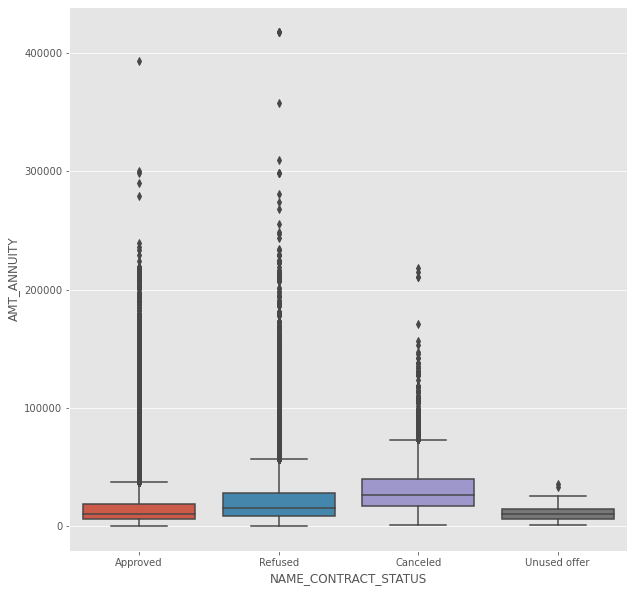

In [166]:
plt.figure(figsize=[10,10])
sns.boxplot(y=prev_application_data.AMT_ANNUITY, x=prev_application_data.NAME_CONTRACT_STATUS)
plt.show()


#### Remove Outliers for Column AMT_ANNUITY

In [167]:
# Code for Removing outliers 
Col='AMT_ANNUITY'


Q1 = prev_application_data[Col].quantile(0.25)
Q3 = prev_application_data[Col].quantile(0.75)
IQR = Q3 - Q1
prev_application_data= prev_application_data[~((prev_application_data[Col] < (Q1 - 1.5 * IQR)) | (prev_application_data[Col] > (Q3 + 1.5 * IQR)))]

In [168]:
prev_application_data.AMT_ANNUITY.describe()

count   1215217.000000
mean      13129.591905
std        9240.516070
min           0.000000
25%        6024.600000
50%       10529.280000
75%       17901.540000
max       42160.995000
Name: AMT_ANNUITY, dtype: float64

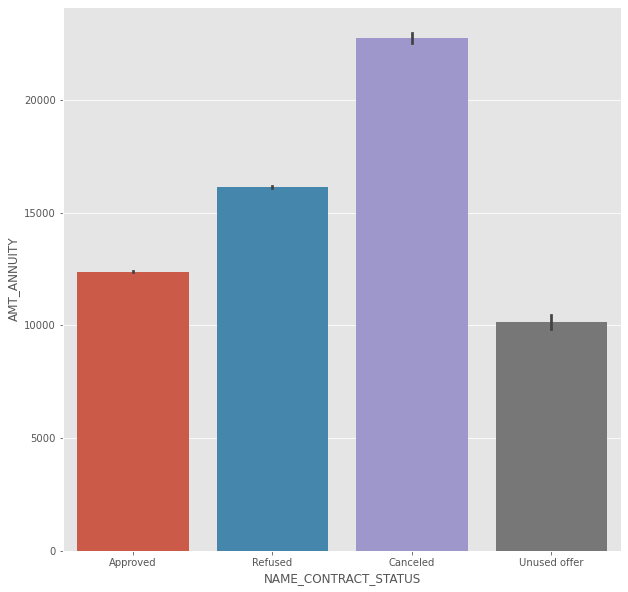

In [169]:
plt.figure(figsize=[10,10])
sns.barplot(y=prev_application_data.AMT_ANNUITY, x=prev_application_data.NAME_CONTRACT_STATUS)
plt.show()


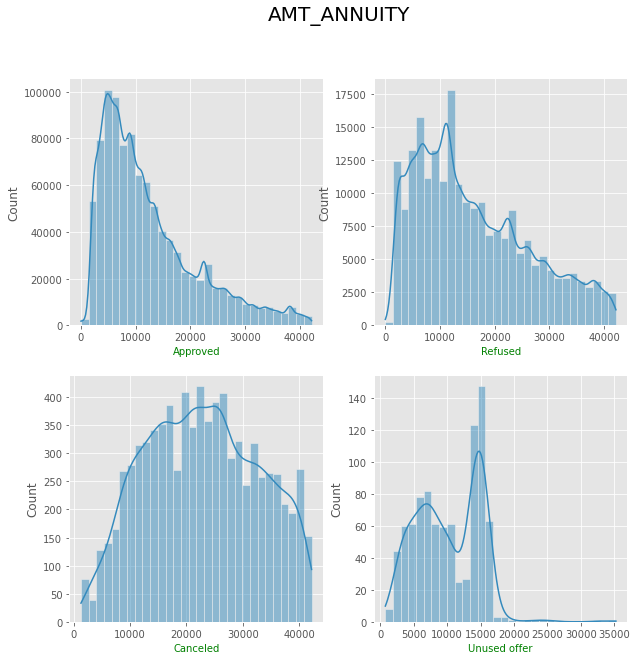

In [170]:
plt.figure(figsize=[10,10])
for i,j in enumerate(prev_application_data.NAME_CONTRACT_STATUS.unique()): 
    plt.subplot(2,2,i+1)          
    sns.histplot(x=prev_application_data[prev_application_data['NAME_CONTRACT_STATUS']==j]['AMT_ANNUITY'], kde=True, bins=30)
    plt.xlabel(j,color='green', fontsize=10) 
    plt.suptitle("AMT_ANNUITY", fontsize=20)


### Analysis for AMT_APPLICATION

In [171]:
prev_application_data.AMT_APPLICATION.describe()

count   1587452.000000
mean     132252.113082
std      195474.578438
min           0.000000
25%       15267.375000
50%       66420.000000
75%      157500.000000
max     6905160.000000
Name: AMT_APPLICATION, dtype: float64

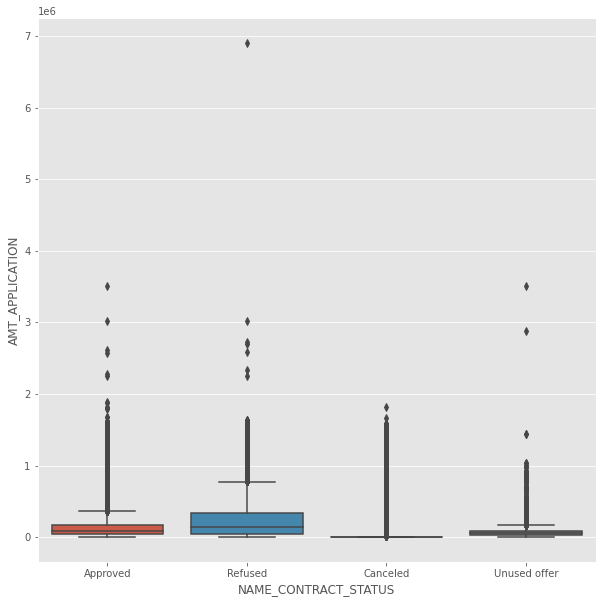

In [172]:

plt.figure(figsize=[10,10])
sns.boxplot(y=prev_application_data.AMT_APPLICATION, x=prev_application_data.NAME_CONTRACT_STATUS)
plt.show()


In [173]:
Col='AMT_APPLICATION'


Q1 = prev_application_data[Col].quantile(0.25)
Q3 = prev_application_data[Col].quantile(0.75)
IQR = Q3 - Q1
prev_application_data= prev_application_data[~((prev_application_data[Col] < (Q1 - 1.5 * IQR)) | (prev_application_data[Col] > (Q3 + 1.5 * IQR)))]

In [174]:
prev_application_data.AMT_APPLICATION.describe()

count   1440404.000000
mean      80774.980801
std       85786.163320
min           0.000000
25%           0.000000
50%       53550.000000
75%      125352.000000
max      370845.000000
Name: AMT_APPLICATION, dtype: float64

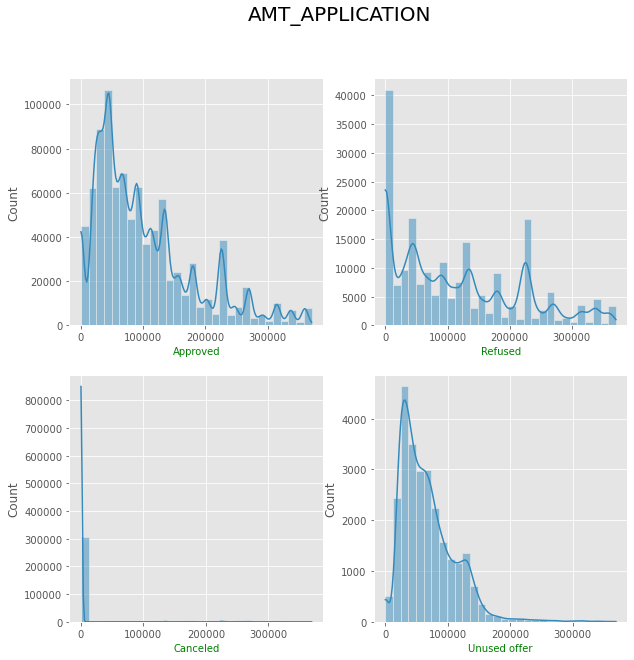

In [175]:
plt.figure(figsize=[10,10])
for i,j in enumerate(prev_application_data.NAME_CONTRACT_STATUS.unique()): 
    plt.subplot(2,2,i+1)          
    sns.histplot(x=prev_application_data[prev_application_data['NAME_CONTRACT_STATUS']==j]['AMT_APPLICATION'], kde=True, bins=30)
    plt.xlabel(j,color='green', fontsize=10) 
    plt.suptitle("AMT_APPLICATION", fontsize=20)


### Analysis for Column -AMT_CREDIT

In [176]:
prev_application_data.AMT_CREDIT.describe()

count   1440403.000000
mean      93911.993250
std      104302.476587
min           0.000000
25%       17131.500000
50%       60075.000000
75%      135229.500000
max      900000.000000
Name: AMT_CREDIT, dtype: float64

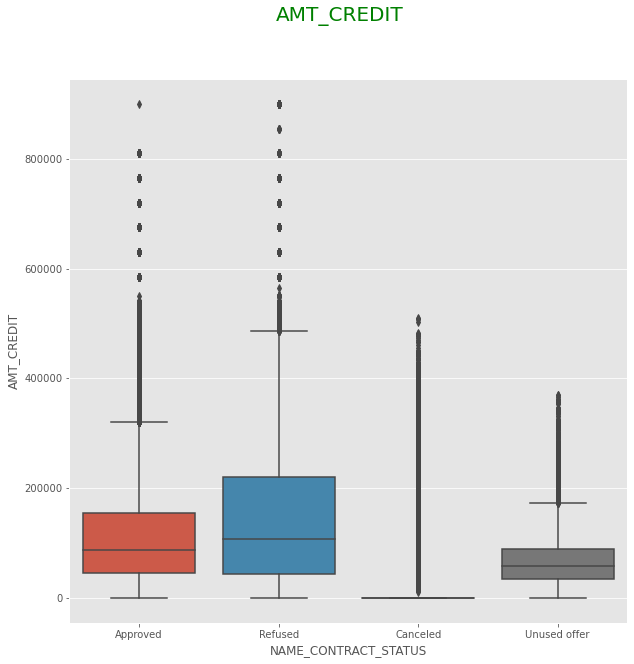

In [177]:
plt.figure(figsize=[10,10])
sns.boxplot(y=prev_application_data.AMT_CREDIT, x=prev_application_data.NAME_CONTRACT_STATUS)
plt.suptitle("AMT_CREDIT", fontsize=20, color='green')
plt.show()


#### Remove outliers 

In [178]:
Col='AMT_CREDIT'


Q1 = prev_application_data[Col].quantile(0.25)
Q3 = prev_application_data[Col].quantile(0.75)
IQR = Q3 - Q1
prev_application_data= prev_application_data[~((prev_application_data[Col] < (Q1 - 1.5 * IQR)) | (prev_application_data[Col] > (Q3 + 1.5 * IQR)))]
prev_application_data.AMT_CREDIT.describe()

count   1370235.000000
mean      78460.953789
std       78021.871248
min           0.000000
25%       14377.500000
50%       54256.500000
75%      123480.000000
max      312376.500000
Name: AMT_CREDIT, dtype: float64

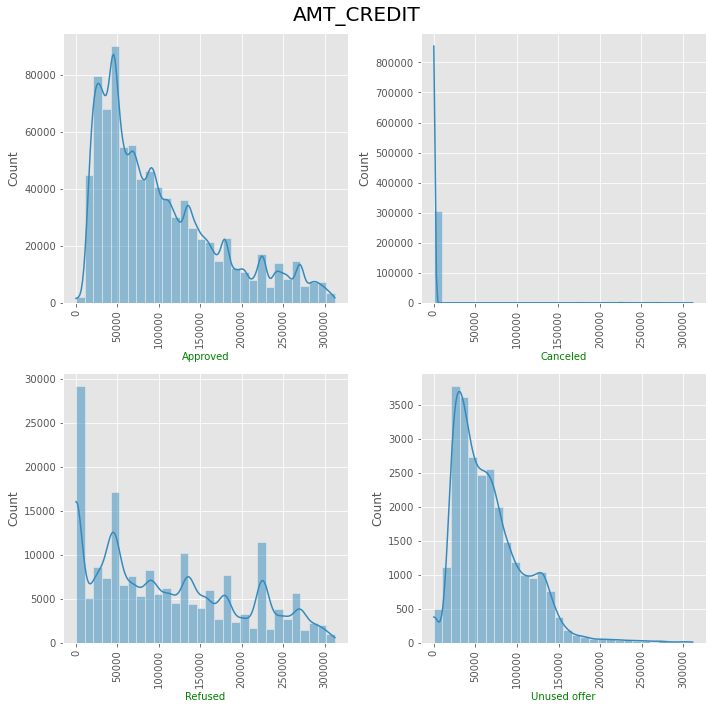

In [179]:
plt.figure(figsize=[10,10])
for i,j in enumerate(prev_application_data.NAME_CONTRACT_STATUS.unique()): 
    plt.subplot(2,2,i+1)          
    sns.histplot(x=prev_application_data[prev_application_data['NAME_CONTRACT_STATUS']==j]['AMT_CREDIT'], kde=True, bins=30)
    plt.xlabel(j,color='green', fontsize=10) 
    plt.xticks(rotation=90)
    plt.suptitle("AMT_CREDIT", fontsize=20)
    plt.tight_layout()


### Analysis for Column AMT_GOODS_PRICE

In [180]:
prev_application_data.AMT_GOODS_PRICE.describe()

count   1001904.000000
mean      98966.801914
std       68121.158759
min           0.000000
25%       45000.000000
50%       81657.000000
75%      135000.000000
max      900000.000000
Name: AMT_GOODS_PRICE, dtype: float64

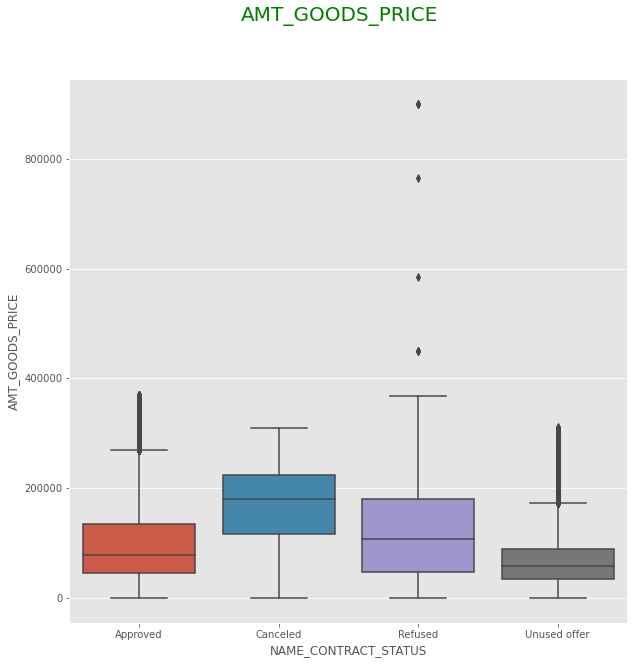

In [181]:
plt.figure(figsize=[10,10])
sns.boxplot(y=prev_application_data.AMT_GOODS_PRICE, x=prev_application_data.NAME_CONTRACT_STATUS)
plt.suptitle("AMT_GOODS_PRICE", fontsize=20, color='green')
plt.show()


#### Removing Outliers 

In [182]:
Col='AMT_GOODS_PRICE'


Q1 = prev_application_data[Col].quantile(0.25)
Q3 = prev_application_data[Col].quantile(0.75)
IQR = Q3 - Q1
prev_application_data= prev_application_data[~((prev_application_data[Col] < (Q1 - 1.5 * IQR)) | (prev_application_data[Col] > (Q3 + 1.5 * IQR)))]
prev_application_data.AMT_CREDIT.describe()

count   1360482.000000
mean      77030.617438
std       76384.656695
min           0.000000
25%       13945.500000
50%       53635.500000
75%      121050.000000
max      312376.500000
Name: AMT_CREDIT, dtype: float64

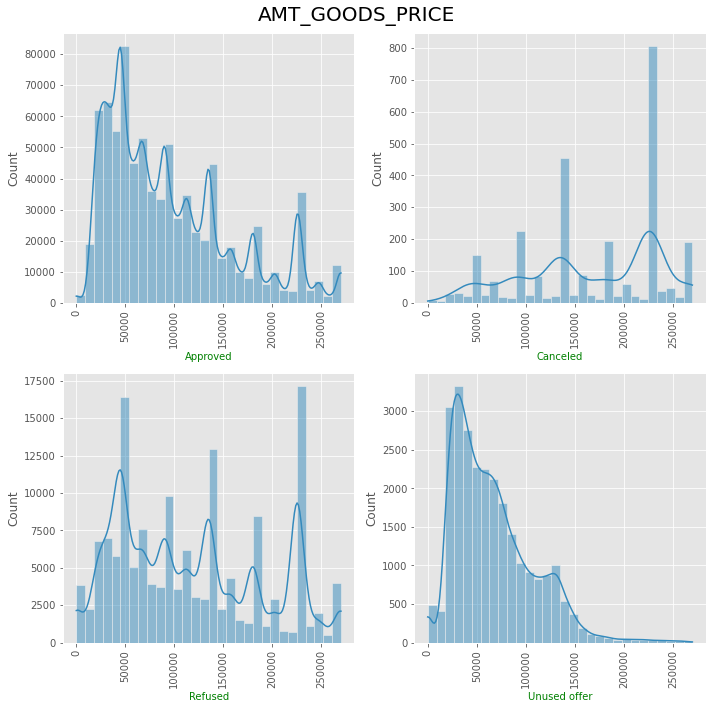

In [183]:
plt.figure(figsize=[10,10])
for i,j in enumerate(prev_application_data.NAME_CONTRACT_STATUS.unique()): 
    plt.subplot(2,2,i+1)          
    sns.histplot(x=prev_application_data[prev_application_data['NAME_CONTRACT_STATUS']==j]['AMT_GOODS_PRICE'], kde=True, bins=30)
    plt.xlabel(j,color='green', fontsize=10) 
    plt.xticks(rotation=90)
    plt.suptitle("AMT_GOODS_PRICE", fontsize=20)
    plt.tight_layout()


### Analysis for field DAYS_DECISION

In [184]:
prev_application_data['WEEK_DECISION']=round(prev_application_data.DAYS_DECISION/-7,0)

In [185]:
prev_application_data.WEEK_DECISION.describe()

count   1360483.000000
mean        134.596790
std         117.946298
min           0.000000
25%          40.000000
50%          87.000000
75%         214.000000
max         417.000000
Name: WEEK_DECISION, dtype: float64

### Remove outliers

In [186]:
Col='WEEK_DECISION'


Q1 = prev_application_data[Col].quantile(0.25)
Q3 = prev_application_data[Col].quantile(0.75)
IQR = Q3 - Q1
prev_application_data= prev_application_data[~((prev_application_data[Col] < (Q1 - 1.5 * IQR)) | (prev_application_data[Col] > (Q3 + 1.5 * IQR)))]
prev_application_data.WEEK_DECISION.describe()

count   1360483.000000
mean        134.596790
std         117.946298
min           0.000000
25%          40.000000
50%          87.000000
75%         214.000000
max         417.000000
Name: WEEK_DECISION, dtype: float64

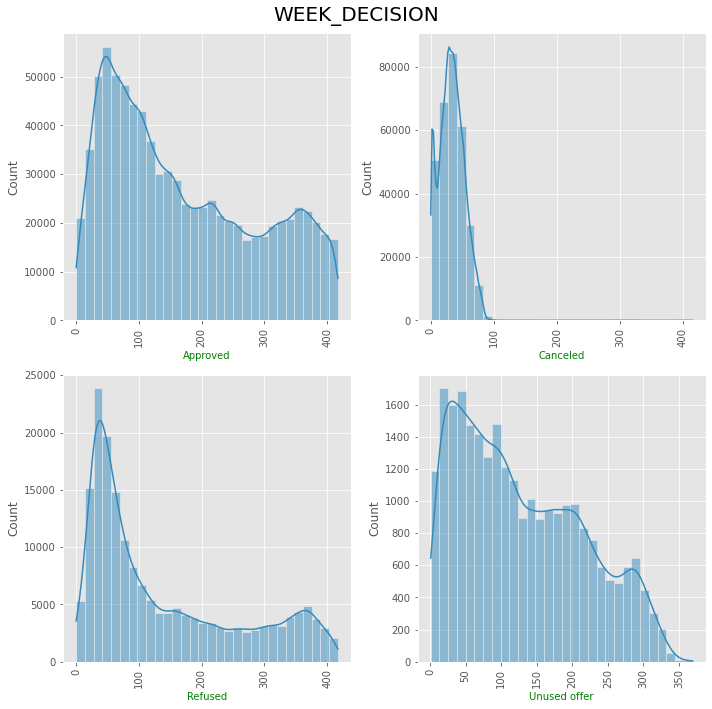

In [187]:
plt.figure(figsize=[10,10])
for i,j in enumerate(prev_application_data.NAME_CONTRACT_STATUS.unique()): 
    plt.subplot(2,2,i+1)          
    sns.histplot(x=prev_application_data[prev_application_data['NAME_CONTRACT_STATUS']==j]['WEEK_DECISION'], kde=True, bins=30)
    plt.xlabel(j,color='green', fontsize=10) 
    plt.xticks(rotation=90)
    plt.suptitle("WEEK_DECISION", fontsize=20)
    plt.tight_layout()


### If you Refused graph -Most of high count were at left side under 50 and after that refusal count was decreasing.  


### Analysis for column AMT_APPLICATION

In [188]:
prev_application_data.AMT_APPLICATION.describe()

count   1360483.000000
mean      70757.979870
std       70641.667792
min           0.000000
25%           0.000000
50%       49455.000000
75%      112500.000000
max      360000.000000
Name: AMT_APPLICATION, dtype: float64

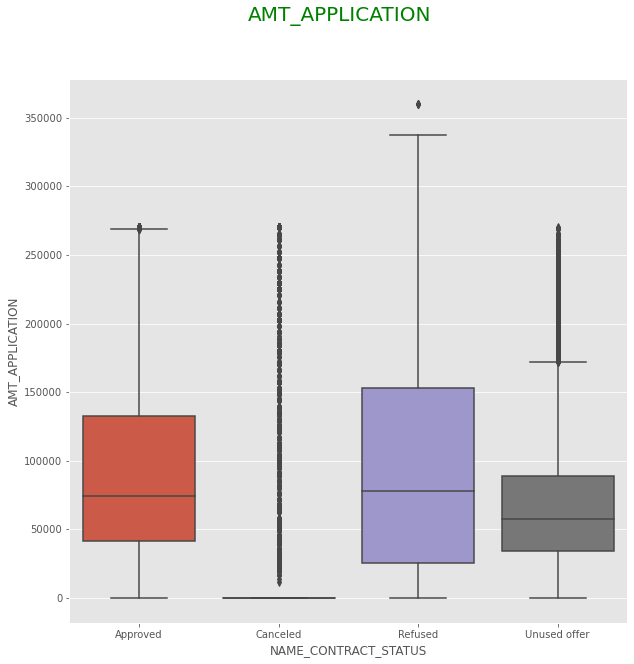

In [189]:
plt.figure(figsize=[10,10])
sns.boxplot(y=prev_application_data.AMT_APPLICATION, x=prev_application_data.NAME_CONTRACT_STATUS)
plt.suptitle("AMT_APPLICATION", fontsize=20, color='green')
plt.show()


#### No outlier can be seen .

In [190]:
prev_application_data.select_dtypes('int64').columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'HOUR_APPR_PROCESS_START', 'DAYS_DECISION',
       'SELLERPLACE_AREA'],
      dtype='object')

In [191]:
prev_application_data.select_dtypes('float64').columns

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'WEEK_DECISION'],
      dtype='object')

### Analysis for column AMT_DOWN_PAYMENT

In [192]:
prev_application_data.AMT_DOWN_PAYMENT.describe()

count   739258.000000
mean      5628.312786
std      10044.461256
min         -0.900000
25%          0.000000
50%       1800.000000
75%       7560.000000
max     247500.000000
Name: AMT_DOWN_PAYMENT, dtype: float64

### Remove Outliers 

In [193]:
Col='AMT_DOWN_PAYMENT'


Q1 = prev_application_data[Col].quantile(0.25)
Q3 = prev_application_data[Col].quantile(0.75)
IQR = Q3 - Q1
prev_application_data= prev_application_data[~((prev_application_data[Col] < (Q1 - 1.5 * IQR)) | (prev_application_data[Col] > (Q3 + 1.5 * IQR)))]
prev_application_data.AMT_DOWN_PAYMENT.describe()

count   685511.000000
mean      3479.191504
std       4754.074250
min         -0.900000
25%          0.000000
50%          0.000000
75%       5845.500000
max      18900.000000
Name: AMT_DOWN_PAYMENT, dtype: float64

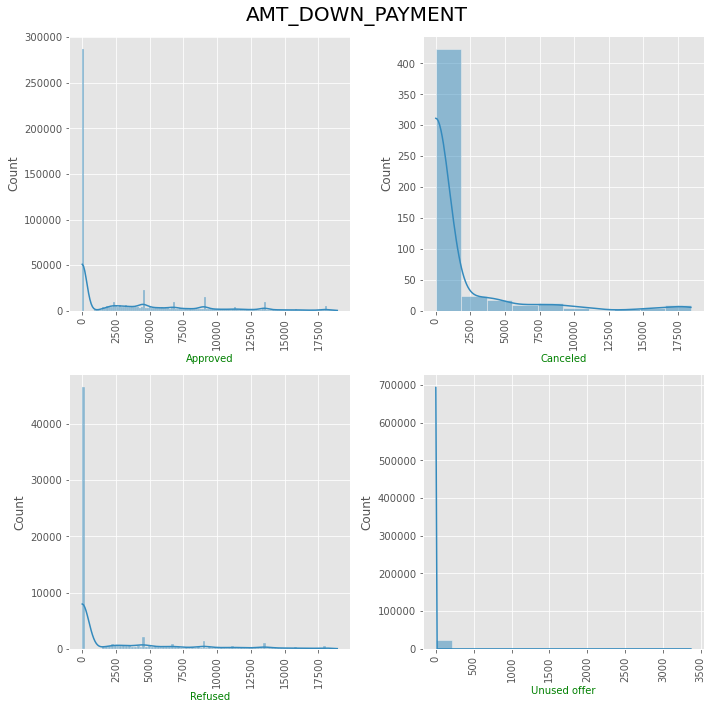

In [194]:
plt.figure(figsize=[10,10])
for i,j in enumerate(prev_application_data.NAME_CONTRACT_STATUS.unique()): 
    plt.subplot(2,2,i+1)          
    sns.histplot(x=prev_application_data[prev_application_data['NAME_CONTRACT_STATUS']==j]['AMT_DOWN_PAYMENT'], kde=True)
    plt.xlabel(j,color='green', fontsize=10) 
    plt.xticks(rotation=90)
    plt.suptitle("AMT_DOWN_PAYMENT", fontsize=20)
    plt.tight_layout()


### Analysis for RATE_DOWN_PAYMENT

In [195]:
prev_application_data.RATE_DOWN_PAYMENT.describe()

count   685511.000000
mean         0.063830
std          0.082079
min         -0.000015
25%          0.000000
50%          0.000000
75%          0.108837
max          0.726061
Name: RATE_DOWN_PAYMENT, dtype: float64

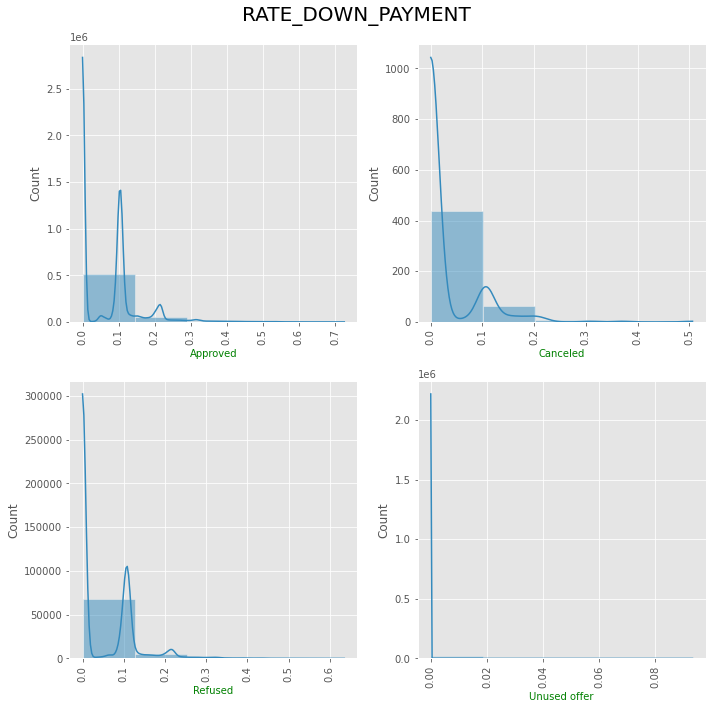

In [196]:
plt.figure(figsize=[10,10])
for i,j in enumerate(prev_application_data.NAME_CONTRACT_STATUS.unique()): 
    plt.subplot(2,2,i+1)          
    sns.histplot(x=prev_application_data[prev_application_data['NAME_CONTRACT_STATUS']==j]['RATE_DOWN_PAYMENT'], kde=True, bins=5)
    plt.xlabel(j,color='green', fontsize=10) 
    plt.xticks(rotation=90)
    plt.suptitle("RATE_DOWN_PAYMENT", fontsize=20)
    plt.tight_layout()


### BIVARIATE ANALYSIS 

In [197]:
prev_application_data.select_dtypes(['int64', 'float64']).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'WEEK_DECISION'],
      dtype='object')

In [198]:
col_to_include=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START',
               'RATE_DOWN_PAYMENT','WEEK_DECISION','DAYS_TERMINATION','CNT_PAYMENT']
               
               

### Creating sepearte dataframe for Previously Approved and Refused 

In [199]:
pre_approved_appl=prev_application_data[prev_application_data.NAME_CONTRACT_STATUS=='Approved'][col_to_include]
pre_refused_appl=prev_application_data[prev_application_data.NAME_CONTRACT_STATUS=='Refused'][col_to_include]



### Analysis for Approved column 

In [200]:
Corr_For_Approved=pre_approved_appl.corr()

In [201]:
round(Corr_For_Approved,3)

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
AMT_ANNUITY                 1.000000         0.736000    0.725000   
AMT_APPLICATION             0.736000         1.000000    0.889000   
AMT_CREDIT                  0.725000         0.889000    1.000000   
AMT_DOWN_PAYMENT            0.073000         0.025000   -0.074000   
AMT_GOODS_PRICE             0.750000         1.000000    0.983000   
HOUR_APPR_PROCESS_START    -0.040000        -0.041000   -0.058000   
RATE_DOWN_PAYMENT          -0.266000        -0.341000   -0.415000   
WEEK_DECISION              -0.195000        -0.289000   -0.250000   
DAYS_TERMINATION           -0.063000         0.069000    0.200000   
CNT_PAYMENT                 0.090000         0.480000    0.416000   

                         AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
AMT_ANNUITY                      0.073000         0.750000   
AMT_APPLICATION                  0.025000         1.000000   
AMT_CREDIT                      -0.074000         0.983000   
AMT_DOWN_PAYMENT                 1.000000         0.025000   
AMT_GOODS_PRICE                  0.025000         1.000000   
HOUR_APPR_PROCESS_START          0.043000        -0.047000   
RATE_DOWN_PAYMENT                0.750000        -0.341000   
WEEK_DECISION                    0.182000        -0.263000   
DAYS_TERMINATION                -0.141000         0.170000   
CNT_PAYMENT                     -0.184000         0.436000   

                         HOUR_APPR_PROCESS_START  RATE_DOWN_PAYMENT  \
AMT_ANNUITY                            -0.040000          -0.266000   
AMT_APPLICATION                        -0.041000          -0.341000   
AMT_CREDIT                             -0.058000          -0.415000   
AMT_DOWN_PAYMENT                        0.043000           0.750000   
AMT_GOODS_PRICE                        -0.047000          -0.341000   
HOUR_APPR_PROCESS_START                 1.000000           0.032000   
RATE_DOWN_PAYMENT                       0.032000           1.000000   
WEEK_DECISION                          -0.012000           0.291000   
DAYS_TERMINATION                       -0.005000          -0.181000   
CNT_PAYMENT                            -0.023000          -0.318000   

                         WEEK_DECISION  DAYS_TERMINATION  CNT_PAYMENT  
AMT_ANNUITY                  -0.195000         -0.063000     0.090000  
AMT_APPLICATION              -0.289000          0.069000     0.480000  
AMT_CREDIT                   -0.250000          0.200000     0.416000  
AMT_DOWN_PAYMENT              0.182000         -0.141000    -0.184000  
AMT_GOODS_PRICE              -0.263000          0.170000     0.436000  
HOUR_APPR_PROCESS_START      -0.012000         -0.005000    -0.023000  
RATE_DOWN_PAYMENT             0.291000         -0.181000    -0.318000  
WEEK_DECISION                 1.000000         -0.387000    -0.085000  
DAYS_TERMINATION             -0.387000          1.000000    -0.102000  
CNT_PAYMENT                  -0.085000         -0.102000     1.000000

### Top 10 most positive factor for approval 

In [202]:
Corr_For_Approved.unstack().sort_values(ascending=False).drop_duplicates().head(10)

CNT_PAYMENT       CNT_PAYMENT         1.000000
AMT_CREDIT        AMT_GOODS_PRICE     0.982787
AMT_APPLICATION   AMT_CREDIT          0.889051
AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT   0.750255
AMT_GOODS_PRICE   AMT_ANNUITY         0.749529
AMT_ANNUITY       AMT_APPLICATION     0.735833
                  AMT_CREDIT          0.725190
AMT_APPLICATION   CNT_PAYMENT         0.479731
CNT_PAYMENT       AMT_GOODS_PRICE     0.436147
                  AMT_CREDIT          0.415907
dtype: float64

### Top 10 most -ve facor for approval

In [203]:
Corr_For_Approved.unstack().sort_values(ascending=False).drop_duplicates().tail(10)

CNT_PAYMENT      AMT_DOWN_PAYMENT    -0.183626
AMT_ANNUITY      WEEK_DECISION       -0.194873
AMT_CREDIT       WEEK_DECISION       -0.250491
WEEK_DECISION    AMT_GOODS_PRICE     -0.263017
AMT_ANNUITY      RATE_DOWN_PAYMENT   -0.266060
AMT_APPLICATION  WEEK_DECISION       -0.289400
CNT_PAYMENT      RATE_DOWN_PAYMENT   -0.318429
AMT_APPLICATION  RATE_DOWN_PAYMENT   -0.341041
WEEK_DECISION    DAYS_TERMINATION    -0.387488
AMT_CREDIT       RATE_DOWN_PAYMENT   -0.414858
dtype: float64

### Heat Map for Approved 

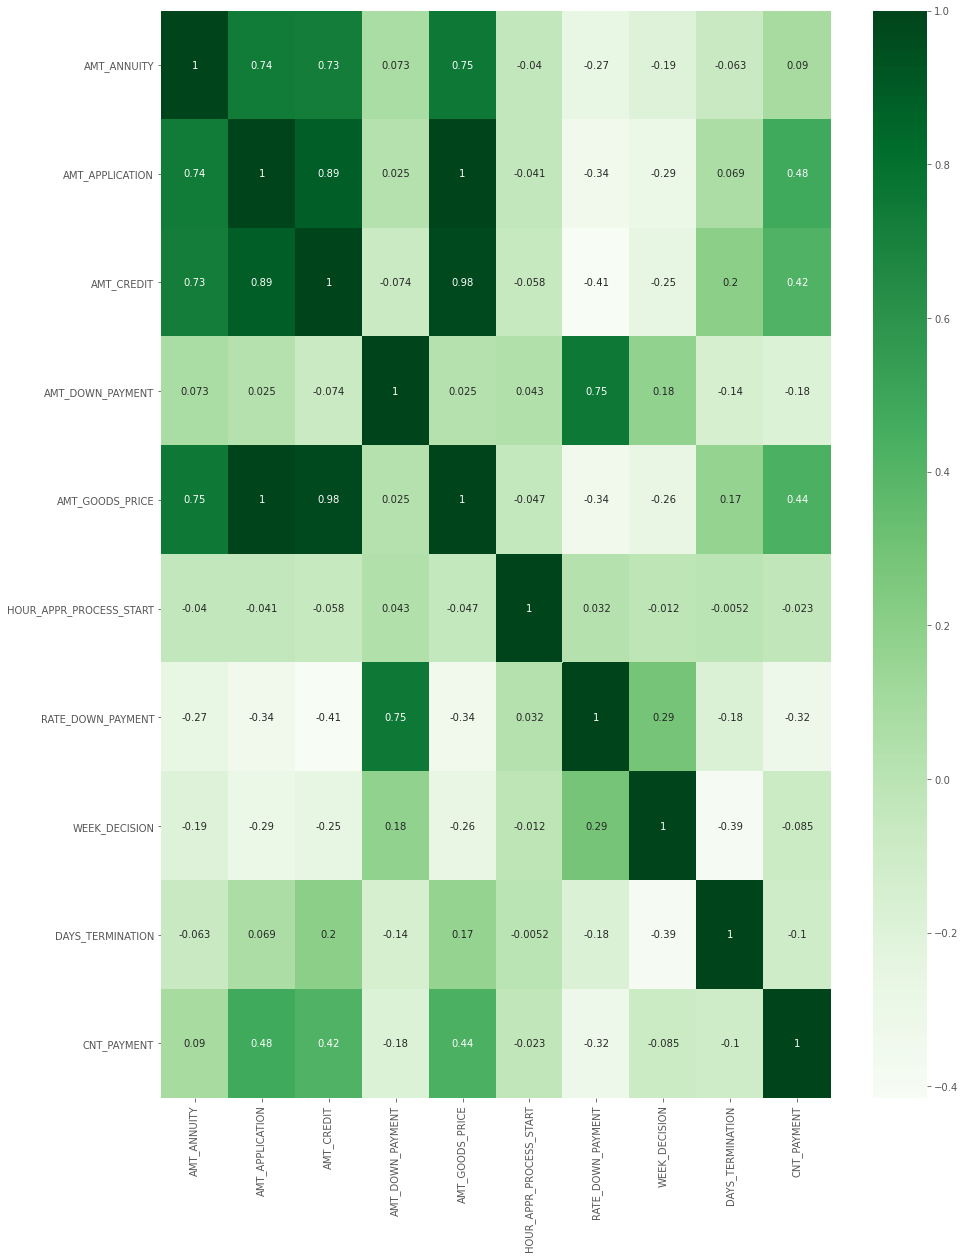

In [204]:
plt.figure(figsize=(15,20))
sns.heatmap(Corr_For_Approved,cmap="Greens", annot=True)
plt.show()

### Analysis for Refused column 

In [205]:
Corr_For_Refused=pre_refused_appl.corr()

In [206]:
round(Corr_For_Refused,3)

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
AMT_ANNUITY                 1.000000         0.645000    0.664000   
AMT_APPLICATION             0.645000         1.000000    0.901000   
AMT_CREDIT                  0.664000         0.901000    1.000000   
AMT_DOWN_PAYMENT            0.014000         0.002000   -0.083000   
AMT_GOODS_PRICE             0.652000         0.999000    0.938000   
HOUR_APPR_PROCESS_START    -0.043000        -0.017000   -0.035000   
RATE_DOWN_PAYMENT          -0.283000        -0.300000   -0.363000   
WEEK_DECISION              -0.130000        -0.079000   -0.047000   
DAYS_TERMINATION                 nan              nan         nan   
CNT_PAYMENT                 0.175000         0.370000    0.342000   

                         AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
AMT_ANNUITY                      0.014000         0.652000   
AMT_APPLICATION                  0.002000         0.999000   
AMT_CREDIT                      -0.083000         0.938000   
AMT_DOWN_PAYMENT                 1.000000         0.002000   
AMT_GOODS_PRICE                  0.002000         1.000000   
HOUR_APPR_PROCESS_START          0.029000        -0.076000   
RATE_DOWN_PAYMENT                0.768000        -0.300000   
WEEK_DECISION                    0.226000        -0.291000   
DAYS_TERMINATION                      nan              nan   
CNT_PAYMENT                     -0.153000         0.324000   

                         HOUR_APPR_PROCESS_START  RATE_DOWN_PAYMENT  \
AMT_ANNUITY                            -0.043000          -0.283000   
AMT_APPLICATION                        -0.017000          -0.300000   
AMT_CREDIT                             -0.035000          -0.363000   
AMT_DOWN_PAYMENT                        0.029000           0.768000   
AMT_GOODS_PRICE                        -0.076000          -0.300000   
HOUR_APPR_PROCESS_START                 1.000000           0.025000   
RATE_DOWN_PAYMENT                       0.025000           1.000000   
WEEK_DECISION                           0.049000           0.306000   
DAYS_TERMINATION                             nan                nan   
CNT_PAYMENT                            -0.039000          -0.282000   

                         WEEK_DECISION  DAYS_TERMINATION  CNT_PAYMENT  
AMT_ANNUITY                  -0.130000               nan     0.175000  
AMT_APPLICATION              -0.079000               nan     0.370000  
AMT_CREDIT                   -0.047000               nan     0.342000  
AMT_DOWN_PAYMENT              0.226000               nan    -0.153000  
AMT_GOODS_PRICE              -0.291000               nan     0.324000  
HOUR_APPR_PROCESS_START       0.049000               nan    -0.039000  
RATE_DOWN_PAYMENT             0.306000               nan    -0.282000  
WEEK_DECISION                 1.000000               nan    -0.035000  
DAYS_TERMINATION                   nan               nan          nan  
CNT_PAYMENT                  -0.035000               nan     1.000000

### Top 10 most positve factor/driving column for Refusal 

In [207]:
Corr_For_Refused.unstack().sort_values(ascending=False).drop_duplicates().head(10)

CNT_PAYMENT        CNT_PAYMENT        1.000000
AMT_APPLICATION    AMT_GOODS_PRICE    0.999270
AMT_CREDIT         AMT_GOODS_PRICE    0.938092
AMT_APPLICATION    AMT_CREDIT         0.900644
RATE_DOWN_PAYMENT  AMT_DOWN_PAYMENT   0.768046
AMT_ANNUITY        AMT_CREDIT         0.664031
                   AMT_GOODS_PRICE    0.652383
                   AMT_APPLICATION    0.644866
CNT_PAYMENT        AMT_APPLICATION    0.369707
                   AMT_CREDIT         0.341546
dtype: float64

### Top 10 most -ve factor for Refusal 

In [208]:
Corr_For_Refused.unstack().sort_values(ascending=False).drop_duplicates().tail(10)

WEEK_DECISION      AMT_APPLICATION     -0.078638
AMT_DOWN_PAYMENT   AMT_CREDIT          -0.082908
AMT_ANNUITY        WEEK_DECISION       -0.129544
CNT_PAYMENT        AMT_DOWN_PAYMENT    -0.152723
RATE_DOWN_PAYMENT  CNT_PAYMENT         -0.281675
                   AMT_ANNUITY         -0.283395
AMT_GOODS_PRICE    WEEK_DECISION       -0.291002
AMT_APPLICATION    RATE_DOWN_PAYMENT   -0.299715
AMT_CREDIT         RATE_DOWN_PAYMENT   -0.362955
AMT_ANNUITY        DAYS_TERMINATION          nan
dtype: float64

### Heat Map for Refusal 

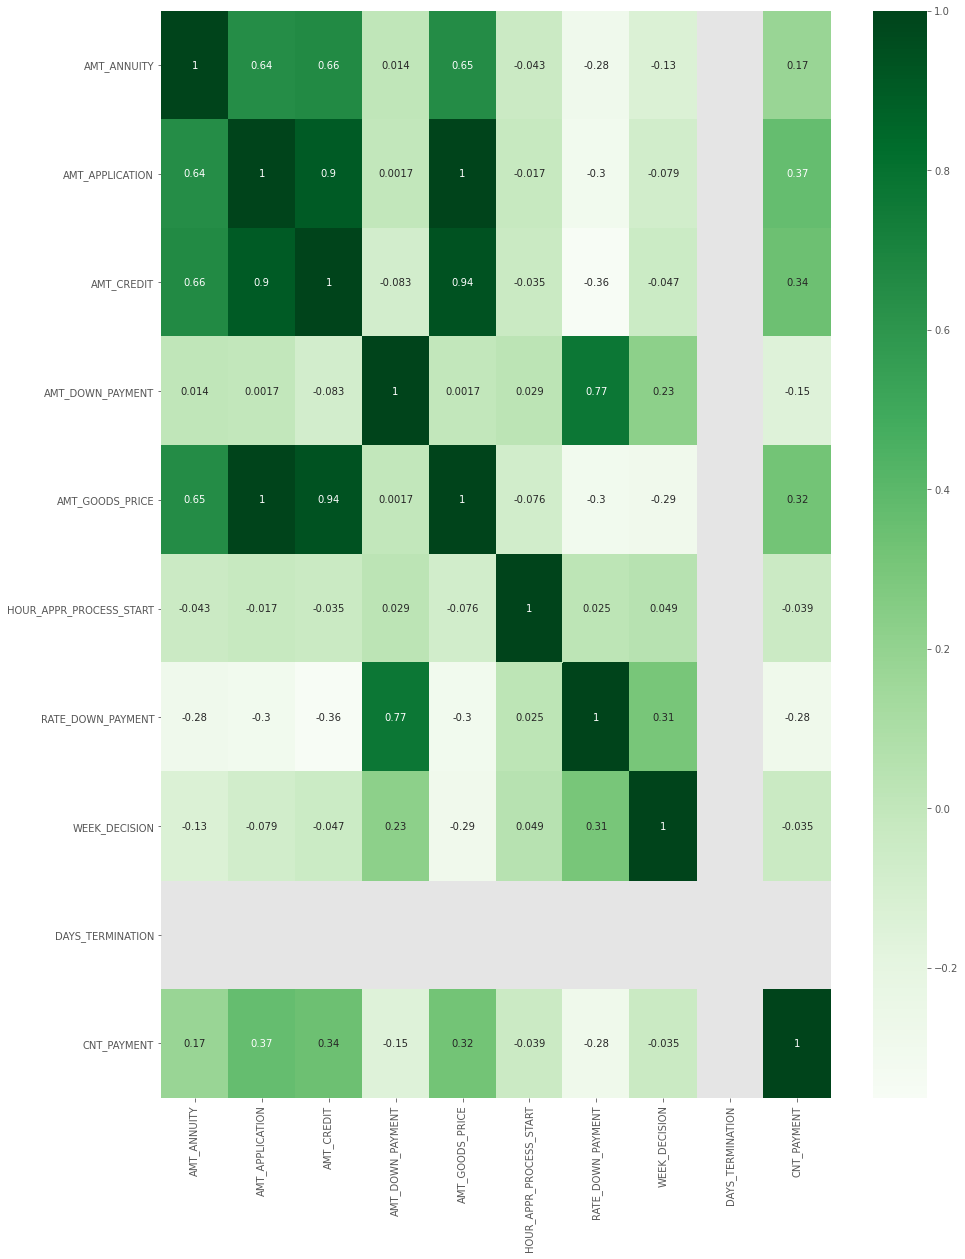

In [209]:
plt.figure(figsize=(15,20))
sns.heatmap(Corr_For_Refused,cmap="Greens", annot=True)
plt.show()

### Merging the Datafiles Application data (df) and Previous Application data(prev_application_data)

In [210]:
final_data = pd.merge(df,prev_application_data, how='left', on='SK_ID_CURR')

In [211]:
final_data

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0           100002      Y           Cash loans           M            N   
1           100003      N           Cash loans           F            N   
2           100004      N      Revolving loans           M            Y   
3           100006      N           Cash loans           F            N   
4           100006      N           Cash loans           F            N   
...            ...    ...                  ...         ...          ...   
864412      456255      N           Cash loans           F            N   
864413      456255      N           Cash loans           F            N   
864414      456255      N           Cash loans           F            N   
864415      456255      N           Cash loans           F            N   
864416      456255      N           Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT_x  \
0                    Y             0     202500.000000  406597.500000   
1                    N             0     270000.000000 1293502.500000   
2                    Y             0      67500.000000  135000.000000   
3                    Y             0     135000.000000  312682.500000   
4                    Y             0     135000.000000  312682.500000   
...                ...           ...               ...            ...   
864412               N             0     157500.000000  675000.000000   
864413               N             0     157500.000000  675000.000000   
864414               N             0     157500.000000  675000.000000   
864415               N             0     157500.000000  675000.000000   
864416               N             0     157500.000000  675000.000000   

        AMT_ANNUITY_x  ...  CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.500000  ...    24.000000       low_normal   
1        35698.500000  ...    12.000000           middle   
2         6750.000000  ...     4.000000           middle   
3        29686.500000  ...          nan              XNA   
4        29686.500000  ...     0.000000              XNA   
...               ...  ...          ...              ...   
864412   49117.500000  ...    12.000000           middle   
864413   49117.500000  ...    12.000000             high   
864414   49117.500000  ...    24.000000           middle   
864415   49117.500000  ...     0.000000              XNA   
864416   49117.500000  ...     6.000000             high   

                PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0           POS other with interest      365243.000000    -565.000000   
1       POS household with interest      365243.000000   -2310.000000   
2       POS mobile without interest      365243.000000    -784.000000   
3                       Card Street                nan            nan   
4                       Card X-Sell      365243.000000  365243.000000   
...                             ...                ...            ...   
864412   POS industry with interest      365243.000000    -960.000000   
864413     POS mobile with interest      365243.000000    -425.000000   
864414          Cash X-Sell: middle      365243.000000    -618.000000   
864415                  Card Street                nan            nan   
864416     POS mobile with interest      365243.000000    -469.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                     125.000000     -25.000000        -17.000000   
1                   -1980.000000   -1980.000000      -1976.000000   
2                    -694.000000    -724.000000       -714.000000   
3                            nan            nan               nan   
4                  365243.000000  365243.000000     365243.000000   
...                          ...            ...               ...   
864412               -630.000000    -690.000000       -687.000000   
864413                -95.000000    -215.000000       -211.000000   
864414     

In [212]:
prev_application_data.shape

(1306736, 36)

In [213]:
df.shape

(234126, 81)

In [214]:
final_data.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x'],
      dtype='object')

###  Selecting Target='Y' means defaulter in DataFrame - for_Deafulter

In [215]:
for_defaulters=final_data[(final_data.TARGET=='Y')]

In [216]:
for_defaulters.shape

(83074, 116)

In [217]:
col_to_inlude_final = for_defaulters.select_dtypes('int64').columns.to_list()
float_list=['AMT_INCOME_TOTAL','AMT_CREDIT_x',
'AMT_ANNUITY_x','AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS' ,'EXT_SOURCE_2'  ,'EXT_SOURCE_3'  ,'AMT_ANNUITY_y'    ,
 'AMT_APPLICATION', 'AMT_CREDIT_y','AMT_DOWN_PAYMENT'   ,  'AMT_GOODS_PRICE_y'    ,  'RATE_DOWN_PAYMENT' ,'WEEK_DECISION'   ,'DAYS_TERMINATION']

In [218]:
col_to_inlude_final.extend(float_list)

In [219]:
col_to_inlude_final

['SK_ID_CURR',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START_x',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE_y',
 'RATE_DOWN_PAYMENT',
 'WEEK_DECISION',
 'DAYS_TERMINATION']

In [220]:
#col_to_inlude_for_defaulter = for_defaulters.select_dtypes('int64', 'float64').columns.to_list()
col_to_inlude_final.remove('SK_ID_CURR')
col_to_inlude_final.remove('DAYS_ID_PUBLISH')

In [221]:
for_defaulters=for_defaulters[col_to_inlude_final]

In [222]:
final_corr_defaulter=for_defaulters.corr()

In [223]:
round(final_corr_defaulter,3)

CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
CNT_CHILDREN                     1.000000    0.199000       0.037000   
DAYS_BIRTH                       0.199000    1.000000       0.295000   
DAYS_EMPLOYED                    0.037000    0.295000       1.000000   
REGION_RATING_CLIENT             0.035000    0.059000       0.007000   
REGION_RATING_CLIENT_W_CITY      0.038000    0.056000       0.004000   
HOUR_APPR_PROCESS_START_x       -0.015000    0.045000      -0.003000   
AMT_INCOME_TOTAL                -0.026000   -0.099000      -0.024000   
AMT_CREDIT_x                     0.001000   -0.168000      -0.105000   
AMT_ANNUITY_x                    0.027000   -0.059000      -0.042000   
AMT_GOODS_PRICE_x               -0.004000   -0.163000      -0.115000   
REGION_POPULATION_RELATIVE      -0.018000   -0.051000      -0.022000   
CNT_FAM_MEMBERS                  0.895000    0.142000       0.006000   
EXT_SOURCE_2                    -0.010000   -0.141000      -0.098000   
EXT_SOURCE_3                    -0.001000   -0.130000      -0.073000   
AMT_ANNUITY_y                   -0.025000   -0.046000      -0.012000   
AMT_APPLICATION                 -0.003000    0.008000      -0.000000   
AMT_CREDIT_y                    -0.005000   -0.012000      -0.010000   
AMT_DOWN_PAYMENT                -0.018000   -0.008000      -0.022000   
AMT_GOODS_PRICE_y               -0.033000   -0.079000      -0.020000   
RATE_DOWN_PAYMENT               -0.006000   -0.026000      -0.032000   
WEEK_DECISION                    0.015000   -0.061000      -0.095000   
DAYS_TERMINATION                -0.001000    0.005000       0.045000   

                             REGION_RATING_CLIENT  \
CNT_CHILDREN                             0.035000   
DAYS_BIRTH                               0.059000   
DAYS_EMPLOYED                            0.007000   
REGION_RATING_CLIENT                     1.000000   
REGION_RATING_CLIENT_W_CITY              0.959000   
HOUR_APPR_PROCESS_START_x               -0.286000   
AMT_INCOME_TOTAL                        -0.158000   
AMT_CREDIT_x                            -0.049000   
AMT_ANNUITY_x                           -0.055000   
AMT_GOODS_PRICE_x                       -0.059000   
REGION_POPULATION_RELATIVE              -0.406000   
CNT_FAM_MEMBERS                          0.038000   
EXT_SOURCE_2                            -0.237000   
EXT_SOURCE_3                             0.010000   
AMT_ANNUITY_y                           -0.021000   
AMT_APPLICATION                         -0.009000   
AMT_CREDIT_y                            -0.004000   
AMT_DOWN_PAYMENT                        -0.035000   
AMT_GOODS_PRICE_y                       -0.008000   
RATE_DOWN_PAYMENT                       -0.025000   
WEEK_DECISION                           -0.026000   
DAYS_TERMINATION                         0.014000   

                             REGION_RATING_CLIENT_W_CITY  \
CNT_CHILDREN                                    0.038000   
DAYS_BIRTH                                      0.056000   
DAYS_EMPLOYED                                   0.004000   
REGION_RATING_CLIENT                            0.959000   
REGION_RATING_CLIENT_W_CITY                     1.000000   
HOUR_APPR_PROCESS_START_x                      -0.266000   
AMT_INCOME_TOTAL                               -0.176000   
AMT_CREDIT_x                                   -0.058000   
AMT_ANNUITY_x                                  -0.070000   
AMT_GOODS_PRICE_x                              -0.066000   
REGION_POPULATION_RELATIVE                     -0.410000   
CNT_FAM_MEMBERS                                 0.041000   
EXT_SOURCE_2                                   -0.233000   
EXT_SOURCE_3                                    0.010000   
AMT_ANNUITY_y                                  -0.032000   
AMT_APPLICATION                                -0.012000   
AMT_CREDIT_y                                   -0.006000   
AMT_DOWN_PAYMENT                               -0.040000   
AMT_GOODS_PR

### Top 10 most postive correration in case of Defaulter 

In [224]:
final_corr_defaulter.unstack().sort_values(ascending=False).drop_duplicates().head(10)

DAYS_TERMINATION             DAYS_TERMINATION       1.000000
AMT_GOODS_PRICE_y            AMT_APPLICATION        0.999958
AMT_CREDIT_x                 AMT_GOODS_PRICE_x      0.978016
AMT_CREDIT_y                 AMT_GOODS_PRICE_y      0.972518
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT   0.958780
AMT_CREDIT_y                 AMT_APPLICATION        0.926571
CNT_CHILDREN                 CNT_FAM_MEMBERS        0.894874
RATE_DOWN_PAYMENT            AMT_DOWN_PAYMENT       0.766375
AMT_ANNUITY_y                AMT_GOODS_PRICE_y      0.733742
AMT_ANNUITY_x                AMT_CREDIT_x           0.731086
dtype: float64

### Top 10 most Negative correration in case of Defaulter 


In [225]:
final_corr_defaulter.unstack().sort_values(ascending=False).drop_duplicates().tail(10)

EXT_SOURCE_2                 REGION_RATING_CLIENT          -0.236747
AMT_ANNUITY_y                RATE_DOWN_PAYMENT             -0.244502
HOUR_APPR_PROCESS_START_x    REGION_RATING_CLIENT_W_CITY   -0.266427
WEEK_DECISION                AMT_GOODS_PRICE_y             -0.270622
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START_x     -0.286143
RATE_DOWN_PAYMENT            AMT_GOODS_PRICE_y             -0.301402
                             AMT_CREDIT_y                  -0.371066
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.405853
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.409806
DAYS_TERMINATION             WEEK_DECISION                 -0.411353
dtype: float64

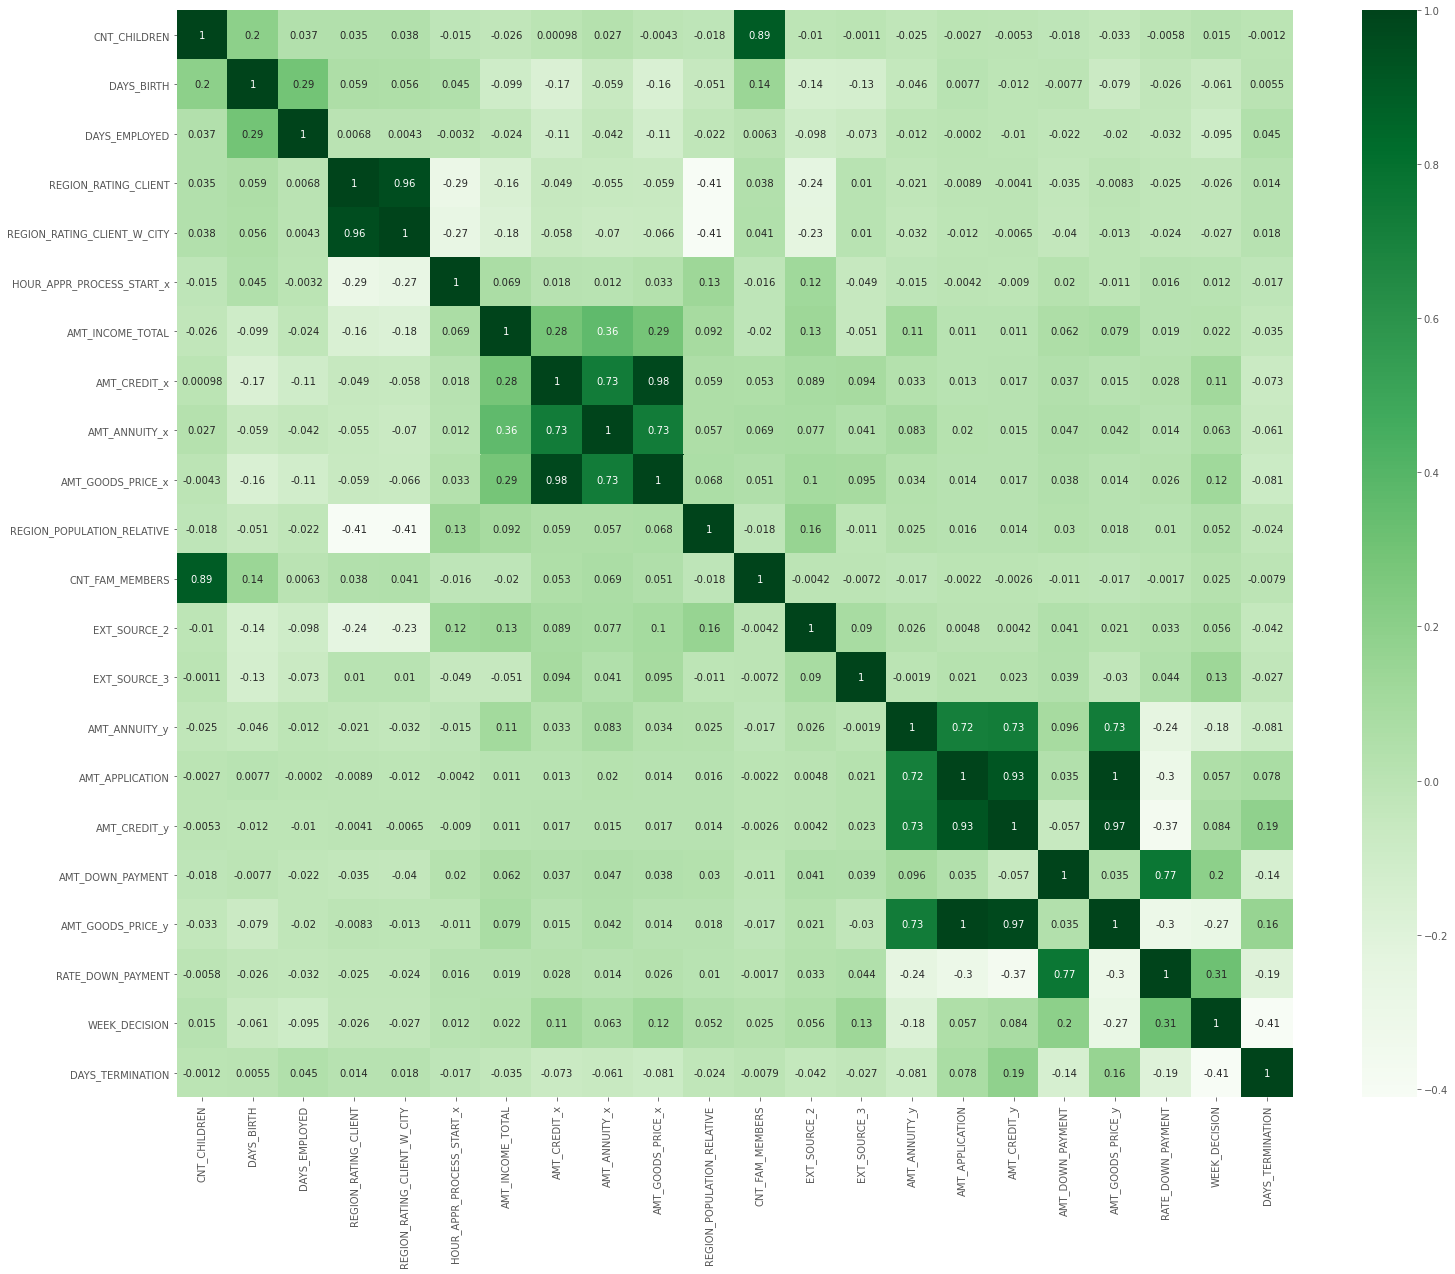

In [226]:
plt.figure(figsize=(25,20))
sns.heatmap(final_corr_defaulter,cmap="Greens", annot=True)
plt.show()

###  Selecting Target='N' means Non Defaulter 

In [227]:
for_Non_defaulters=final_data[(final_data.TARGET=='N')]

In [228]:
for_Non_defaulters.head(5)

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
1      100003      N           Cash loans           F            N   
2      100004      N      Revolving loans           M            Y   
3      100006      N           Cash loans           F            N   
4      100006      N           Cash loans           F            N   
5      100006      N           Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT_x  \
1               N             0     270000.000000 1293502.500000   
2               Y             0      67500.000000  135000.000000   
3               Y             0     135000.000000  312682.500000   
4               Y             0     135000.000000  312682.500000   
5               Y             0     135000.000000  312682.500000   

   AMT_ANNUITY_x  ...  CNT_PAYMENT NAME_YIELD_GROUP  \
1   35698.500000  ...    12.000000           middle   
2    6750.000000  ...     4.000000           middle   
3   29686.500000  ...          nan              XNA   
4   29686.500000  ...     0.000000              XNA   
5   29686.500000  ...          nan              XNA   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
1  POS household with interest      365243.000000   -2310.000000   
2  POS mobile without interest      365243.000000    -784.000000   
3                  Card Street                nan            nan   
4                  Card X-Sell      365243.000000  365243.000000   
5                         Cash                nan            nan   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
1              -1980.000000   -1980.000000      -1976.000000   
2               -694.000000    -724.000000       -714.000000   
3                       nan            nan               nan   
4             365243.000000  365243.000000     365243.000000   
5                       nan            nan               nan   

   NFLAG_INSURED_ON_APPROVAL  WEEK_DECISION  
1                          Y     334.000000  
2                          N     116.000000  
3                        NaN      26.000000  
4                          N      26.000000  
5                        NaN      26.000000  

[5 rows x 116 columns]

In [229]:
for_Non_defaulters.shape

(781343, 116)

In [230]:
col_to_inlude_final

['CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START_x',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE_y',
 'RATE_DOWN_PAYMENT',
 'WEEK_DECISION',
 'DAYS_TERMINATION']

In [231]:
for_Non_defaulters=for_Non_defaulters[col_to_inlude_final]

In [232]:
for_Non_defaulters

CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  REGION_RATING_CLIENT  \
1                  0      -16765          -1188                     1   
2                  0      -19046           -225                     2   
3                  0      -19005          -3039                     2   
4                  0      -19005          -3039                     2   
5                  0      -19005          -3039                     2   
...              ...         ...            ...                   ...   
864412             0      -16856          -1262                     1   
864413             0      -16856          -1262                     1   
864414             0      -16856          -1262                     1   
864415             0      -16856          -1262                     1   
864416             0      -16856          -1262                     1   

        REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START_x  \
1                                 1                         11   
2                                 2                          9   
3                                 2                         17   
4                                 2                         17   
5                                 2                         17   
...                             ...                        ...   
864412                            1                         20   
864413                            1                         20   
864414                            1                         20   
864415                            1                         20   
864416                            1                         20   

        AMT_INCOME_TOTAL   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
1          270000.000000 1293502.500000   35698.500000     1129500.000000   
2           67500.000000  135000.000000    6750.000000      135000.000000   
3          135000.000000  312682.500000   29686.500000      297000.000000   
4          135000.000000  312682.500000   29686.500000      297000.000000   
5          135000.000000  312682.500000   29686.500000      297000.000000   
...                  ...            ...            ...                ...   
864412     157500.000000  675000.000000   49117.500000      675000.000000   
864413     157500.000000  675000.000000   49117.500000      675000.000000   
864414     157500.000000  675000.000000   49117.500000      675000.000000   
864415     157500.000000  675000.000000   49117.500000      675000.000000   
864416     157500.000000  675000.000000   49117.500000      675000.000000   

        ...  EXT_SOURCE_2  EXT_SOURCE_3  AMT_ANNUITY_y  AMT_APPLICATION  \
1       ...      0.622246           nan    6737.310000     68809.500000   
2       ...      0.555912      0.729567    5357.250000     24282.000000   
3       ...      0.650442           nan            nan         0.000000   
4       ...      0.650442           nan   13500.000000    270000.000000   
5       ...      0.650442           nan            nan         0.000000   
...     ...           ...           ...            ...              ...   
864412  ...      0.708569      0.113922   11090.835000    102037.500000   
864413  ...      0.708569      0.113922   11314.170000     82404.000000   
864414  ...      0.708569      0.113922   16400.610000    229500.000000   
864415  ...      0.708569      0.113922    2250.000000     45000.000000   
864416  ...      0.708569      0.113922   11514.555000     58225.500000   

        AMT_CREDIT_y  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_y  RATE_DOWN_PAYMENT  \
1       68053.500000       6885.000000       68809.500000           0.100061   
2       20106.000000       4860.000000       24282.000000           0.212008   
3           0.000000               nan                nan                nan   
4      270000.000000               nan      270000.000000                nan   
5           0.000000               nan                nan                nan   
...              ...            

In [233]:
for_Non_defaulters.shape

(781343, 22)

In [234]:
final_corr_Non_defaulter=for_Non_defaulters.corr()

In [235]:
round(final_corr_Non_defaulter,3)

CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
CNT_CHILDREN                     1.000000    0.262000       0.067000   
DAYS_BIRTH                       0.262000    1.000000       0.340000   
DAYS_EMPLOYED                    0.067000    0.340000       1.000000   
REGION_RATING_CLIENT             0.037000    0.042000      -0.012000   
REGION_RATING_CLIENT_W_CITY      0.036000    0.041000      -0.012000   
HOUR_APPR_PROCESS_START_x       -0.029000    0.046000       0.020000   
AMT_INCOME_TOTAL                -0.019000   -0.042000      -0.029000   
AMT_CREDIT_x                    -0.009000   -0.135000      -0.076000   
AMT_ANNUITY_x                    0.004000   -0.055000      -0.030000   
AMT_GOODS_PRICE_x               -0.013000   -0.129000      -0.077000   
REGION_POPULATION_RELATIVE      -0.025000   -0.047000      -0.000000   
CNT_FAM_MEMBERS                  0.895000    0.213000       0.042000   
EXT_SOURCE_2                    -0.028000   -0.135000      -0.076000   
EXT_SOURCE_3                    -0.014000   -0.156000      -0.110000   
AMT_ANNUITY_y                   -0.039000   -0.056000      -0.015000   
AMT_APPLICATION                 -0.014000   -0.008000      -0.008000   
AMT_CREDIT_y                    -0.020000   -0.025000      -0.015000   
AMT_DOWN_PAYMENT                -0.006000   -0.013000      -0.017000   
AMT_GOODS_PRICE_y               -0.053000   -0.081000      -0.018000   
RATE_DOWN_PAYMENT                0.007000   -0.015000      -0.020000   
WEEK_DECISION                    0.007000   -0.069000      -0.087000   
DAYS_TERMINATION                 0.003000    0.014000       0.036000   

                             REGION_RATING_CLIENT  \
CNT_CHILDREN                             0.037000   
DAYS_BIRTH                               0.042000   
DAYS_EMPLOYED                           -0.012000   
REGION_RATING_CLIENT                     1.000000   
REGION_RATING_CLIENT_W_CITY              0.947000   
HOUR_APPR_PROCESS_START_x               -0.270000   
AMT_INCOME_TOTAL                        -0.192000   
AMT_CREDIT_x                            -0.056000   
AMT_ANNUITY_x                           -0.085000   
AMT_GOODS_PRICE_x                       -0.058000   
REGION_POPULATION_RELATIVE              -0.494000   
CNT_FAM_MEMBERS                          0.041000   
EXT_SOURCE_2                            -0.271000   
EXT_SOURCE_3                            -0.002000   
AMT_ANNUITY_y                           -0.053000   
AMT_APPLICATION                         -0.013000   
AMT_CREDIT_y                            -0.013000   
AMT_DOWN_PAYMENT                        -0.042000   
AMT_GOODS_PRICE_y                       -0.034000   
RATE_DOWN_PAYMENT                       -0.020000   
WEEK_DECISION                           -0.012000   
DAYS_TERMINATION                         0.001000   

                             REGION_RATING_CLIENT_W_CITY  \
CNT_CHILDREN                                    0.036000   
DAYS_BIRTH                                      0.041000   
DAYS_EMPLOYED                                  -0.012000   
REGION_RATING_CLIENT                            0.947000   
REGION_RATING_CLIENT_W_CITY                     1.000000   
HOUR_APPR_PROCESS_START_x                      -0.247000   
AMT_INCOME_TOTAL                               -0.210000   
AMT_CREDIT_x                                   -0.062000   
AMT_ANNUITY_x                                  -0.098000   
AMT_GOODS_PRICE_x                              -0.063000   
REGION_POPULATION_RELATIVE                     -0.493000   
CNT_FAM_MEMBERS                                 0.042000   
EXT_SOURCE_2                                   -0.265000   
EXT_SOURCE_3                                   -0.001000   
AMT_ANNUITY_y                                  -0.067000   
AMT_APPLICATION                                -0.019000   
AMT_CREDIT_y                                   -0.018000   
AMT_DOWN_PAYMENT                               -0.047000   
AMT_GOODS_PR

In [236]:
final_corr_Non_defaulter.unstack().sort_values(ascending=False).drop_duplicates().head(10)

DAYS_TERMINATION      DAYS_TERMINATION              1.000000
AMT_GOODS_PRICE_y     AMT_APPLICATION               0.999843
AMT_GOODS_PRICE_x     AMT_CREDIT_x                  0.981538
AMT_CREDIT_y          AMT_GOODS_PRICE_y             0.972773
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   0.946807
AMT_APPLICATION       AMT_CREDIT_y                  0.917660
CNT_CHILDREN          CNT_FAM_MEMBERS               0.894690
AMT_DOWN_PAYMENT      RATE_DOWN_PAYMENT             0.756335
AMT_ANNUITY_x         AMT_CREDIT_x                  0.745633
AMT_GOODS_PRICE_x     AMT_ANNUITY_x                 0.744524
dtype: float64

In [237]:
final_corr_Non_defaulter.unstack().sort_values(ascending=False).drop_duplicates().tail(10)

REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                  -0.264920
WEEK_DECISION                AMT_GOODS_PRICE_y             -0.265931
RATE_DOWN_PAYMENT            AMT_ANNUITY_y                 -0.269501
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START_x     -0.269926
EXT_SOURCE_2                 REGION_RATING_CLIENT          -0.271129
RATE_DOWN_PAYMENT            AMT_APPLICATION               -0.327158
WEEK_DECISION                DAYS_TERMINATION              -0.381829
RATE_DOWN_PAYMENT            AMT_CREDIT_y                  -0.398689
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.493339
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.493939
dtype: float64

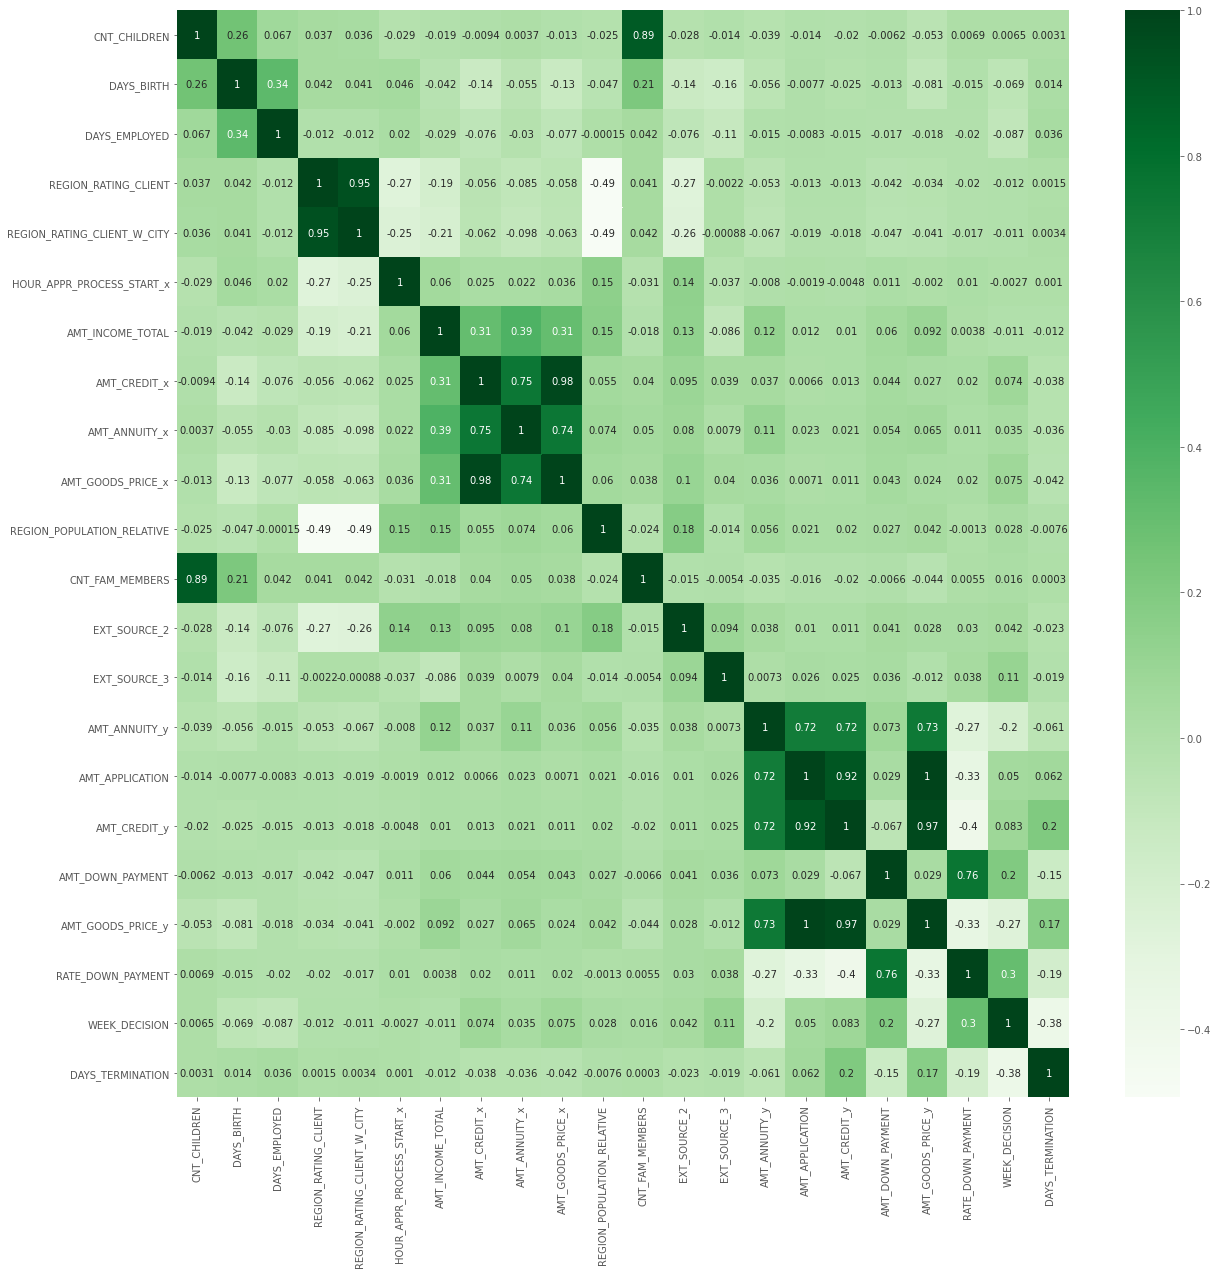

In [238]:
plt.figure(figsize=(20,20))
sns.heatmap(final_corr_Non_defaulter,cmap="Greens", annot=True)
plt.show()

In [239]:

data=final_data[col_to_inlude_final].copy()
corrmat=data.corr()
corrmat


CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
CNT_CHILDREN                     1.000000    0.255825       0.064554   
DAYS_BIRTH                       0.255825    1.000000       0.338832   
DAYS_EMPLOYED                    0.064554    0.338832       1.000000   
REGION_RATING_CLIENT             0.037526    0.047373      -0.006286   
REGION_RATING_CLIENT_W_CITY      0.036398    0.046503      -0.005670   
HOUR_APPR_PROCESS_START_x       -0.027503    0.044143       0.016343   
AMT_INCOME_TOTAL                -0.019885   -0.047765      -0.029501   
AMT_CREDIT_x                    -0.008563   -0.139014      -0.078933   
AMT_ANNUITY_x                    0.005924   -0.054918      -0.030328   
AMT_GOODS_PRICE_x               -0.012813   -0.133616      -0.081676   
REGION_POPULATION_RELATIVE      -0.024760   -0.049008      -0.004139   
CNT_FAM_MEMBERS                  0.894697    0.206049       0.038998   
EXT_SOURCE_2                    -0.026703   -0.143501      -0.088566   
EXT_SOURCE_3                    -0.014136   -0.162518      -0.118230   
AMT_ANNUITY_y                   -0.037452   -0.056609      -0.015761   
AMT_APPLICATION                 -0.012629   -0.006973      -0.008445   
AMT_CREDIT_y                    -0.018365   -0.024478      -0.015381   
AMT_DOWN_PAYMENT                -0.007214   -0.014224      -0.019167   
AMT_GOODS_PRICE_y               -0.050945   -0.080603      -0.018157   
RATE_DOWN_PAYMENT                0.005786   -0.017597      -0.021984   
WEEK_DECISION                    0.006953   -0.071416      -0.090458   
DAYS_TERMINATION                 0.002808    0.014558       0.038518   

                             REGION_RATING_CLIENT  \
CNT_CHILDREN                             0.037526   
DAYS_BIRTH                               0.047373   
DAYS_EMPLOYED                           -0.006286   
REGION_RATING_CLIENT                     1.000000   
REGION_RATING_CLIENT_W_CITY              0.948206   
HOUR_APPR_PROCESS_START_x               -0.272690   
AMT_INCOME_TOTAL                        -0.189448   
AMT_CREDIT_x                            -0.056182   
AMT_ANNUITY_x                           -0.081292   
AMT_GOODS_PRICE_x                       -0.059367   
REGION_POPULATION_RELATIVE              -0.486818   
CNT_FAM_MEMBERS                          0.041012   
EXT_SOURCE_2                            -0.273267   
EXT_SOURCE_3                            -0.012001   
AMT_ANNUITY_y                           -0.051526   
AMT_APPLICATION                         -0.013142   
AMT_CREDIT_y                            -0.013035   
AMT_DOWN_PAYMENT                        -0.042937   
AMT_GOODS_PRICE_y                       -0.031081   
RATE_DOWN_PAYMENT                       -0.021585   
WEEK_DECISION                           -0.015929   
DAYS_TERMINATION                         0.003909   

                             REGION_RATING_CLIENT_W_CITY  \
CNT_CHILDREN                                    0.036398   
DAYS_BIRTH                                      0.046503   
DAYS_EMPLOYED                                  -0.005670   
REGION_RATING_CLIENT                            0.948206   
REGION_RATING_CLIENT_W_CITY                     1.000000   
HOUR_APPR_PROCESS_START_x                      -0.250484   
AMT_INCOME_TOTAL                               -0.207577   
AMT_CREDIT_x                                   -0.062628   
AMT_ANNUITY_x                                  -0.094200   
AMT_GOODS_PRICE_x                              -0.064740   
REGION_POPULATION_RELATIVE                     -0.486588   
CNT_FAM_MEMBERS                                 0.041642   
EXT_SOURCE_2                                   -0.267749   
EXT_SOURCE_3                                   -0.011361   
AMT_ANNUITY_y                                  -0.064805   
AMT_APPLICATION                                -0.018590   
AMT_CREDIT_y                                   -0.017628   
AMT_DOWN_PAYMENT                               -0.047901   
AMT_GOODS_PR

In [240]:
##  functon to get corr values of specified column and return into dataframe 
def getCorrelatedFeature(corrdata, threshold):
    feature=[]
    value=[]
    for i, index in enumerate(corrdata.index):
        if corrdata[index] > threshold :
            if corrdata[index]!=1:
                feature.append(index)
                value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['corr value'])
    return df
   

## Factors affecting AMT_CREDIT_x -Application Data

In [241]:

threshold=0.05
corr_df=getCorrelatedFeature(corrmat['AMT_CREDIT_x'], threshold)
corr_df.sort_values(by=['corr value'],ascending=False)

corr value
AMT_GOODS_PRICE_x             0.981194
AMT_ANNUITY_x                 0.744030
AMT_INCOME_TOTAL              0.306432
EXT_SOURCE_2                  0.095629
WEEK_DECISION                 0.078461
REGION_POPULATION_RELATIVE    0.055936

## Factors affecting AMT_CREDIT_y -Previous Application Data

In [242]:
threshold=.05
corr_df=getCorrelatedFeature(corrmat['AMT_CREDIT_y'], threshold)
corr_df

corr value
AMT_ANNUITY_y        0.715807
AMT_APPLICATION      0.918549
AMT_GOODS_PRICE_y    0.972719
WEEK_DECISION        0.083721
DAYS_TERMINATION     0.199109

### Analysis for Categorical column -Final Data

In [243]:
final_data.select_dtypes('object').columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUM

### Dividing Final data set into defaulter and Non Defaulter Data Set 

In [244]:
final_data_defaulter=final_data[final_data.TARGET=='Y']
final_data_non_defaulter=final_data[final_data.TARGET=='N']

### Analysis for NAME_INCOME_TYPE

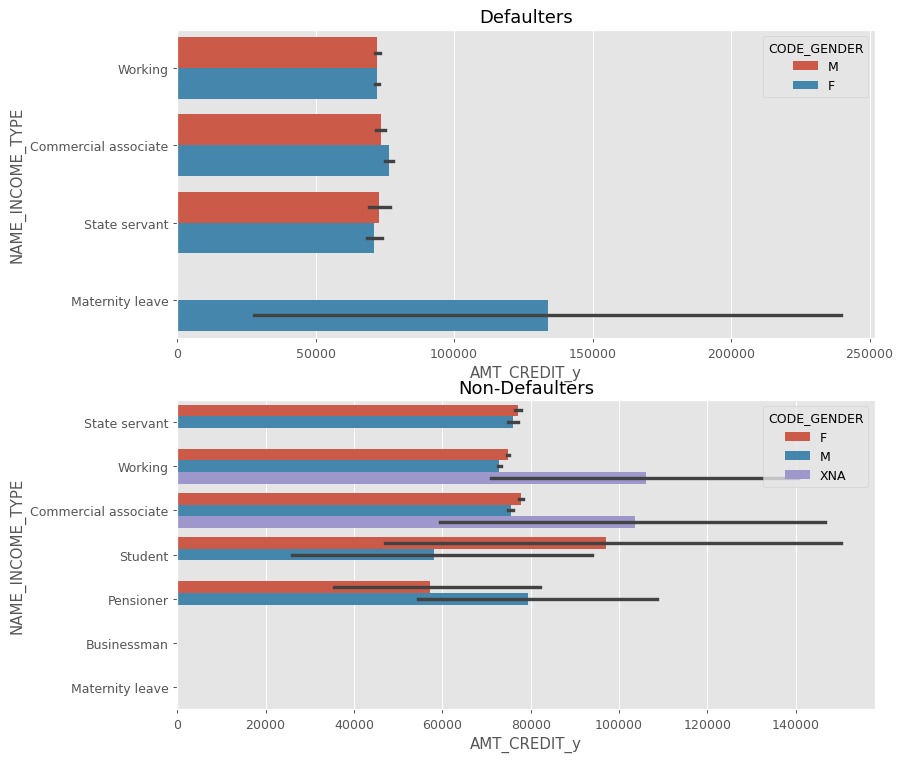

In [245]:
plt.figure(figsize=[10,10],dpi=90)
plt.subplot(211)
plt.title('Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='NAME_INCOME_TYPE', data=final_data_defaulter, hue='CODE_GENDER')
plt.subplot(212)
plt.title('Non-Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='NAME_INCOME_TYPE', data=final_data_non_defaulter, hue='CODE_GENDER')
plt.show()



#### For Defaulter , Women who goes on Maternity leave defaulter max .
#### for Defaulter category- Student are missing whereas Non_defaulter they have good amount of Amount credit . In student , female students have larger amount distributed -Good customers .


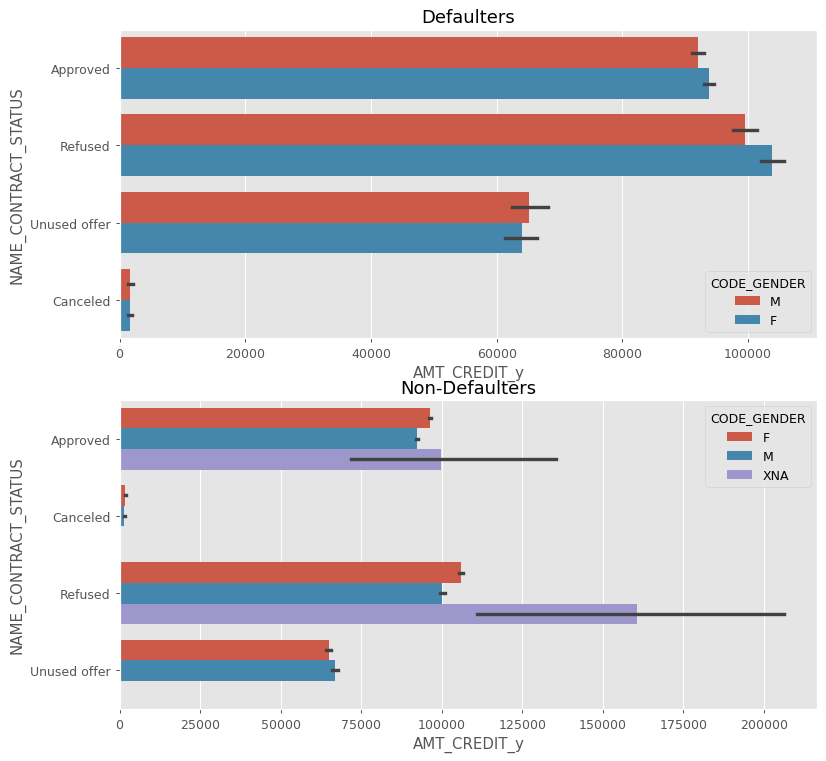

In [246]:
plt.figure(figsize=[10,10],dpi=90)
plt.subplot(211)
plt.title('Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='NAME_CONTRACT_STATUS', data=final_data_defaulter, hue='CODE_GENDER')
plt.subplot(212)
plt.title('Non-Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='NAME_CONTRACT_STATUS', data=final_data_non_defaulter, hue='CODE_GENDER' )
plt.show()


#### For Defaulter , most of Application were Previously refused .

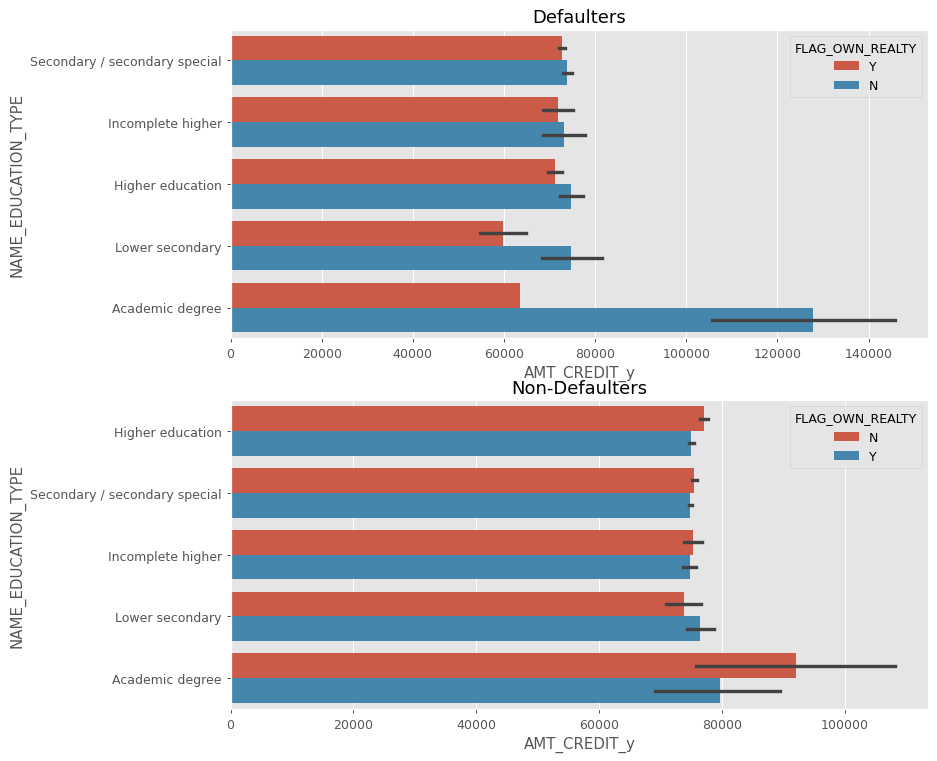

In [247]:
plt.figure(figsize=[10,10],dpi=90)
plt.subplot(211)
plt.title('Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='NAME_EDUCATION_TYPE', data=final_data_defaulter, hue='FLAG_OWN_REALTY')
plt.subplot(212)
plt.title('Non-Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='NAME_EDUCATION_TYPE', data=final_data_non_defaulter, hue='FLAG_OWN_REALTY')
plt.show()


#### while crediting amount owning car is good factor, people who owns car are default less 
#### If you see defaulter column , people who does not have car are defaulting much

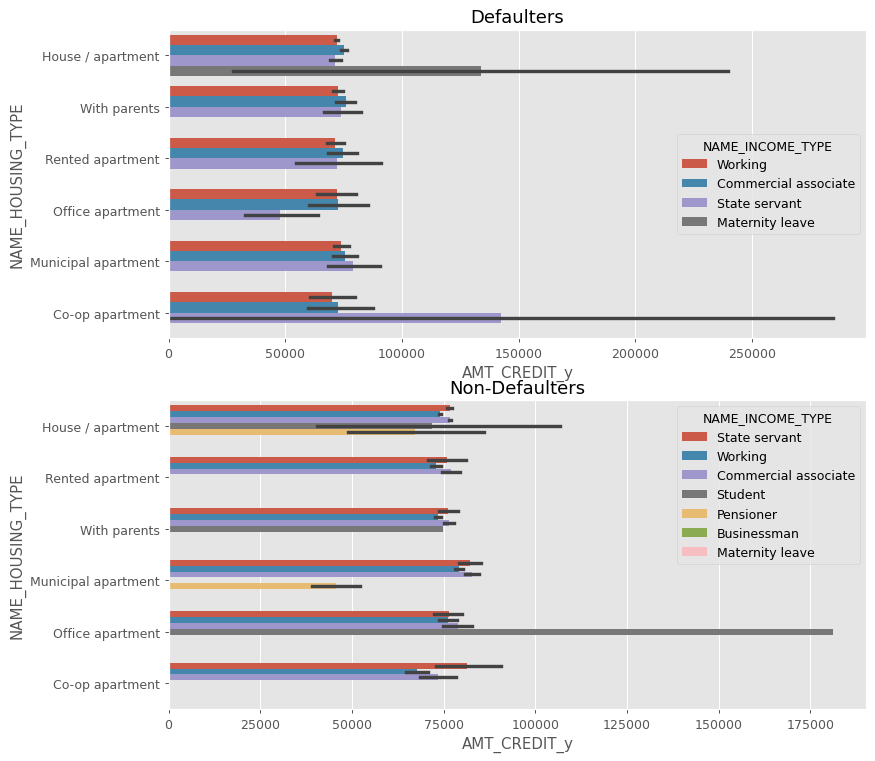

In [248]:

plt.figure(figsize=[10,10],dpi=90)
plt.subplot(211)
plt.title('Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='NAME_HOUSING_TYPE', data=final_data_defaulter, hue='NAME_INCOME_TYPE')
plt.subplot(212)
plt.title('Non-Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='NAME_HOUSING_TYPE', data=final_data_non_defaulter, hue='NAME_INCOME_TYPE')
plt.show()


### People with housing type -Co-op apartment should not be targeted , look like they are facing problems while repaying the loans .

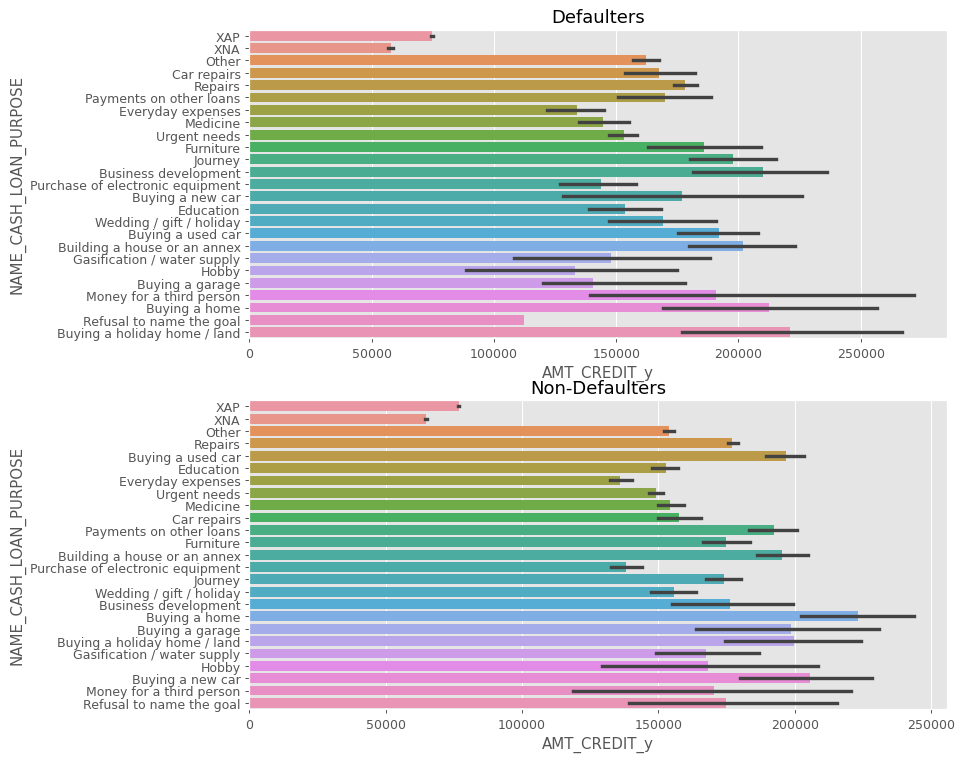

In [249]:
plt.figure(figsize=[10,10],dpi=90)
plt.subplot(211)
plt.title('Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='NAME_CASH_LOAN_PURPOSE', data=final_data_defaulter)
plt.subplot(212)
plt.title('Non-Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='NAME_CASH_LOAN_PURPOSE', data=final_data_non_defaulter)
plt.show()


### Buying a Holiday home/land is purpuse were laun were defaulted in high range and people are facing defficulty while paying it .

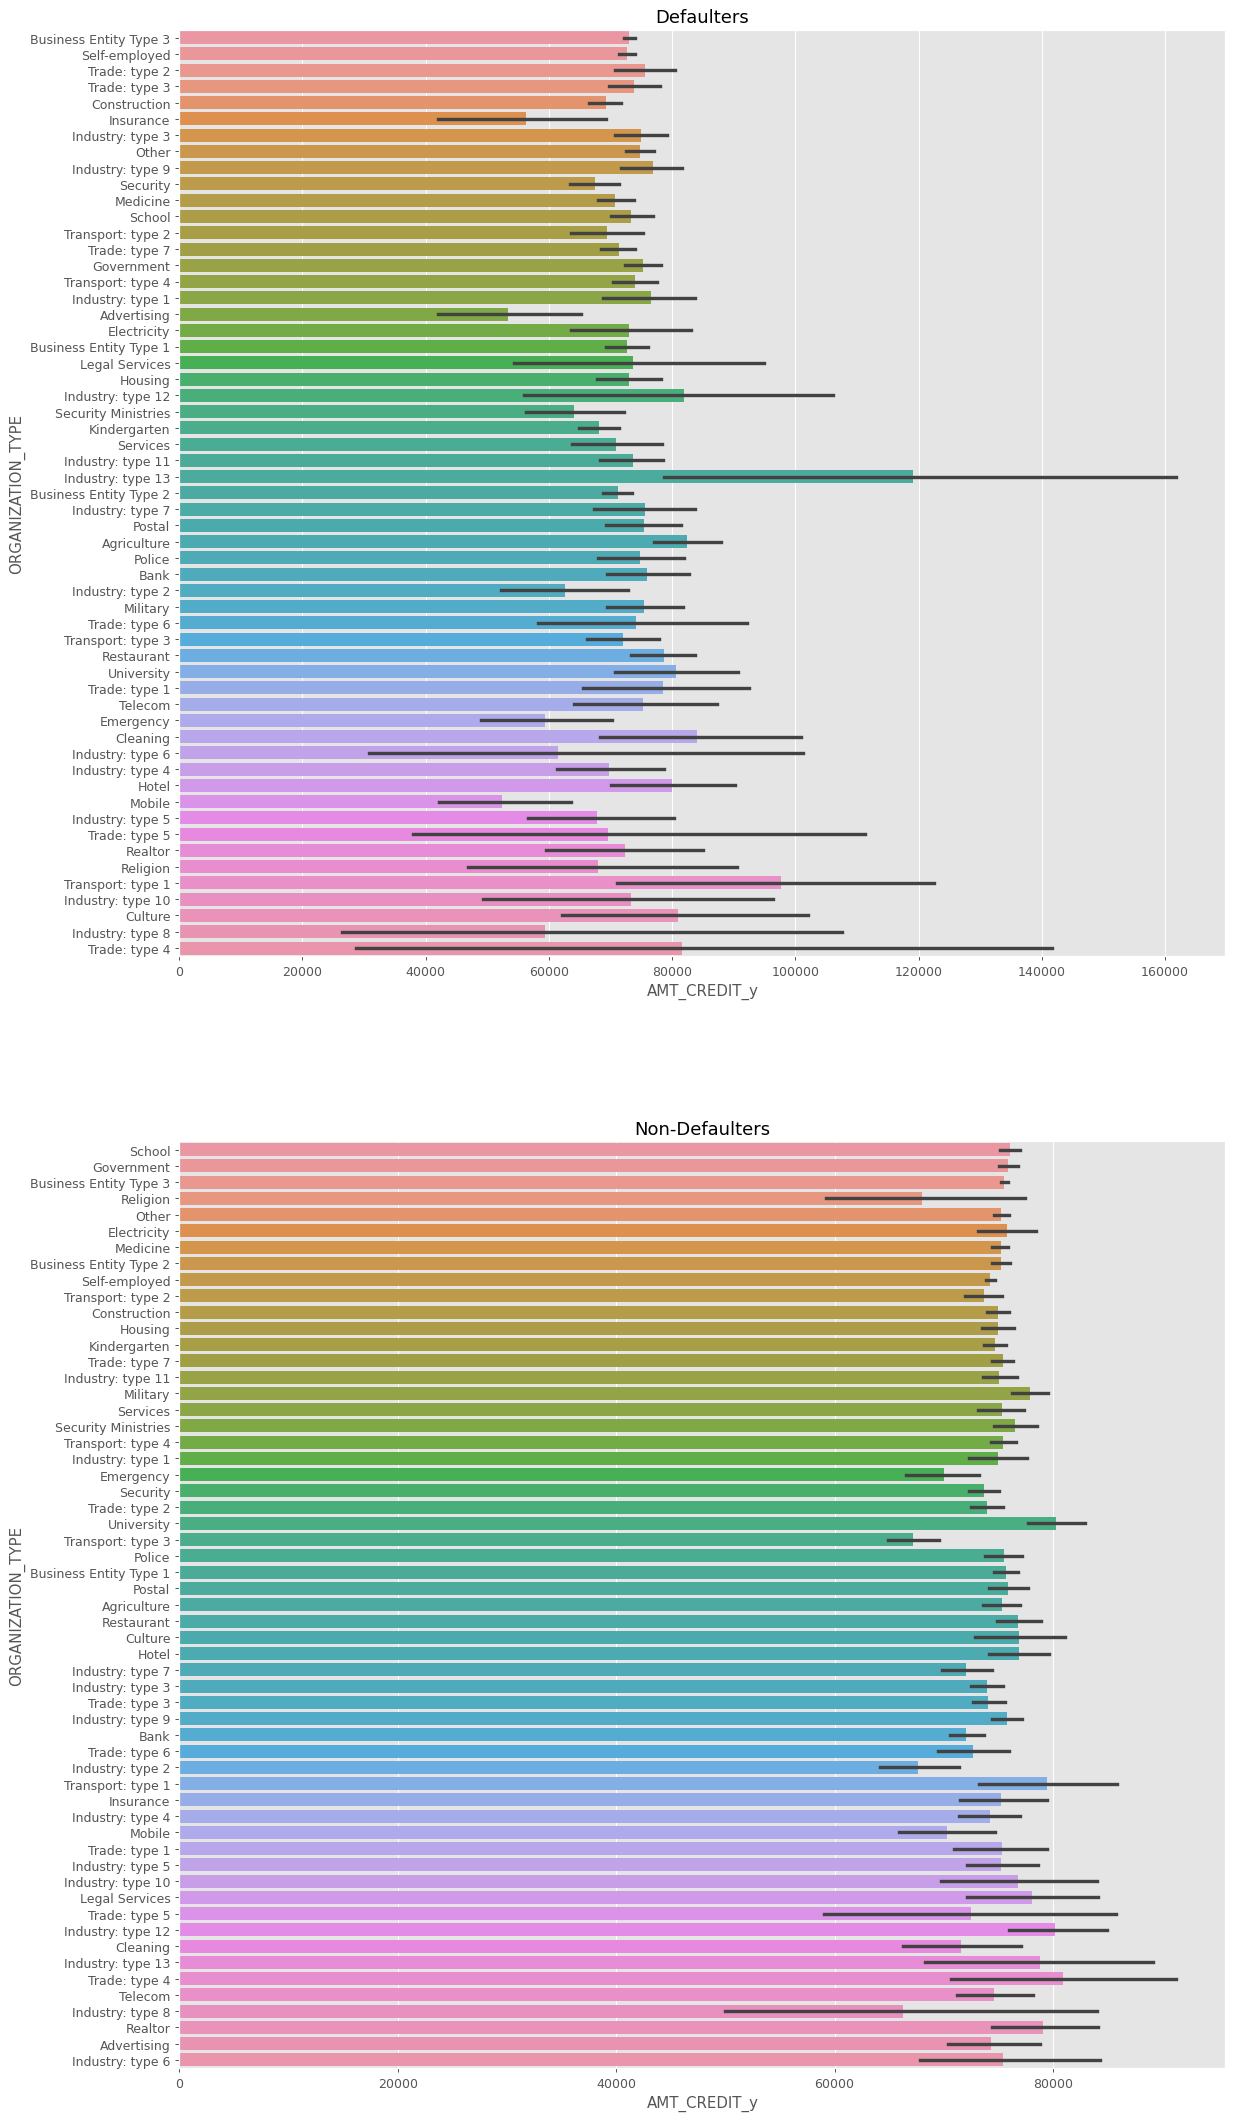

In [250]:
#REG_REGION_NOT_WORK_REGION

plt.figure(figsize=[15,30],dpi=90)
plt.subplot(211)
plt.title('Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='ORGANIZATION_TYPE', data=final_data_defaulter)
plt.subplot(212)
plt.title('Non-Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='ORGANIZATION_TYPE', data=final_data_non_defaulter)
plt.show()


### People working in Industry type13 deafult much -Bad Customers .

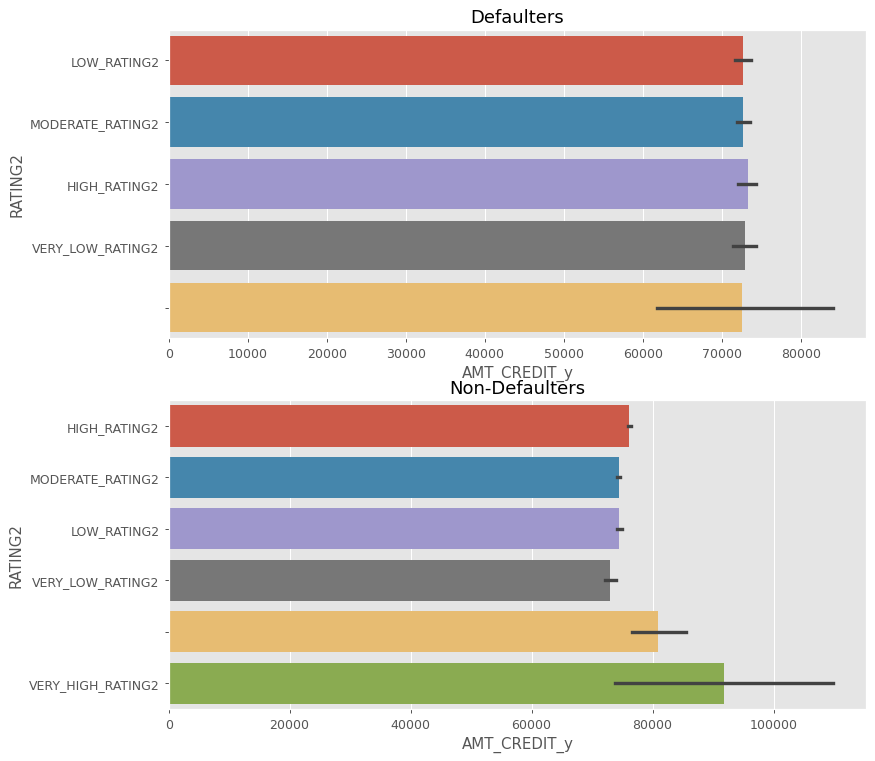

In [251]:


plt.figure(figsize=[10,10],dpi=90)
plt.subplot(211)
plt.title('Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='RATING2', data=final_data_defaulter)
plt.subplot(212)
plt.title('Non-Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='RATING2', data=final_data_non_defaulter)
plt.show()


### People with high rating2 likely to default less 

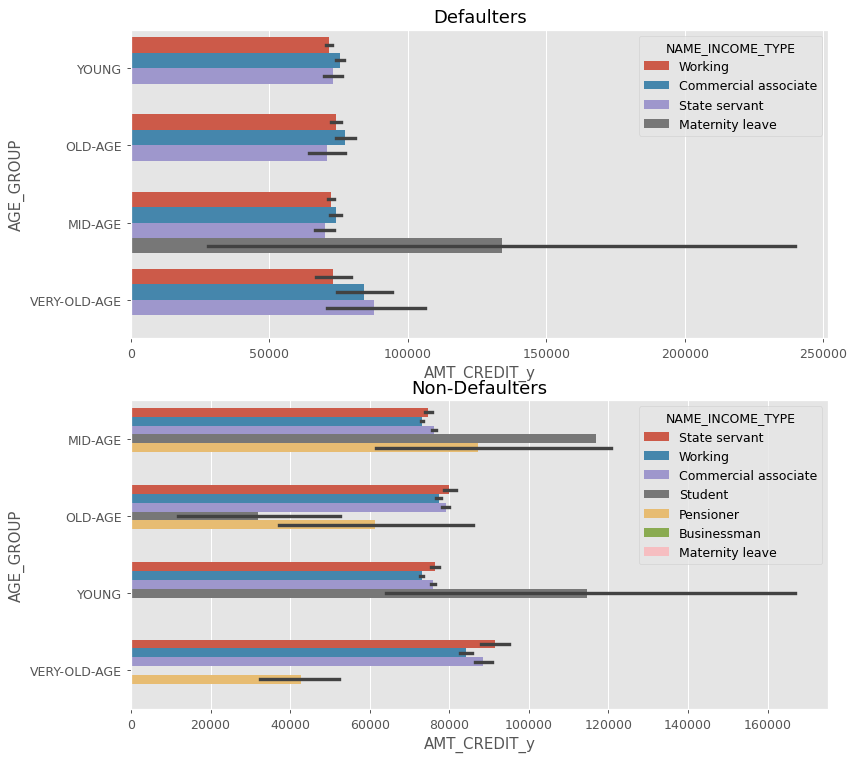

In [252]:
plt.figure(figsize=[10,10],dpi=90)
plt.subplot(211)
plt.title('Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='AGE_GROUP', data=final_data_defaulter, hue='NAME_INCOME_TYPE')
plt.subplot(212)
plt.title('Non-Defaulters')
sns.barplot(x='AMT_CREDIT_y', y='AGE_GROUP', data=final_data_non_defaulter, hue='NAME_INCOME_TYPE')
plt.show()

### Mid Age women default max -bad custumers  
### Young Student seems to be good customers 
